In [25]:
import numpy as np
import matplotlib.pyplot as plt

COLORMAP = {
    "red" : "#AF272F",
    "orange" : "#BE531C",
    "green" : "#719949",
    "blue" : "#00558C",
    "purple" : "#642F6C",
}

# Free Energy

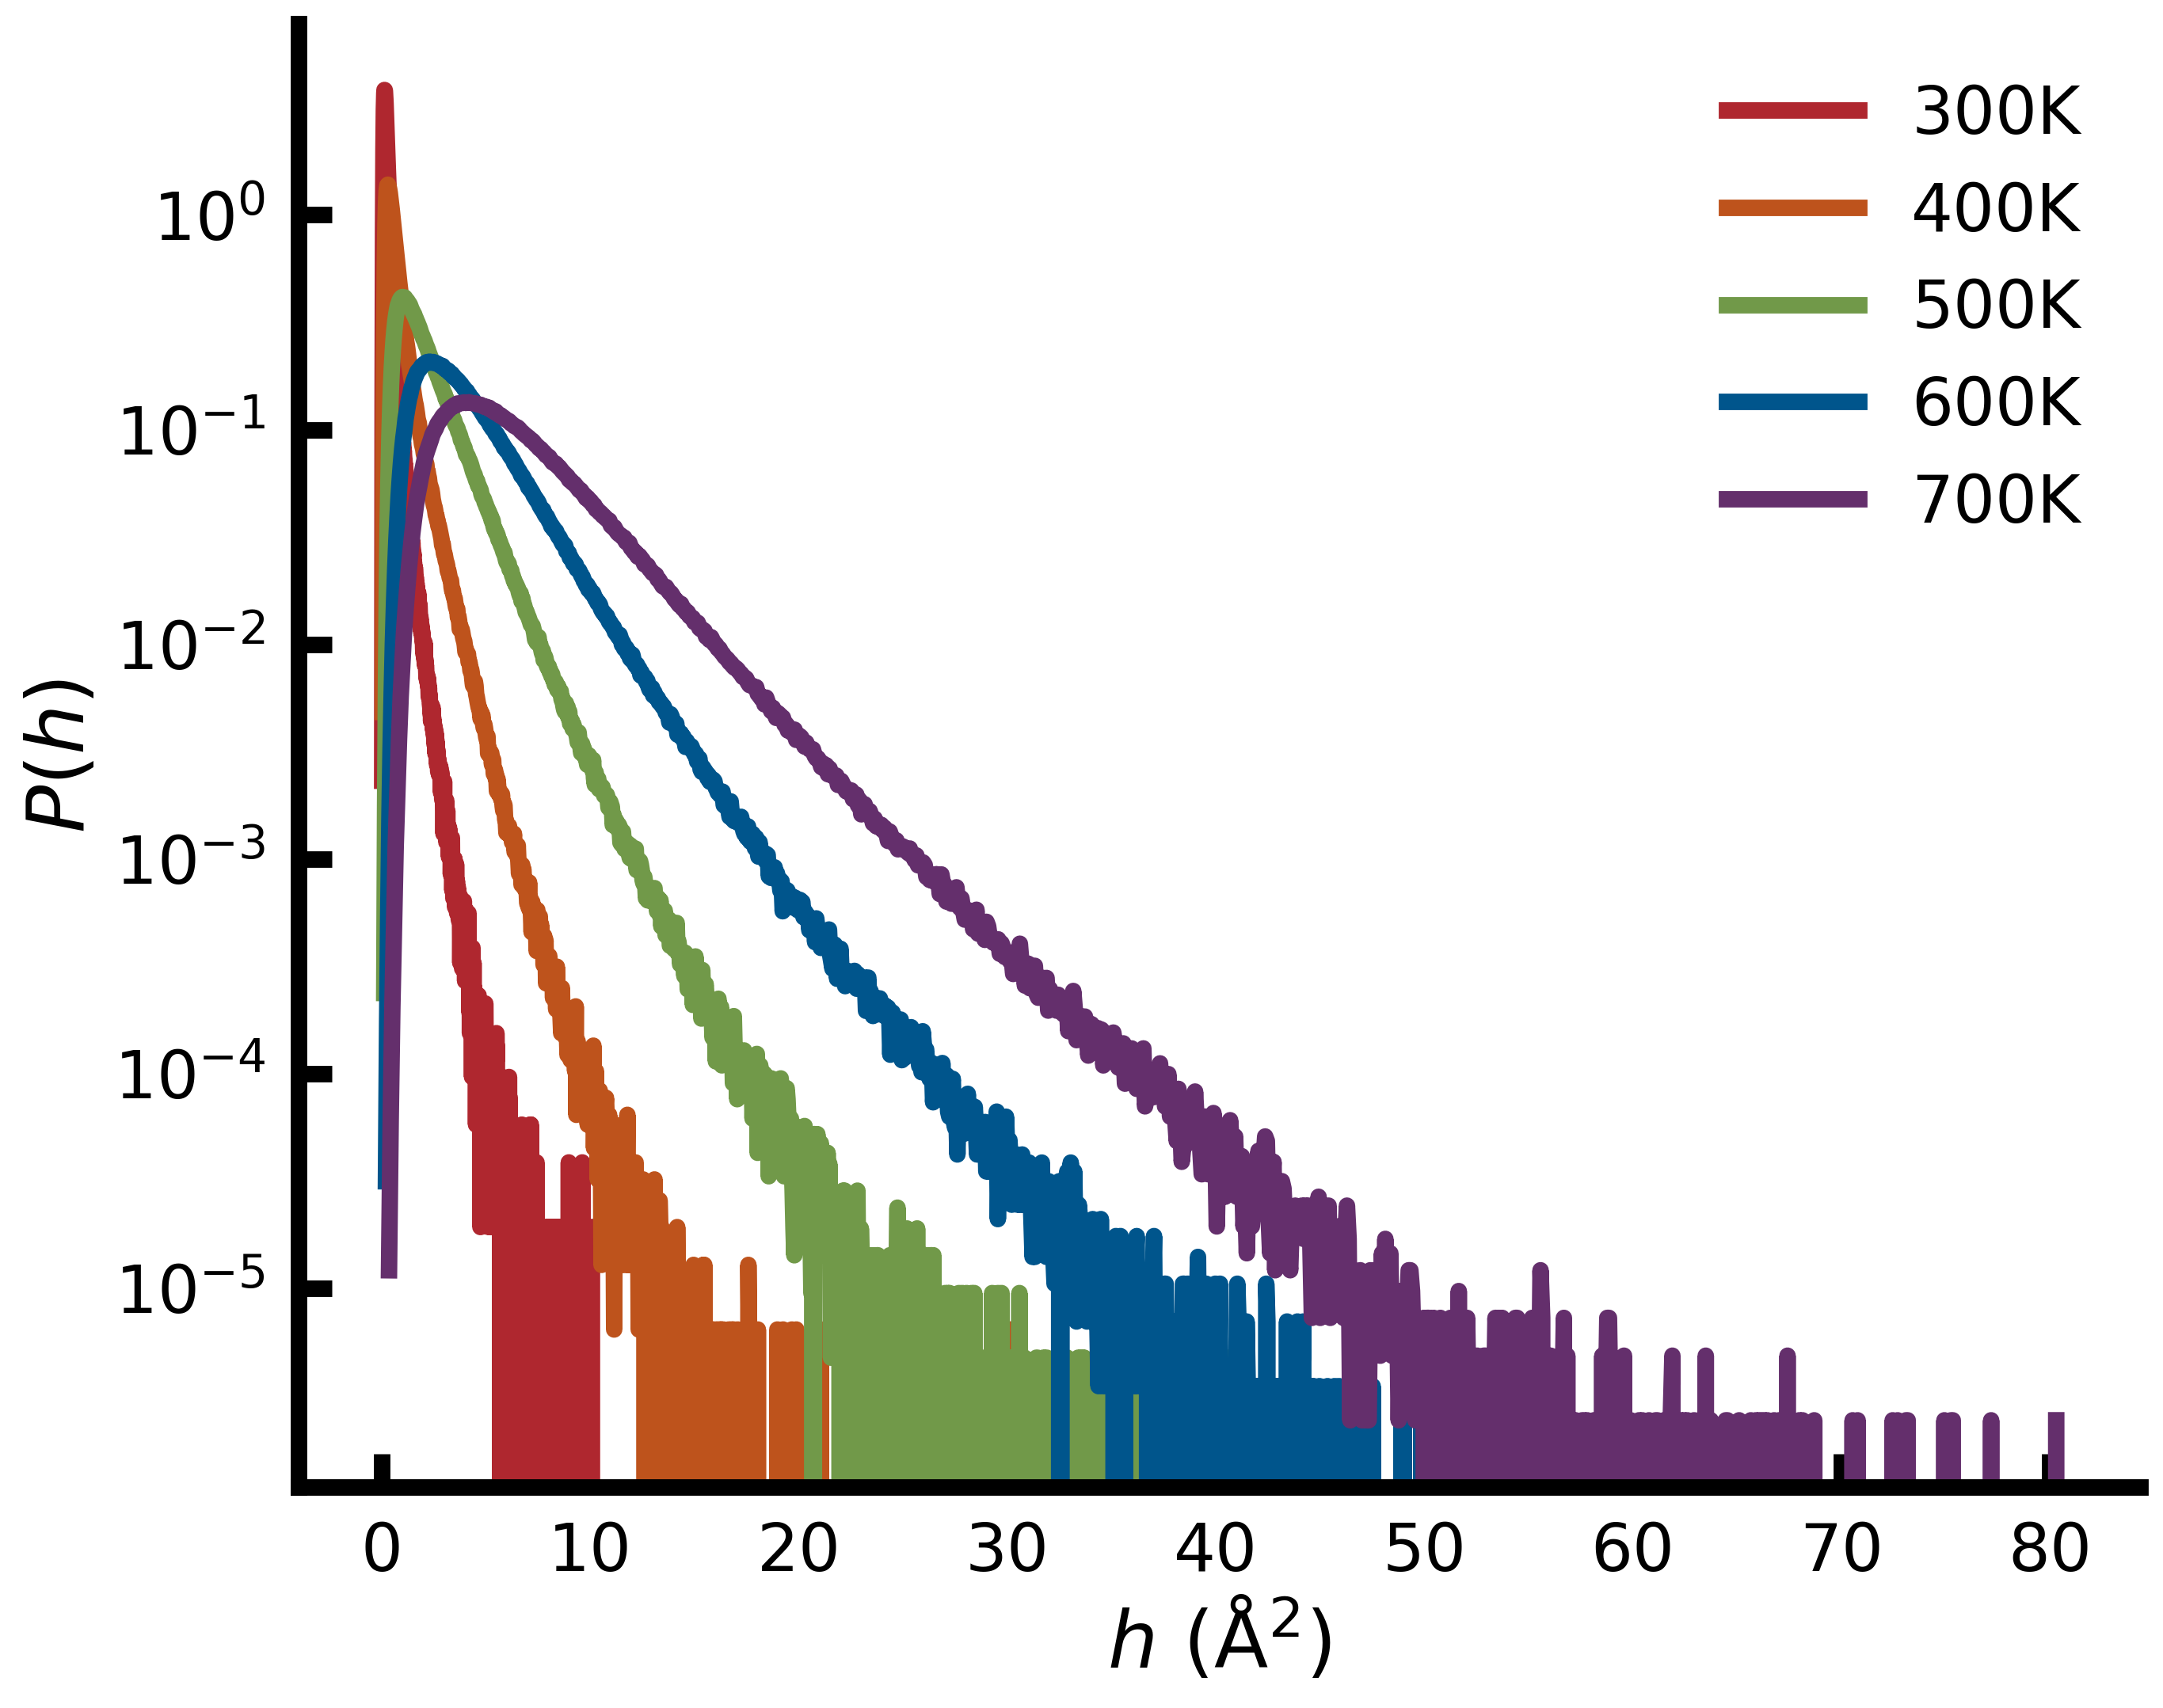

In [26]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P(h)$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/hop.out")[:,1:])
    data = np.stack(data).flatten()

    hist, bins = np.histogram(data, bins = 1000, density = True)

    ax.plot(bins[1:], hist, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)

ax.set_yscale('log')

ax.legend(fontsize = params['tick_labelsize'], frameon = False)

plt.savefig("hop_hist.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# RDF - Li

Local Minima : [ 5.285799    8.55464825 11.54529775 14.46639675 17.31794625 17.73524625
 18.29164625 18.430746   18.708946   18.917596  ]


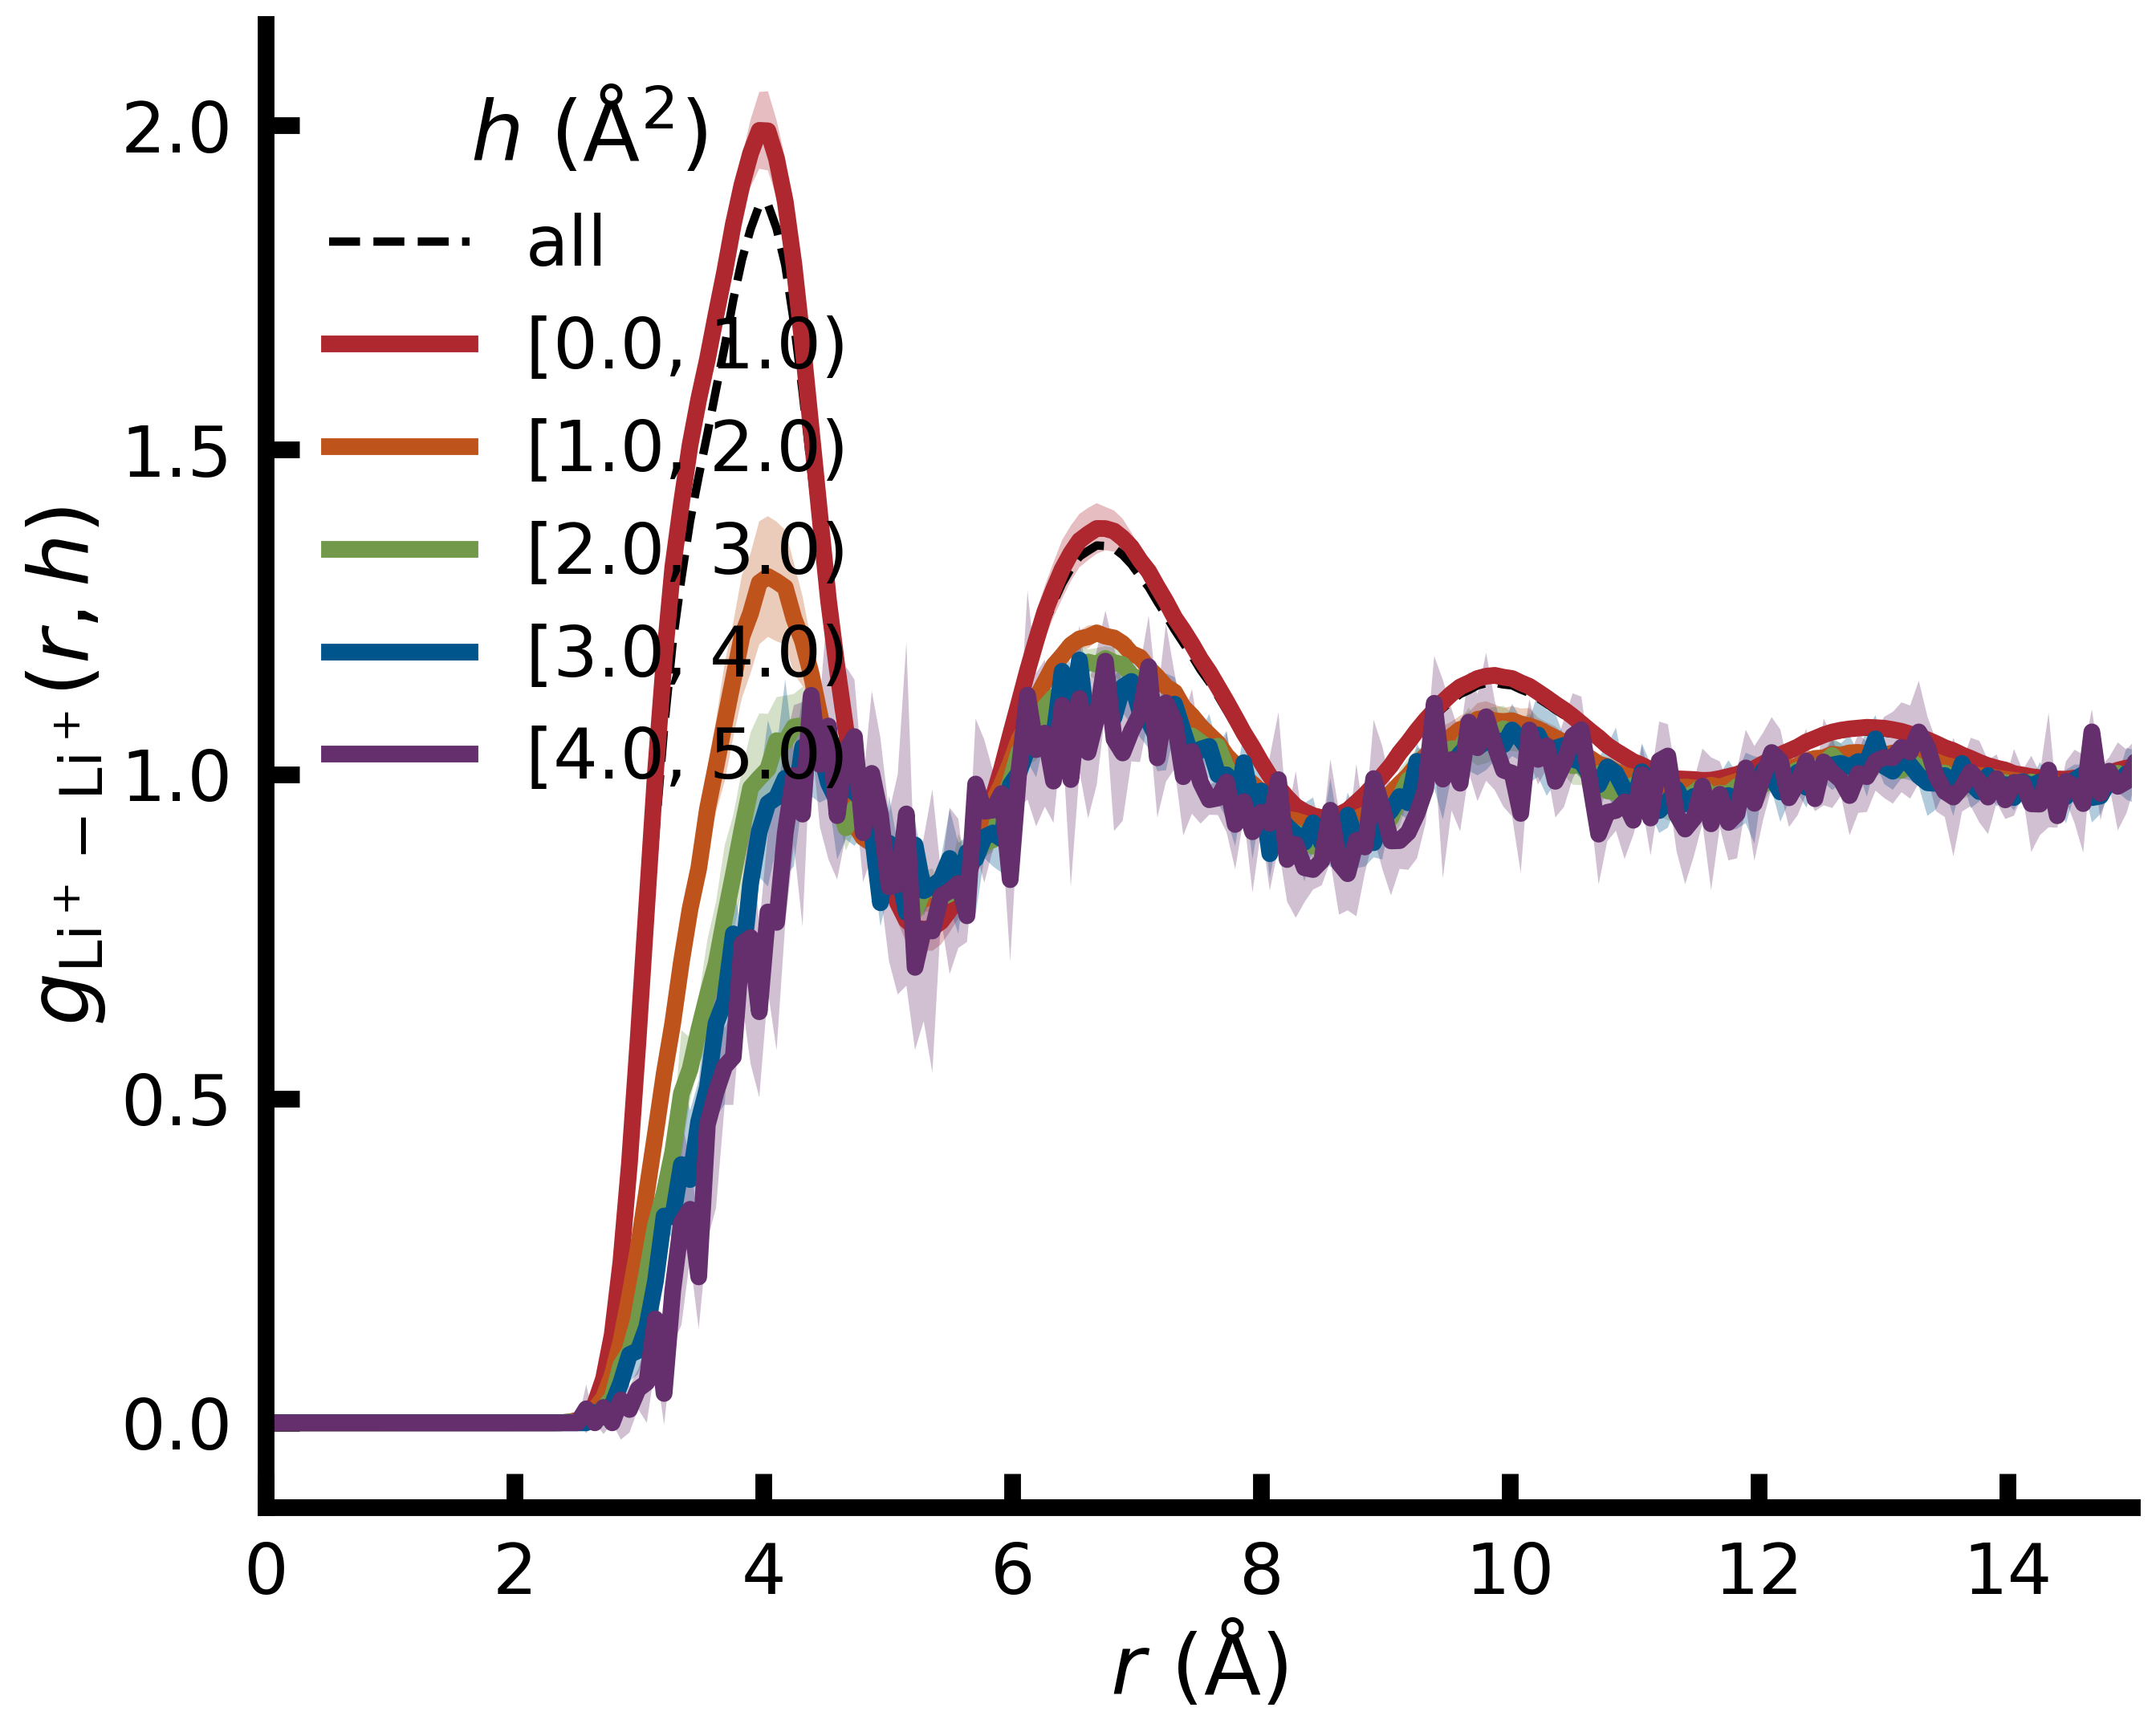

In [27]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 21,
    "axes_labelsize" : 25,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$g_{{\rm Li}^+-{\rm Li}^+}(r,h)$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/RDF_Li.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'] * 0.5, linestyle = '--', color = 'k', label = "all")
    print("Local Minima :", avg[np.r_[True, avg[1:,1] < avg[:-1,1]] & np.r_[avg[:-1,1] < avg[1:,1], True],0])

    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[0]], label = "[0.0, 1.0)")
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = COLORMAP[list(COLORMAP.keys())[0]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,3], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[1]], label = "[1.0, 2.0)")
    ax.fill_between(avg[:,0], avg[:,3] + std[:,3], avg[:,3] - std[:,3], color = COLORMAP[list(COLORMAP.keys())[1]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,4], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[2]], label = "[2.0, 3.0)")
    ax.fill_between(avg[:,0], avg[:,4] + std[:,4], avg[:,4] - std[:,4], color = COLORMAP[list(COLORMAP.keys())[2]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,5], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[3]], label = "[3.0, 4.0)")
    ax.fill_between(avg[:,0], avg[:,5] + std[:,5], avg[:,5] - std[:,5], color = COLORMAP[list(COLORMAP.keys())[3]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,6], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[4]], label = "[4.0, 5.0)")
    ax.fill_between(avg[:,0], avg[:,6] + std[:,6], avg[:,6] - std[:,6], color = COLORMAP[list(COLORMAP.keys())[4]], linewidth = 0, alpha = 0.3)

ax.set_xlim(0, 15)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False, title = "$h$ (Å$^2$)")
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("RDF_hop_Li.png", dpi = 300, bbox_inches = 'tight')
plt.show()

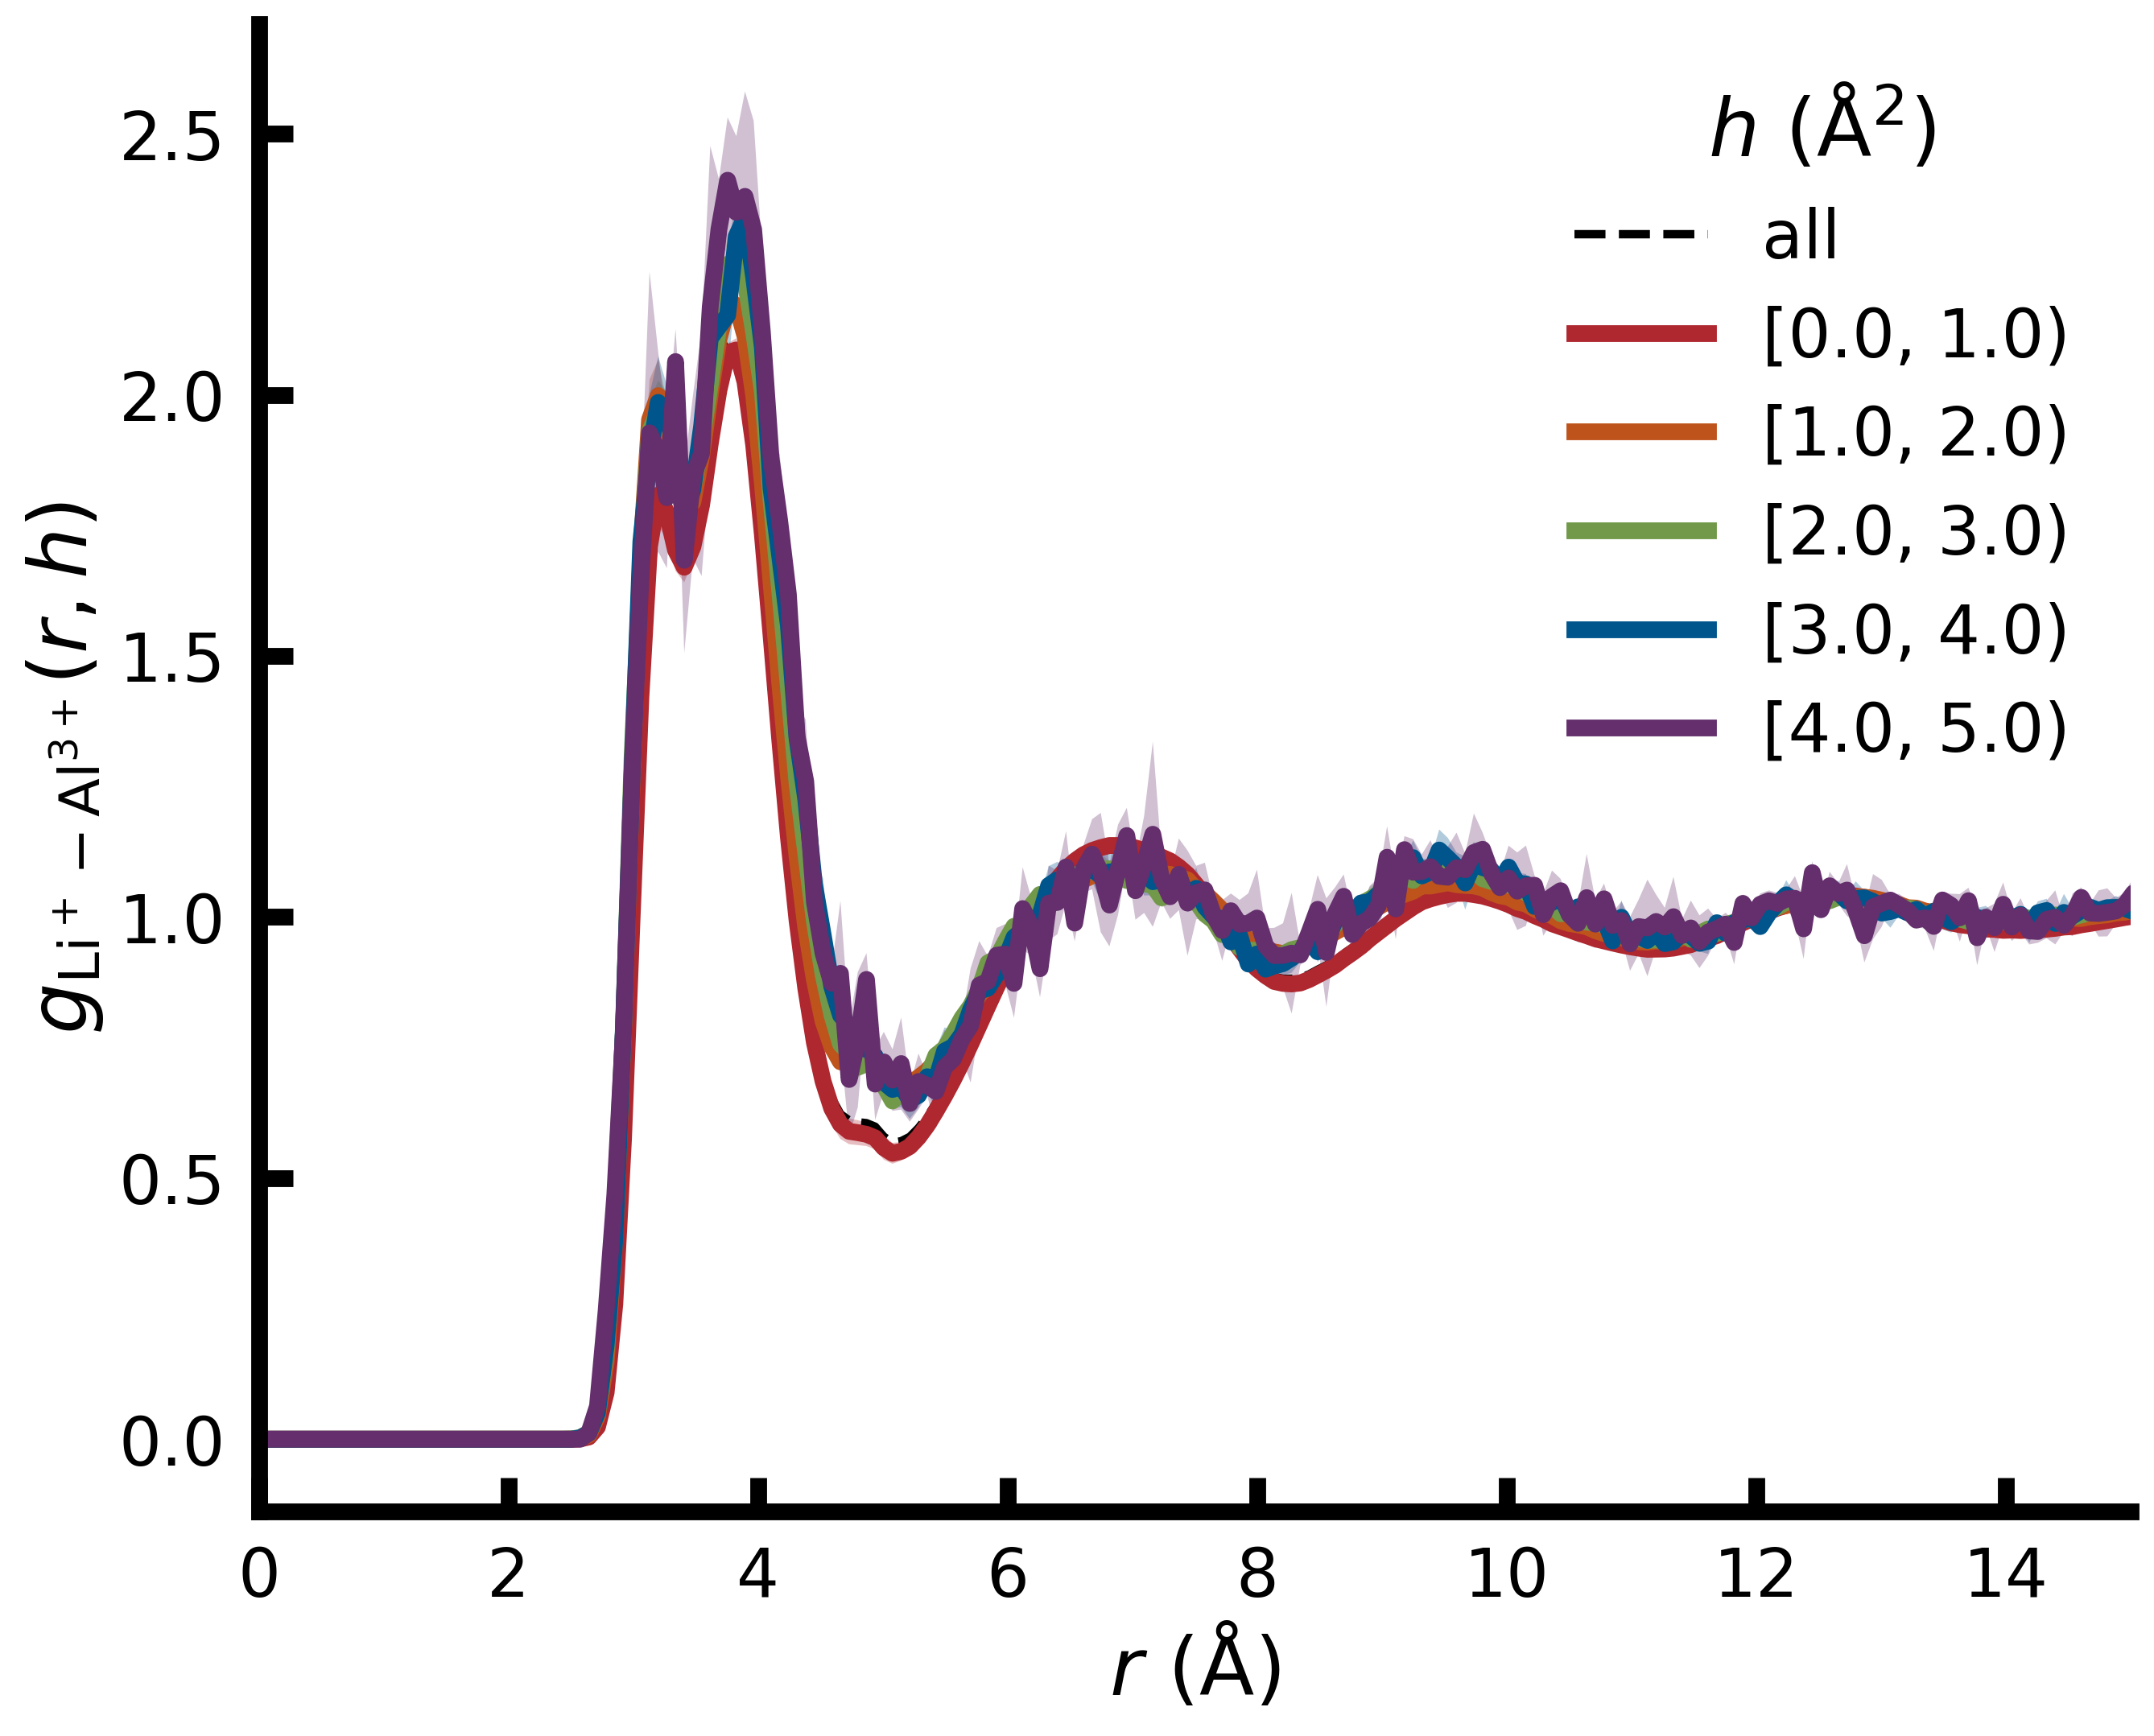

In [28]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$g_{{\rm Li}^+-{\rm Al}^{3+}}(r,h)$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/RDF_Al.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'] * 0.5, linestyle = '--', color = 'k', label = "all")

    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[0]], label = "[0.0, 1.0)")
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = COLORMAP[list(COLORMAP.keys())[0]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,3], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[1]], label = "[1.0, 2.0)")
    ax.fill_between(avg[:,0], avg[:,3] + std[:,3], avg[:,3] - std[:,3], color = COLORMAP[list(COLORMAP.keys())[1]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,4], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[2]], label = "[2.0, 3.0)")
    ax.fill_between(avg[:,0], avg[:,4] + std[:,4], avg[:,4] - std[:,4], color = COLORMAP[list(COLORMAP.keys())[2]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,5], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[3]], label = "[3.0, 4.0)")
    ax.fill_between(avg[:,0], avg[:,5] + std[:,5], avg[:,5] - std[:,5], color = COLORMAP[list(COLORMAP.keys())[3]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,6], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[4]], label = "[4.0, 5.0)")
    ax.fill_between(avg[:,0], avg[:,6] + std[:,6], avg[:,6] - std[:,6], color = COLORMAP[list(COLORMAP.keys())[4]], linewidth = 0, alpha = 0.3)

ax.set_xlim(0, 15)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False, title = "$h$ (Å$^2$)")
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("RDF_hop_Al.png", dpi = 300, bbox_inches = 'tight')
plt.show()

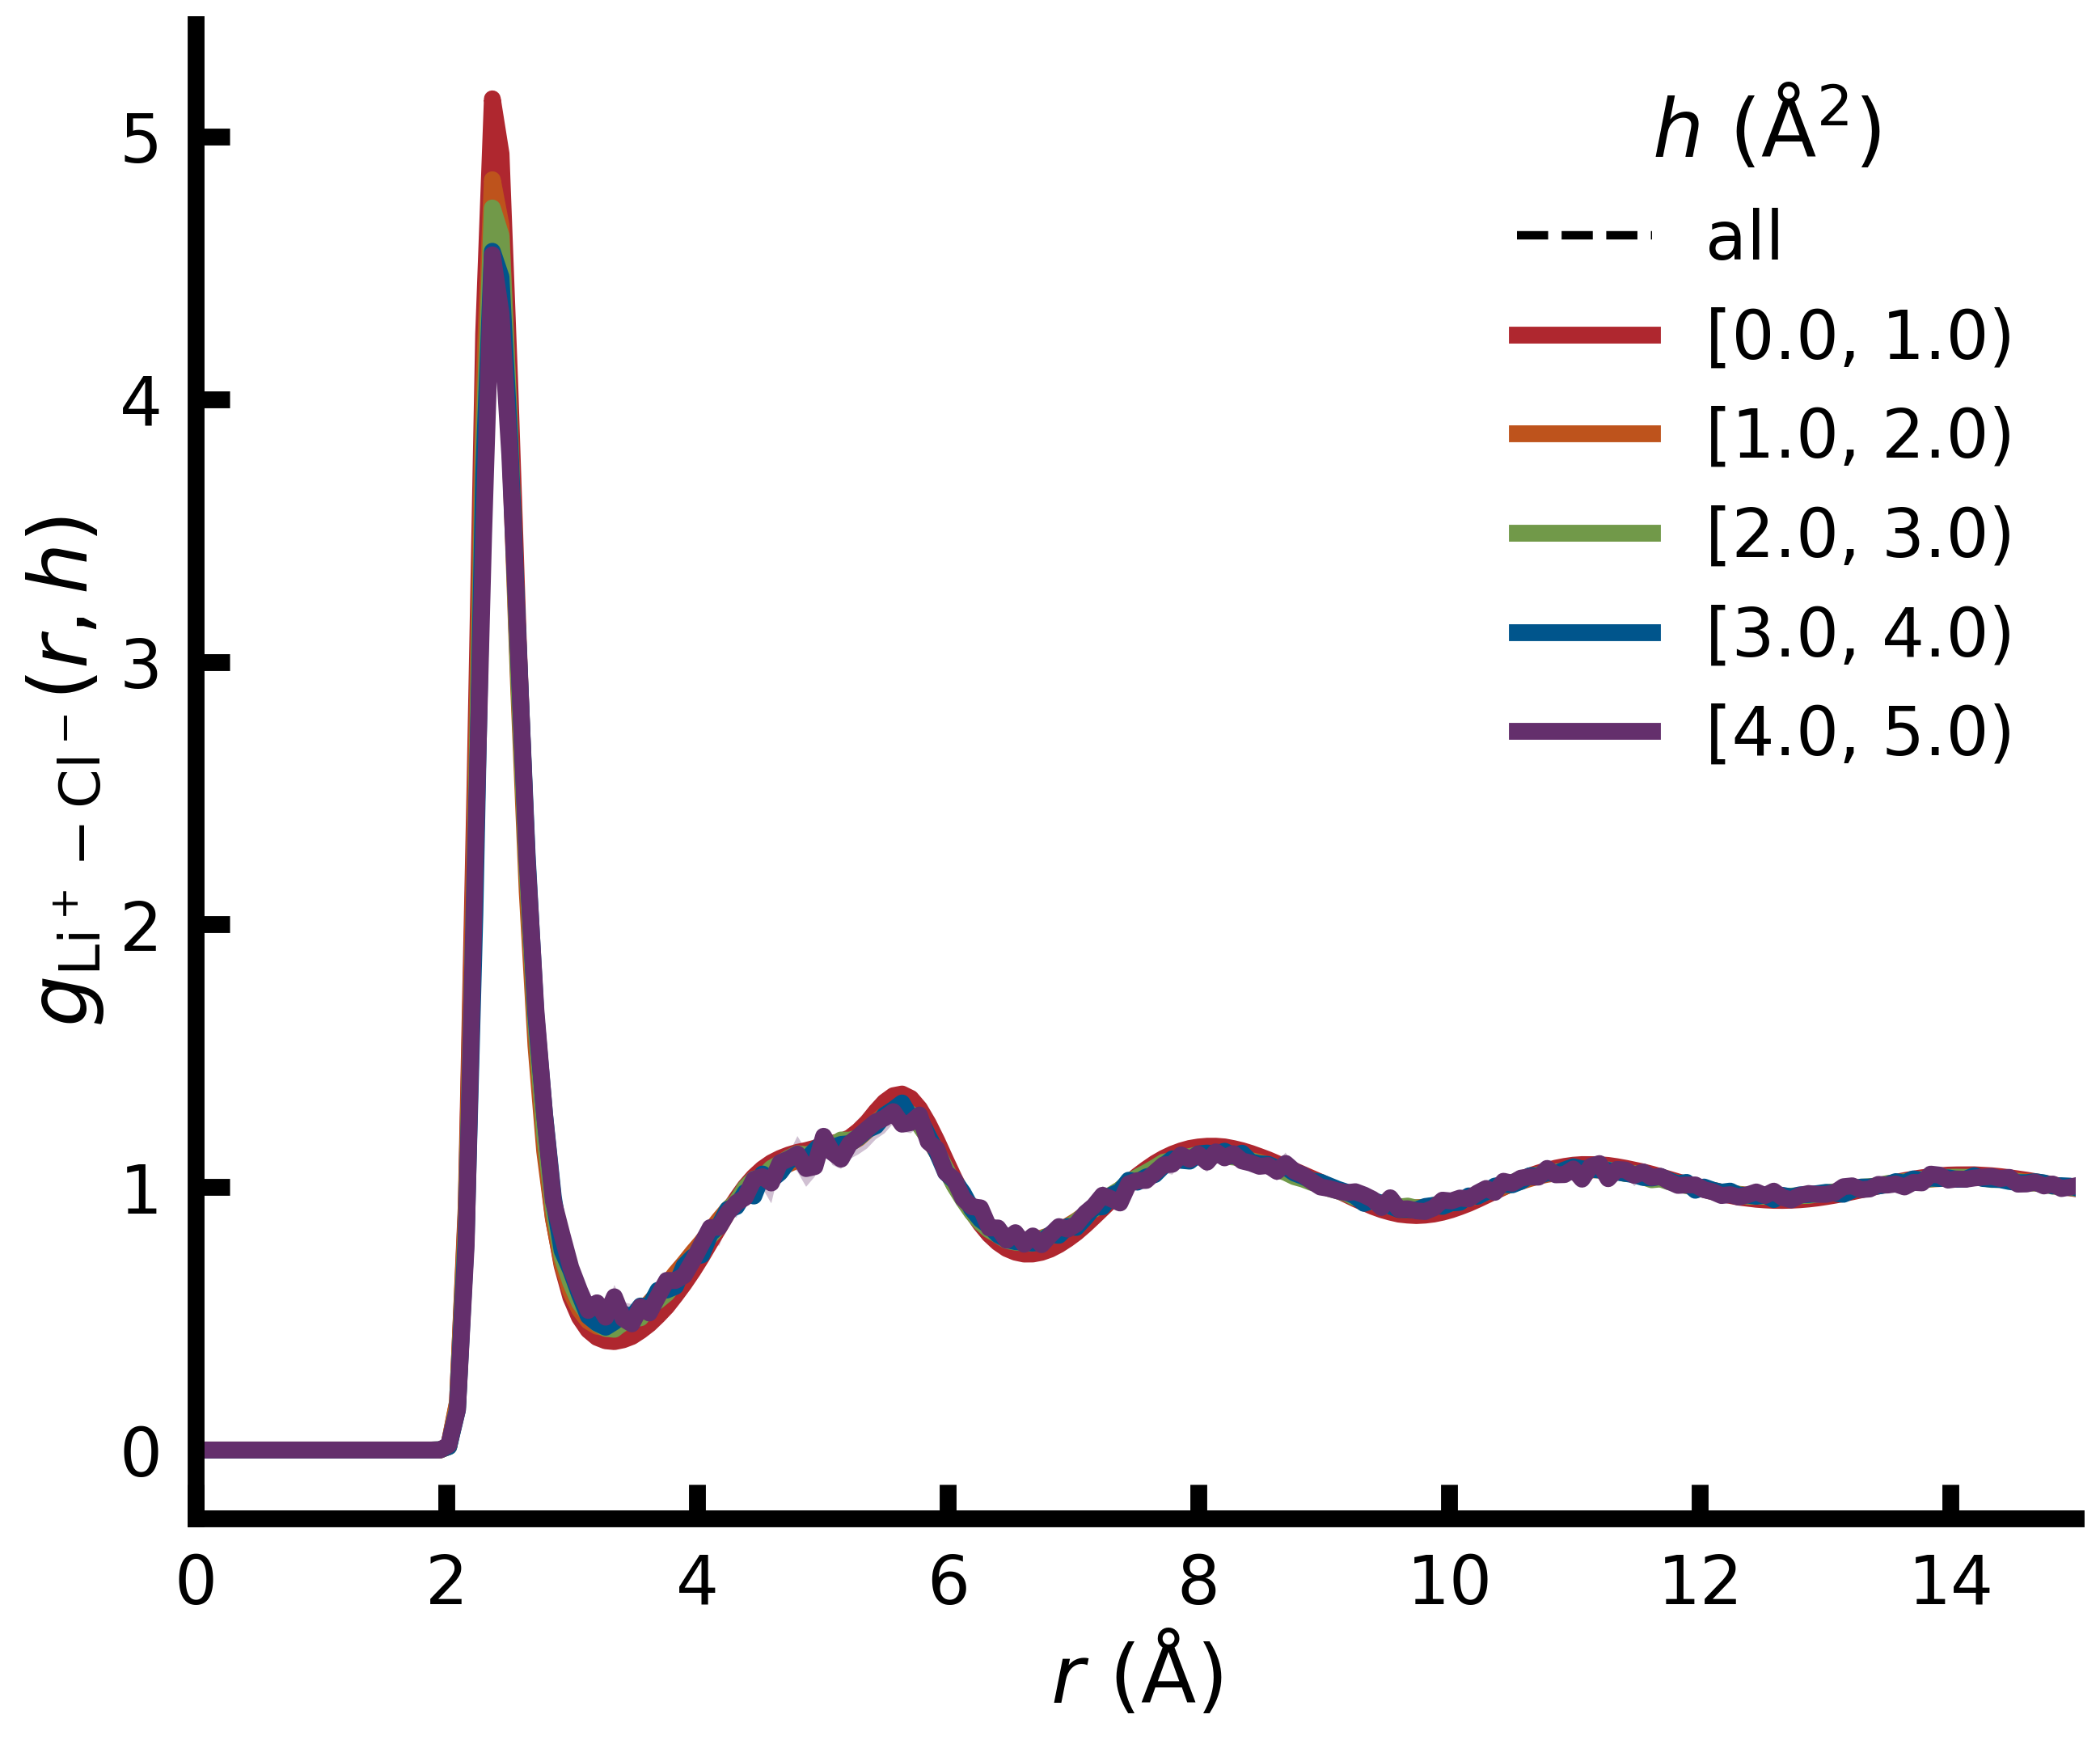

In [29]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$g_{{\rm Li}^+-{\rm Cl}^-}(r,h)$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/RDF_Cl.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)
    
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'] * 0.5, linestyle = '--', color = 'k', label = "all")

    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[0]], label = "[0.0, 1.0)")
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = COLORMAP[list(COLORMAP.keys())[0]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,3], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[1]], label = "[1.0, 2.0)")
    ax.fill_between(avg[:,0], avg[:,3] + std[:,3], avg[:,3] - std[:,3], color = COLORMAP[list(COLORMAP.keys())[1]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,4], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[2]], label = "[2.0, 3.0)")
    ax.fill_between(avg[:,0], avg[:,4] + std[:,4], avg[:,4] - std[:,4], color = COLORMAP[list(COLORMAP.keys())[2]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,5], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[3]], label = "[3.0, 4.0)")
    ax.fill_between(avg[:,0], avg[:,5] + std[:,5], avg[:,5] - std[:,5], color = COLORMAP[list(COLORMAP.keys())[3]], linewidth = 0, alpha = 0.3)

    ax.plot(avg[:,0], avg[:,6], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[4]], label = "[4.0, 5.0)")
    ax.fill_between(avg[:,0], avg[:,6] + std[:,6], avg[:,6] - std[:,6], color = COLORMAP[list(COLORMAP.keys())[4]], linewidth = 0, alpha = 0.3)

ax.set_xlim(0, 15)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False, title = "$h$ (Å$^2$)")
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("RDF_hop_Cl.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# Shell - h

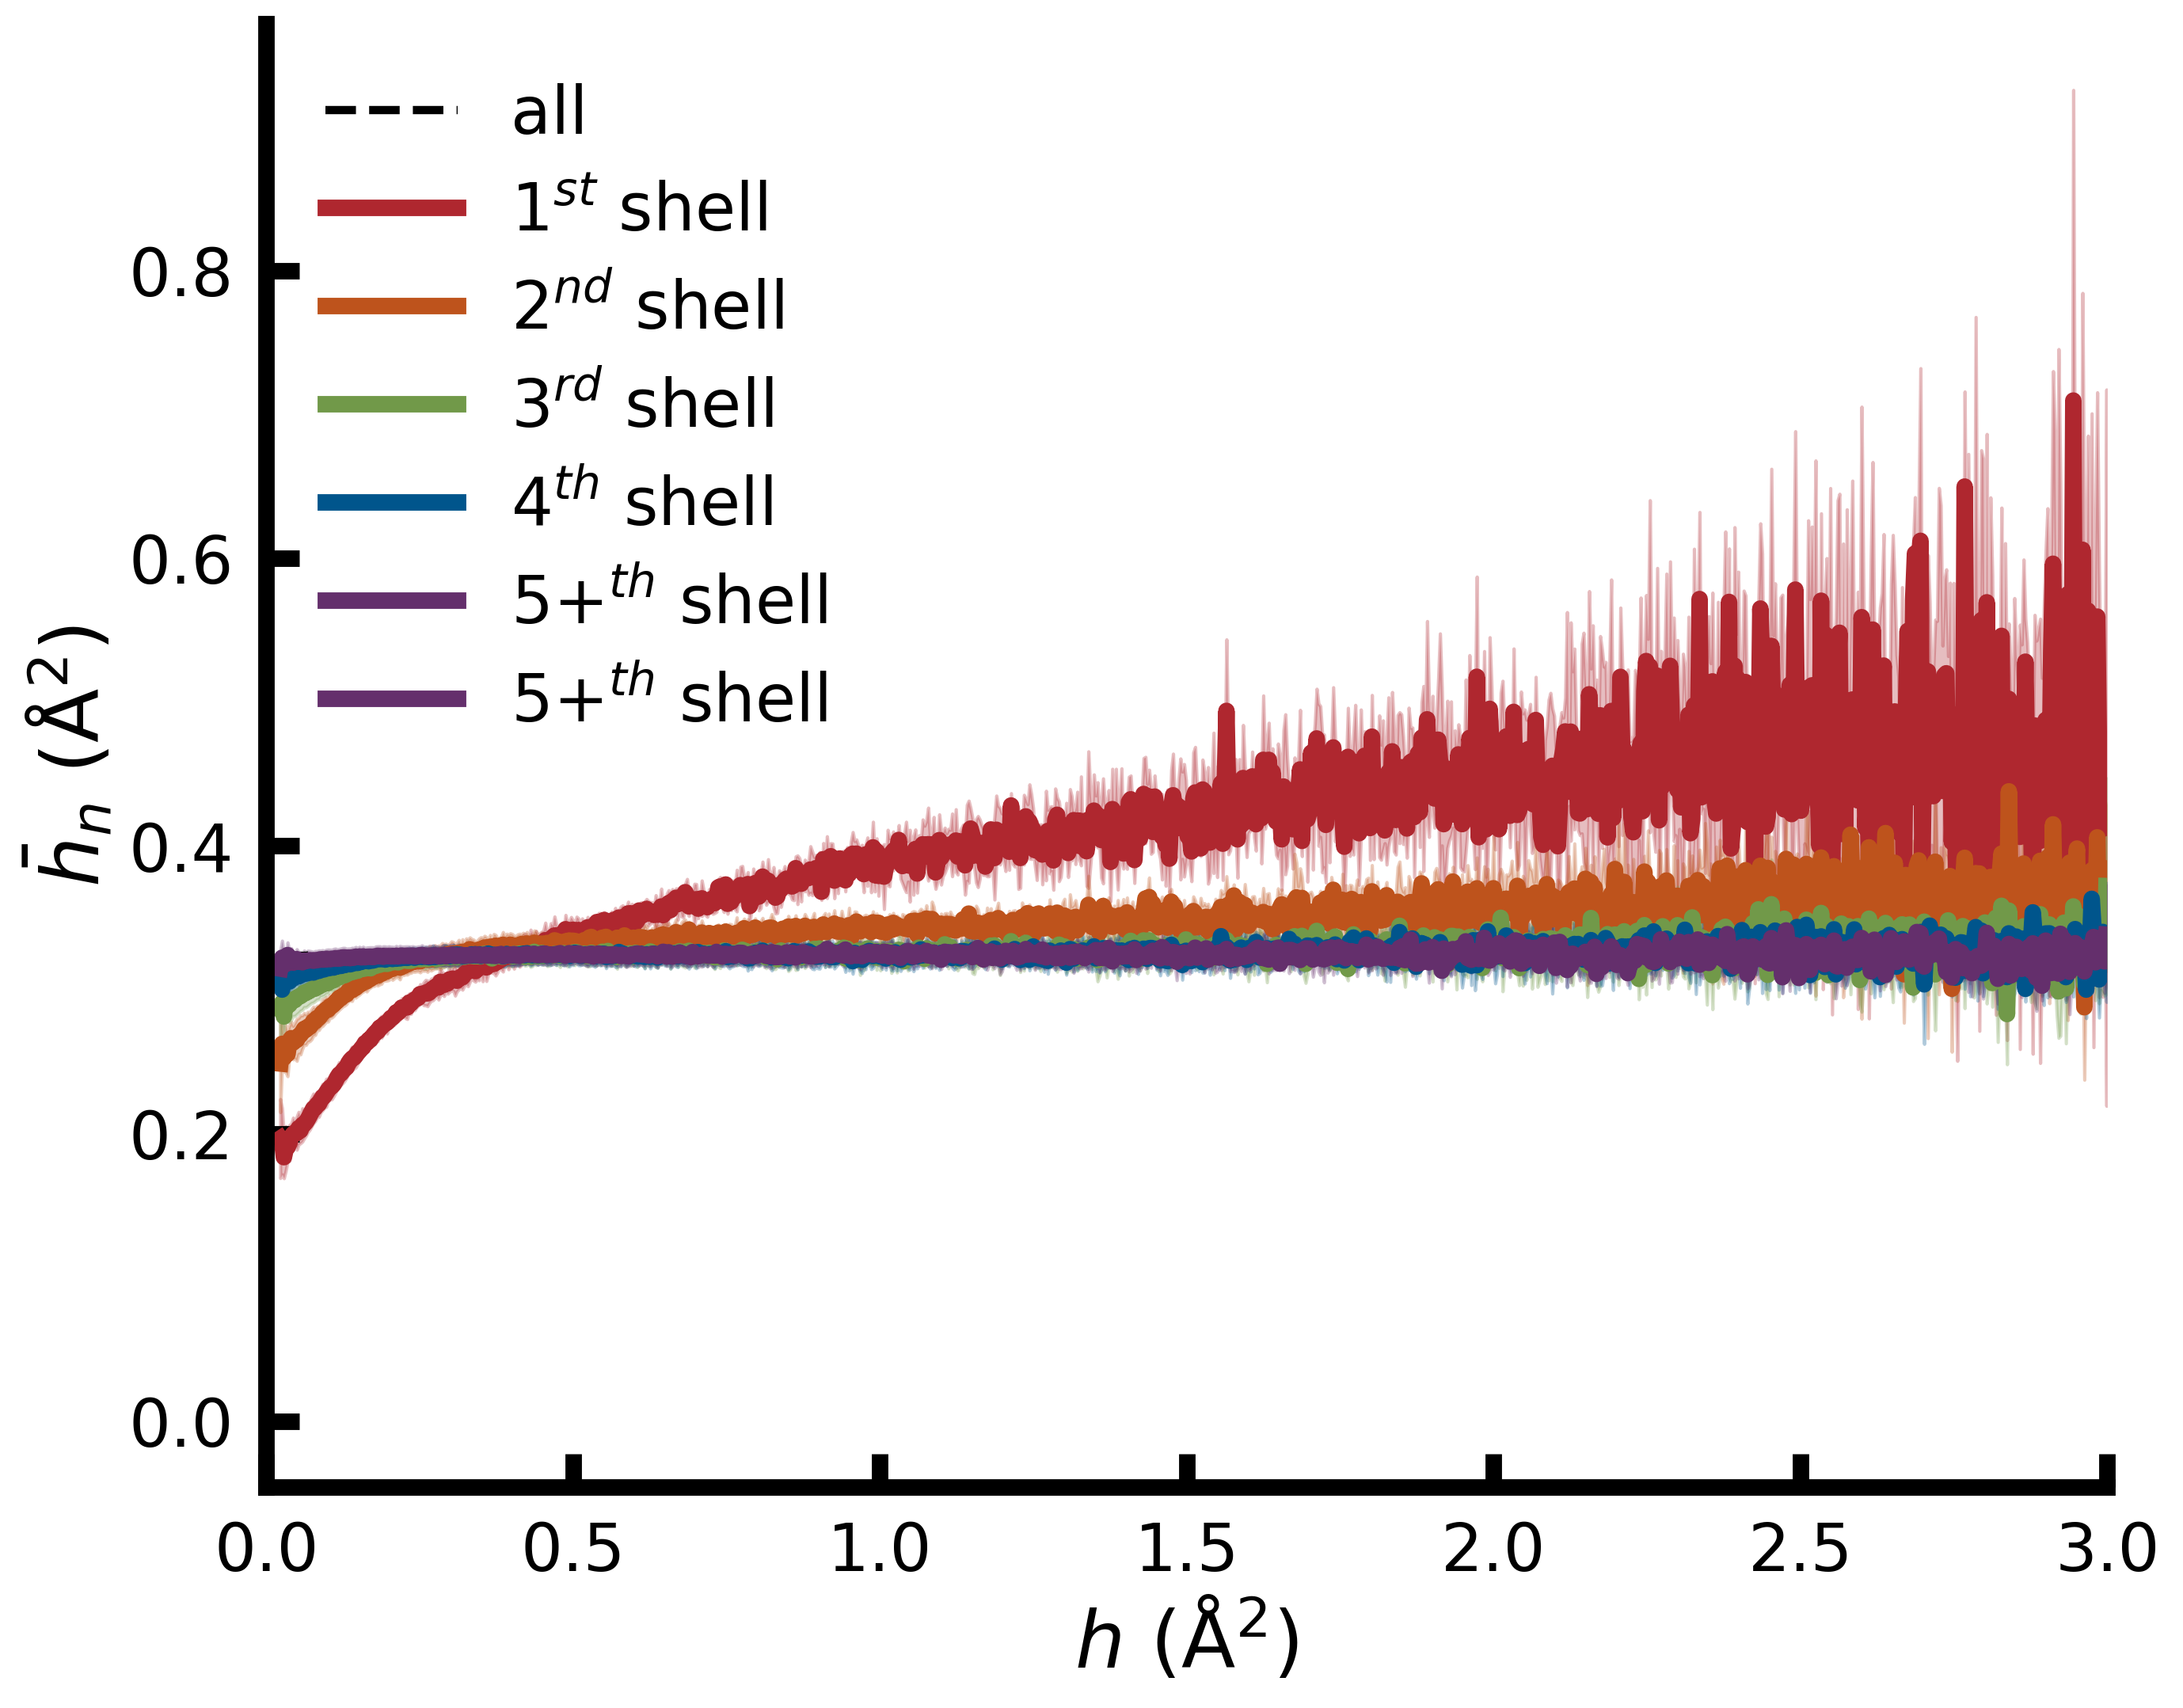

In [30]:

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\bar{h}_n$ (Å$^2$)", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/shell.out")
        data.append(temp)
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'] * 0.5, linestyle = '--', color = 'k', label = "all")

    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[0]], label = "1$^{st}$ shell")
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = COLORMAP[list(COLORMAP.keys())[0]], alpha = 0.3)

    ax.plot(avg[:,0], avg[:,3], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[1]], label = "2$^{nd}$ shell")
    ax.fill_between(avg[:,0], avg[:,3] + std[:,3], avg[:,3] - std[:,3], color = COLORMAP[list(COLORMAP.keys())[1]], alpha = 0.3)

    ax.plot(avg[:,0], avg[:,4], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[2]], label = "3$^{rd}$ shell")
    ax.fill_between(avg[:,0], avg[:,4] + std[:,4], avg[:,4] - std[:,4], color = COLORMAP[list(COLORMAP.keys())[2]], alpha = 0.3)

    ax.plot(avg[:,0], avg[:,5], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[3]],label = "4$^{th}$ shell")
    ax.fill_between(avg[:,0], avg[:,5] + std[:,5], avg[:,5] - std[:,5], color = COLORMAP[list(COLORMAP.keys())[3]], alpha = 0.3)

    ax.plot(avg[:,0], avg[:,6], std[:,6], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[4]], label = "5+$^{th}$ shell")
    ax.fill_between(avg[:,0], avg[:,6] + std[:,6], avg[:,6] - std[:,6], color = COLORMAP[list(COLORMAP.keys())[4]], alpha = 0.3)

ax.set_xlim(0, 3)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("shell_hop.png", dpi = 300, bbox_inches = 'tight')
plt.show()

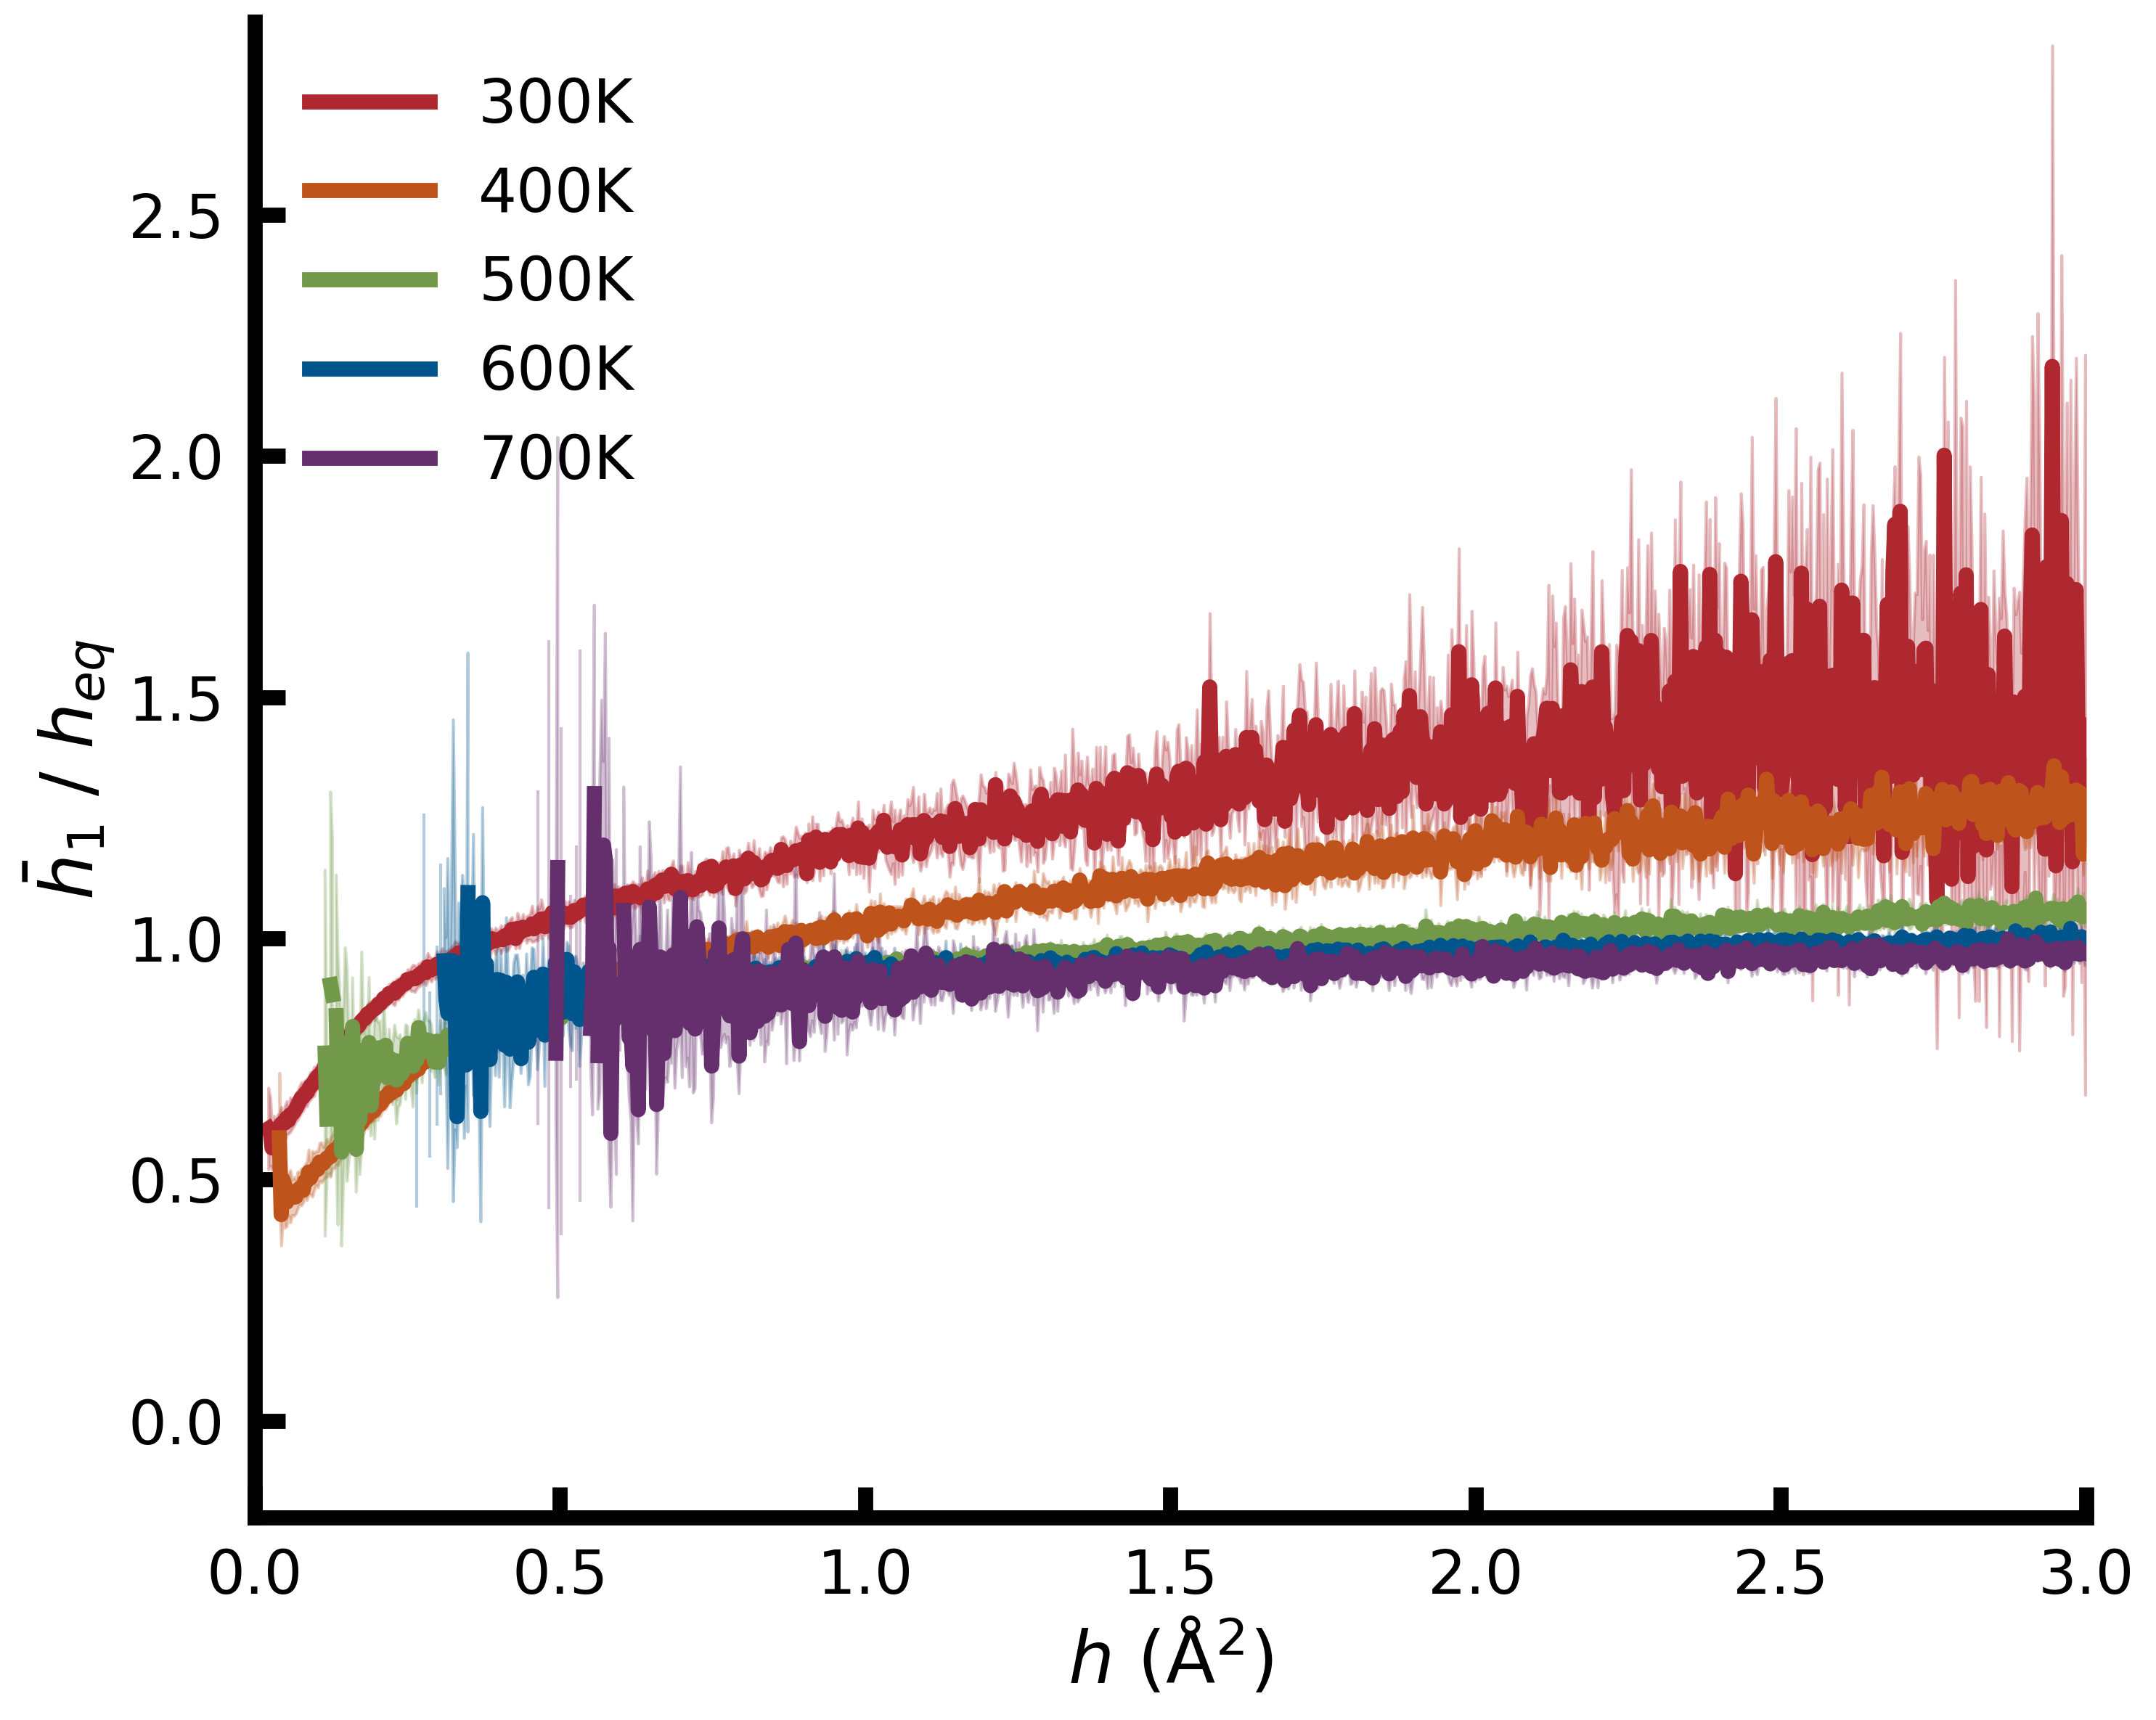

In [31]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 5,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\bar{h}_{1}$ / $h_{eq}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/shell.out")
        data.append(temp)
        h.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/hop.out")[:,1:].mean())
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)
    heq = np.stack(h).mean()

    ax.plot(avg[:,0], avg[:,2] / heq, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)
    ax.fill_between(avg[:,0], (avg[:,2] + std[:,2]) / heq, (avg[:,2] - std[:,2]) / heq, color = COLORMAP[list(COLORMAP.keys())[idx]], alpha = 0.3)

ax.set_xlim(0, 3)
ax.set_ylim(-0.2, 2.9)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("shell_hop_n1.png", dpi = 300, bbox_inches = 'tight')
plt.show()

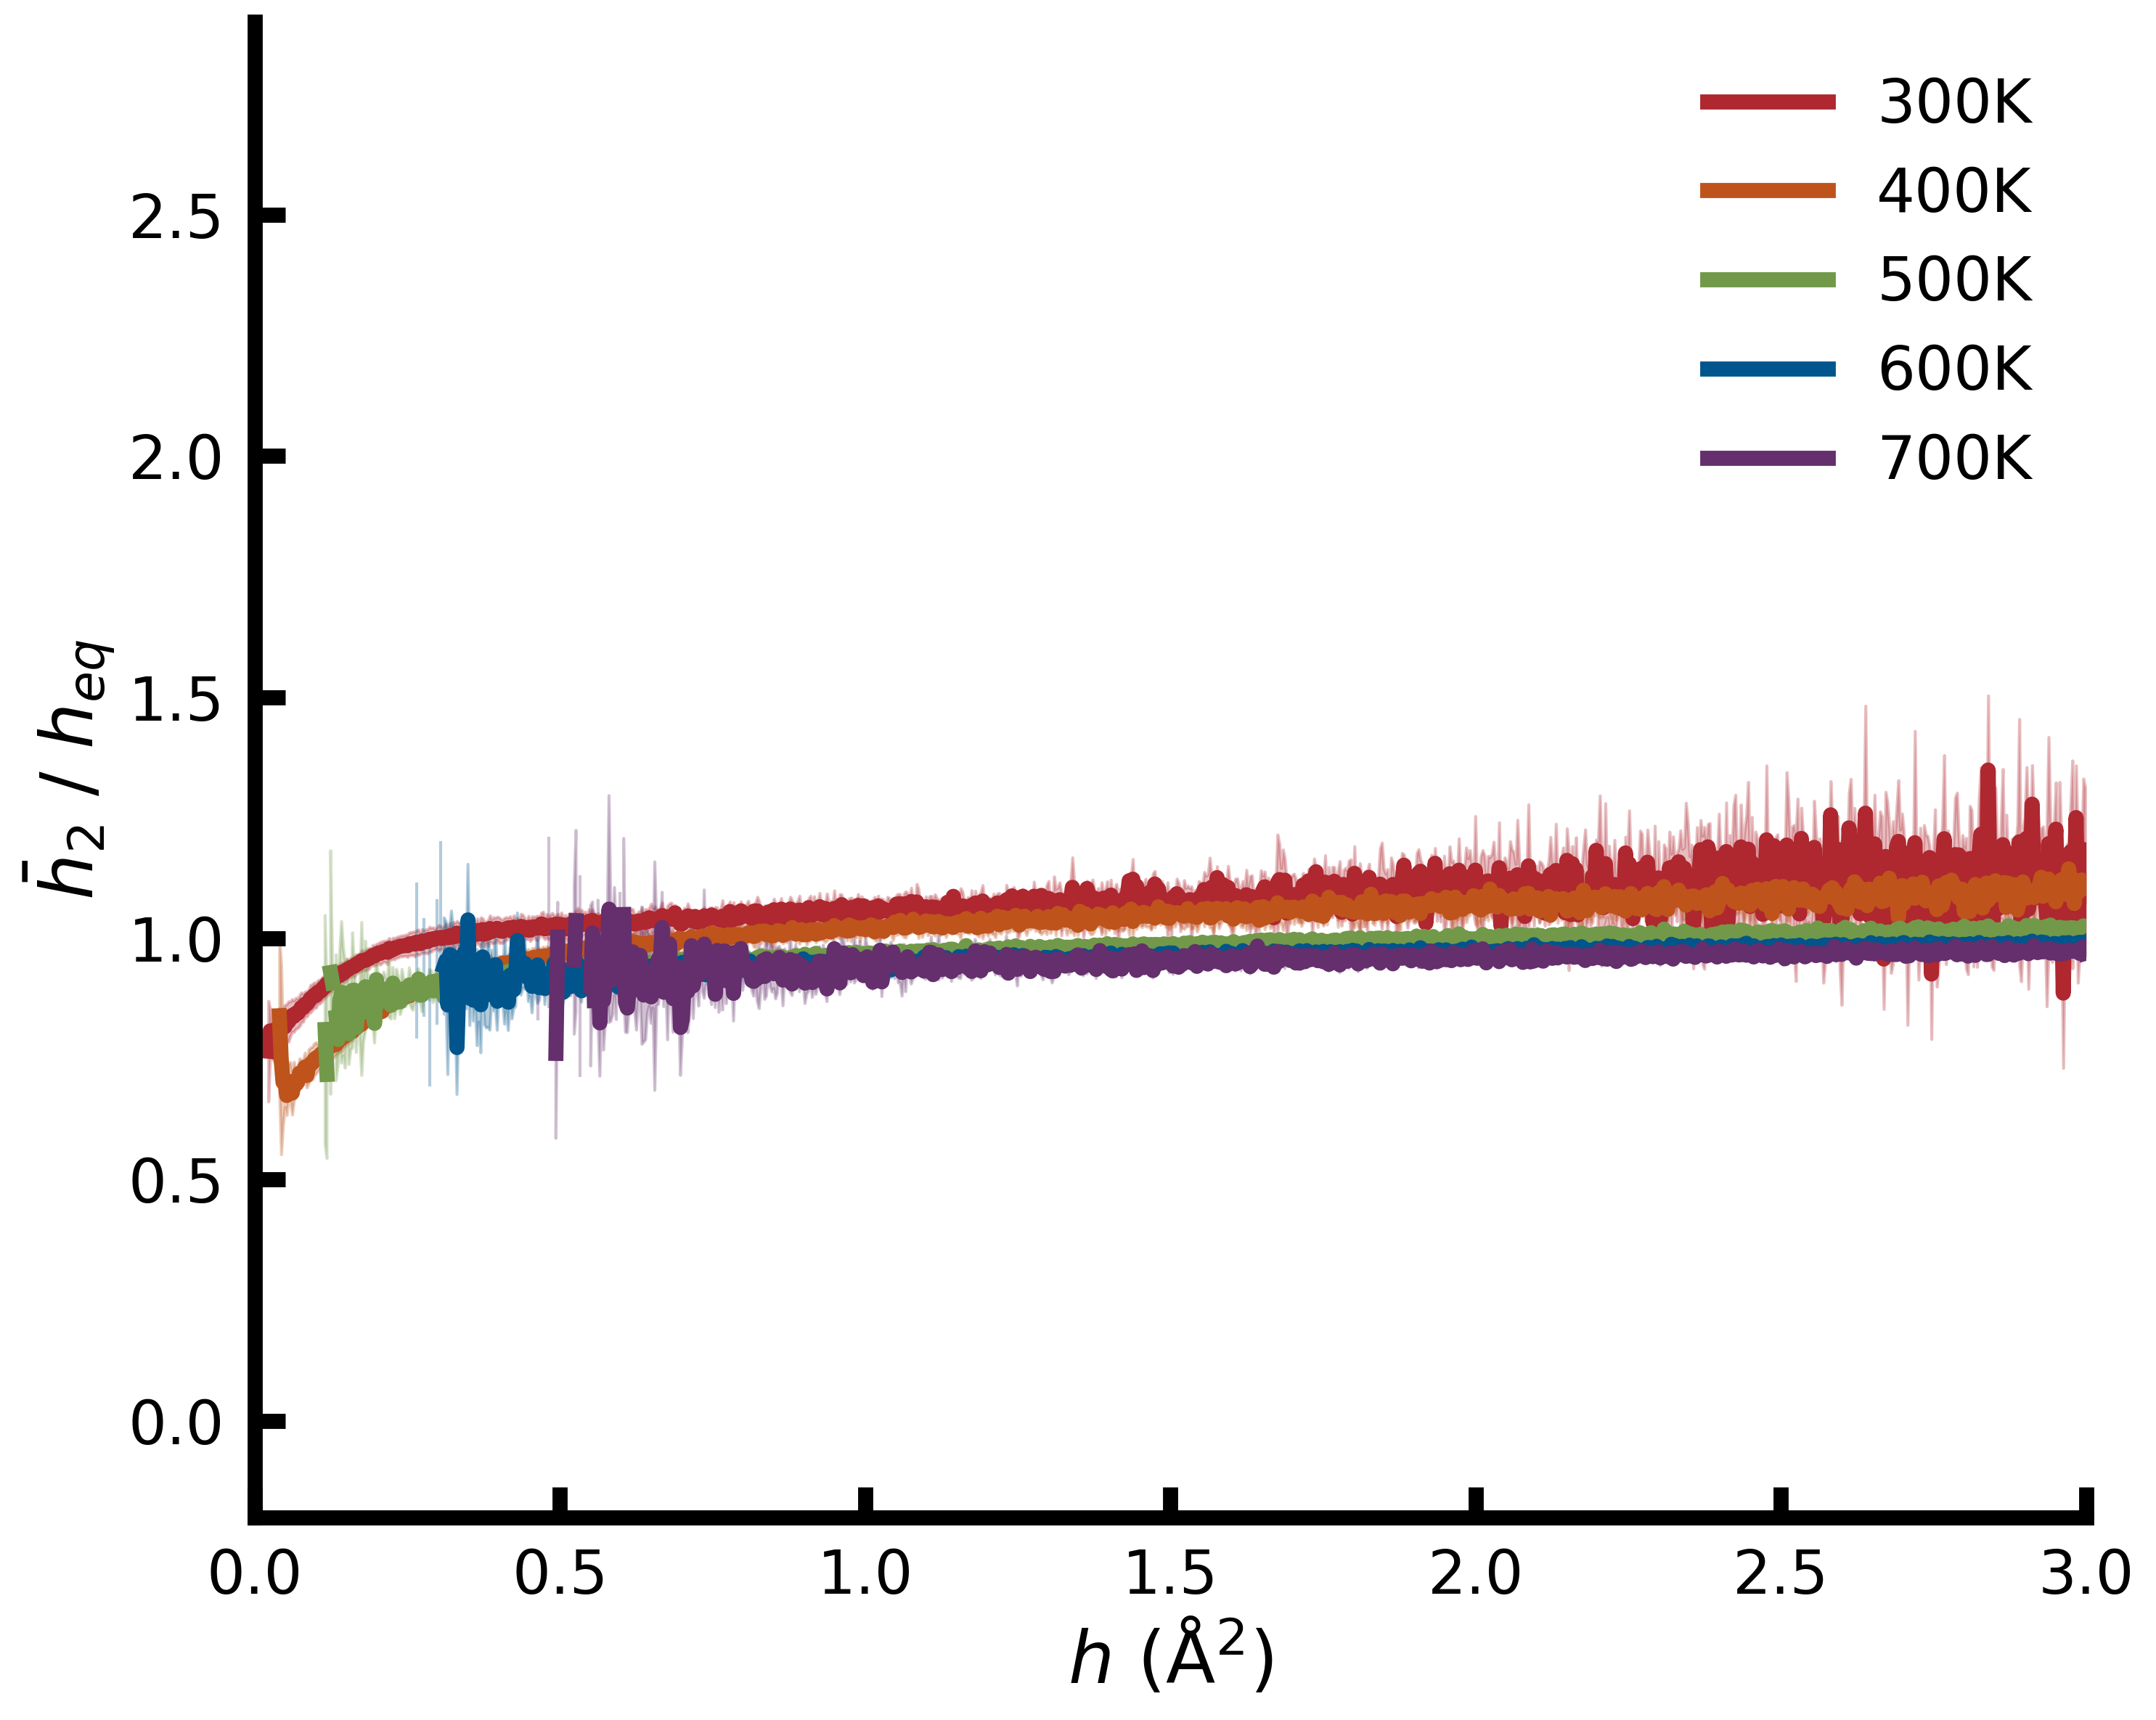

In [32]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 5,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\bar{h}_{2}$ / $h_{eq}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/shell.out")
        data.append(temp)
        h.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/hop.out")[:,1:].mean())
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)
    heq = np.stack(h).mean()

    ax.plot(avg[:,0], avg[:,3] / heq, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)
    ax.fill_between(avg[:,0], (avg[:,3] + std[:,3]) / heq, (avg[:,3] - std[:,3]) / heq, color = COLORMAP[list(COLORMAP.keys())[idx]], alpha = 0.3)

ax.set_xlim(0, 3)
ax.set_ylim(-0.2, 2.9)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("shell_hop_n2.png", dpi = 300, bbox_inches = 'tight')
plt.show()

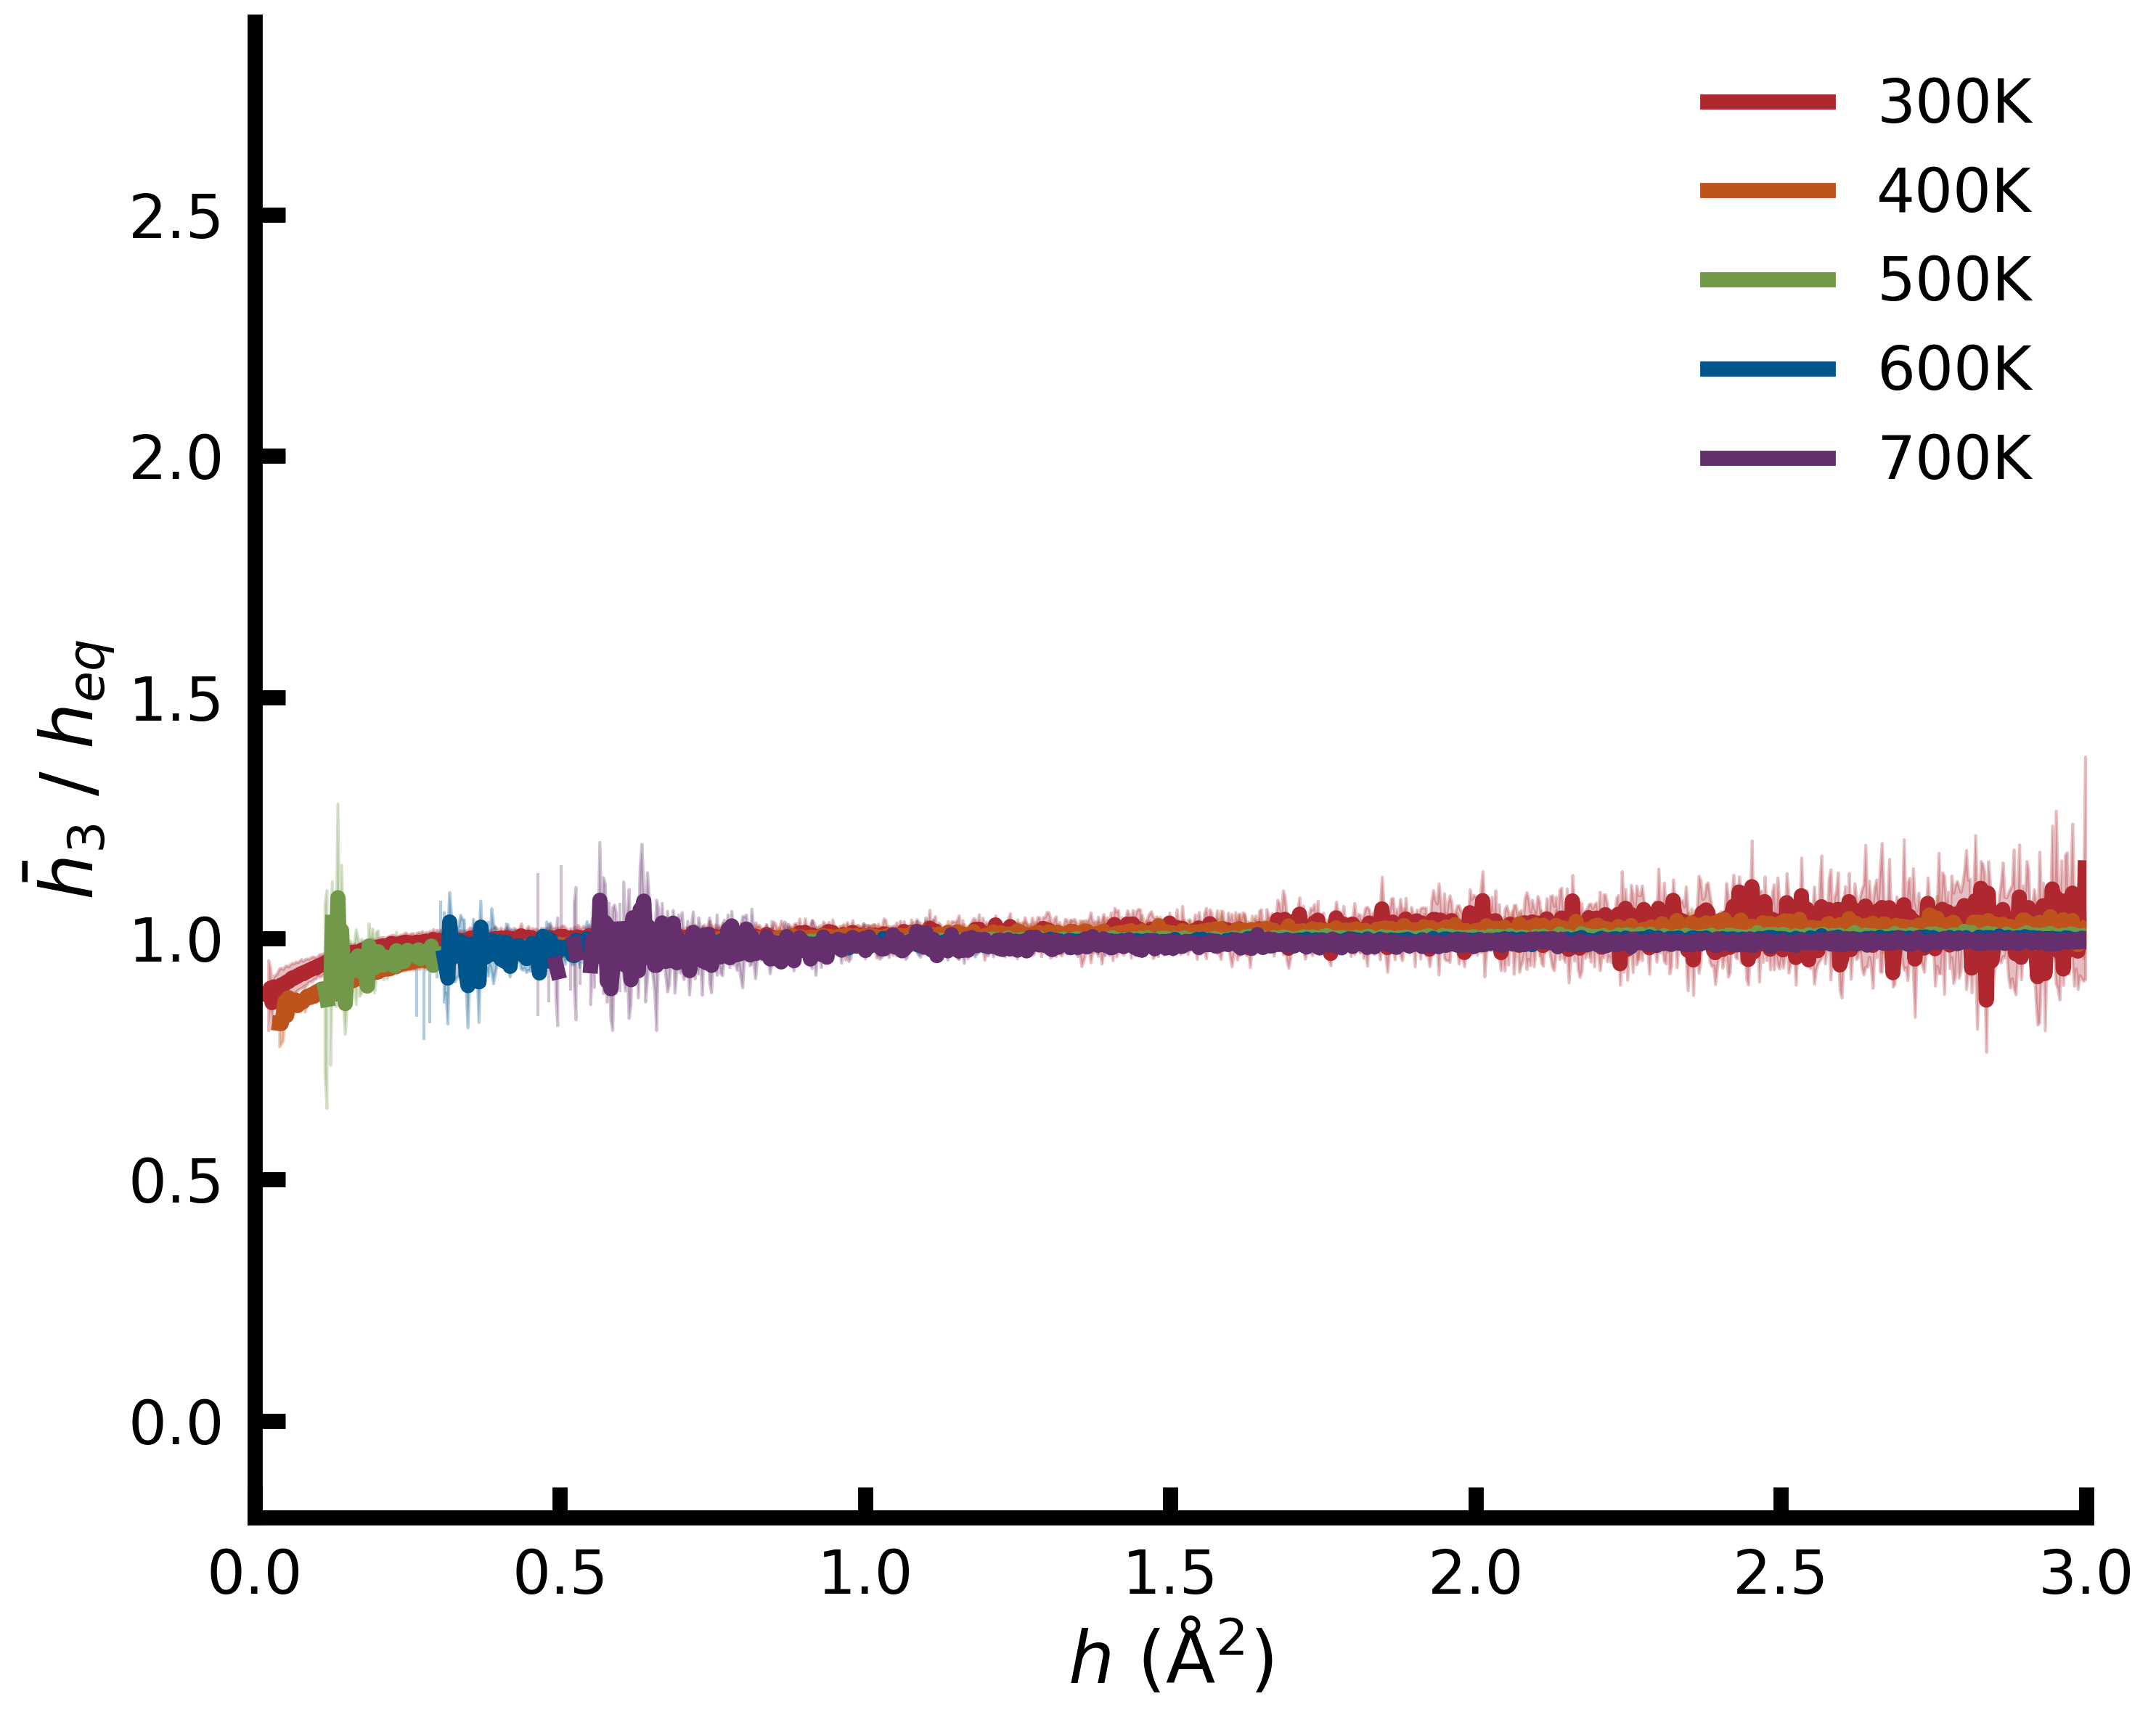

In [33]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 5,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\bar{h}_{3}$ / $h_{eq}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/shell.out")
        data.append(temp)
        h.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/hop.out")[:,1:].mean())
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)
    heq = np.stack(h).mean()

    ax.plot(avg[:,0], avg[:,4] / heq, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)
    ax.fill_between(avg[:,0], (avg[:,4] + std[:,4]) / heq, (avg[:,4] - std[:,4]) / heq, color = COLORMAP[list(COLORMAP.keys())[idx]], alpha = 0.3)

ax.set_xlim(0, 3)
ax.set_ylim(-0.2, 2.9)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("shell_hop_n3.png", dpi = 300, bbox_inches = 'tight')
plt.show()

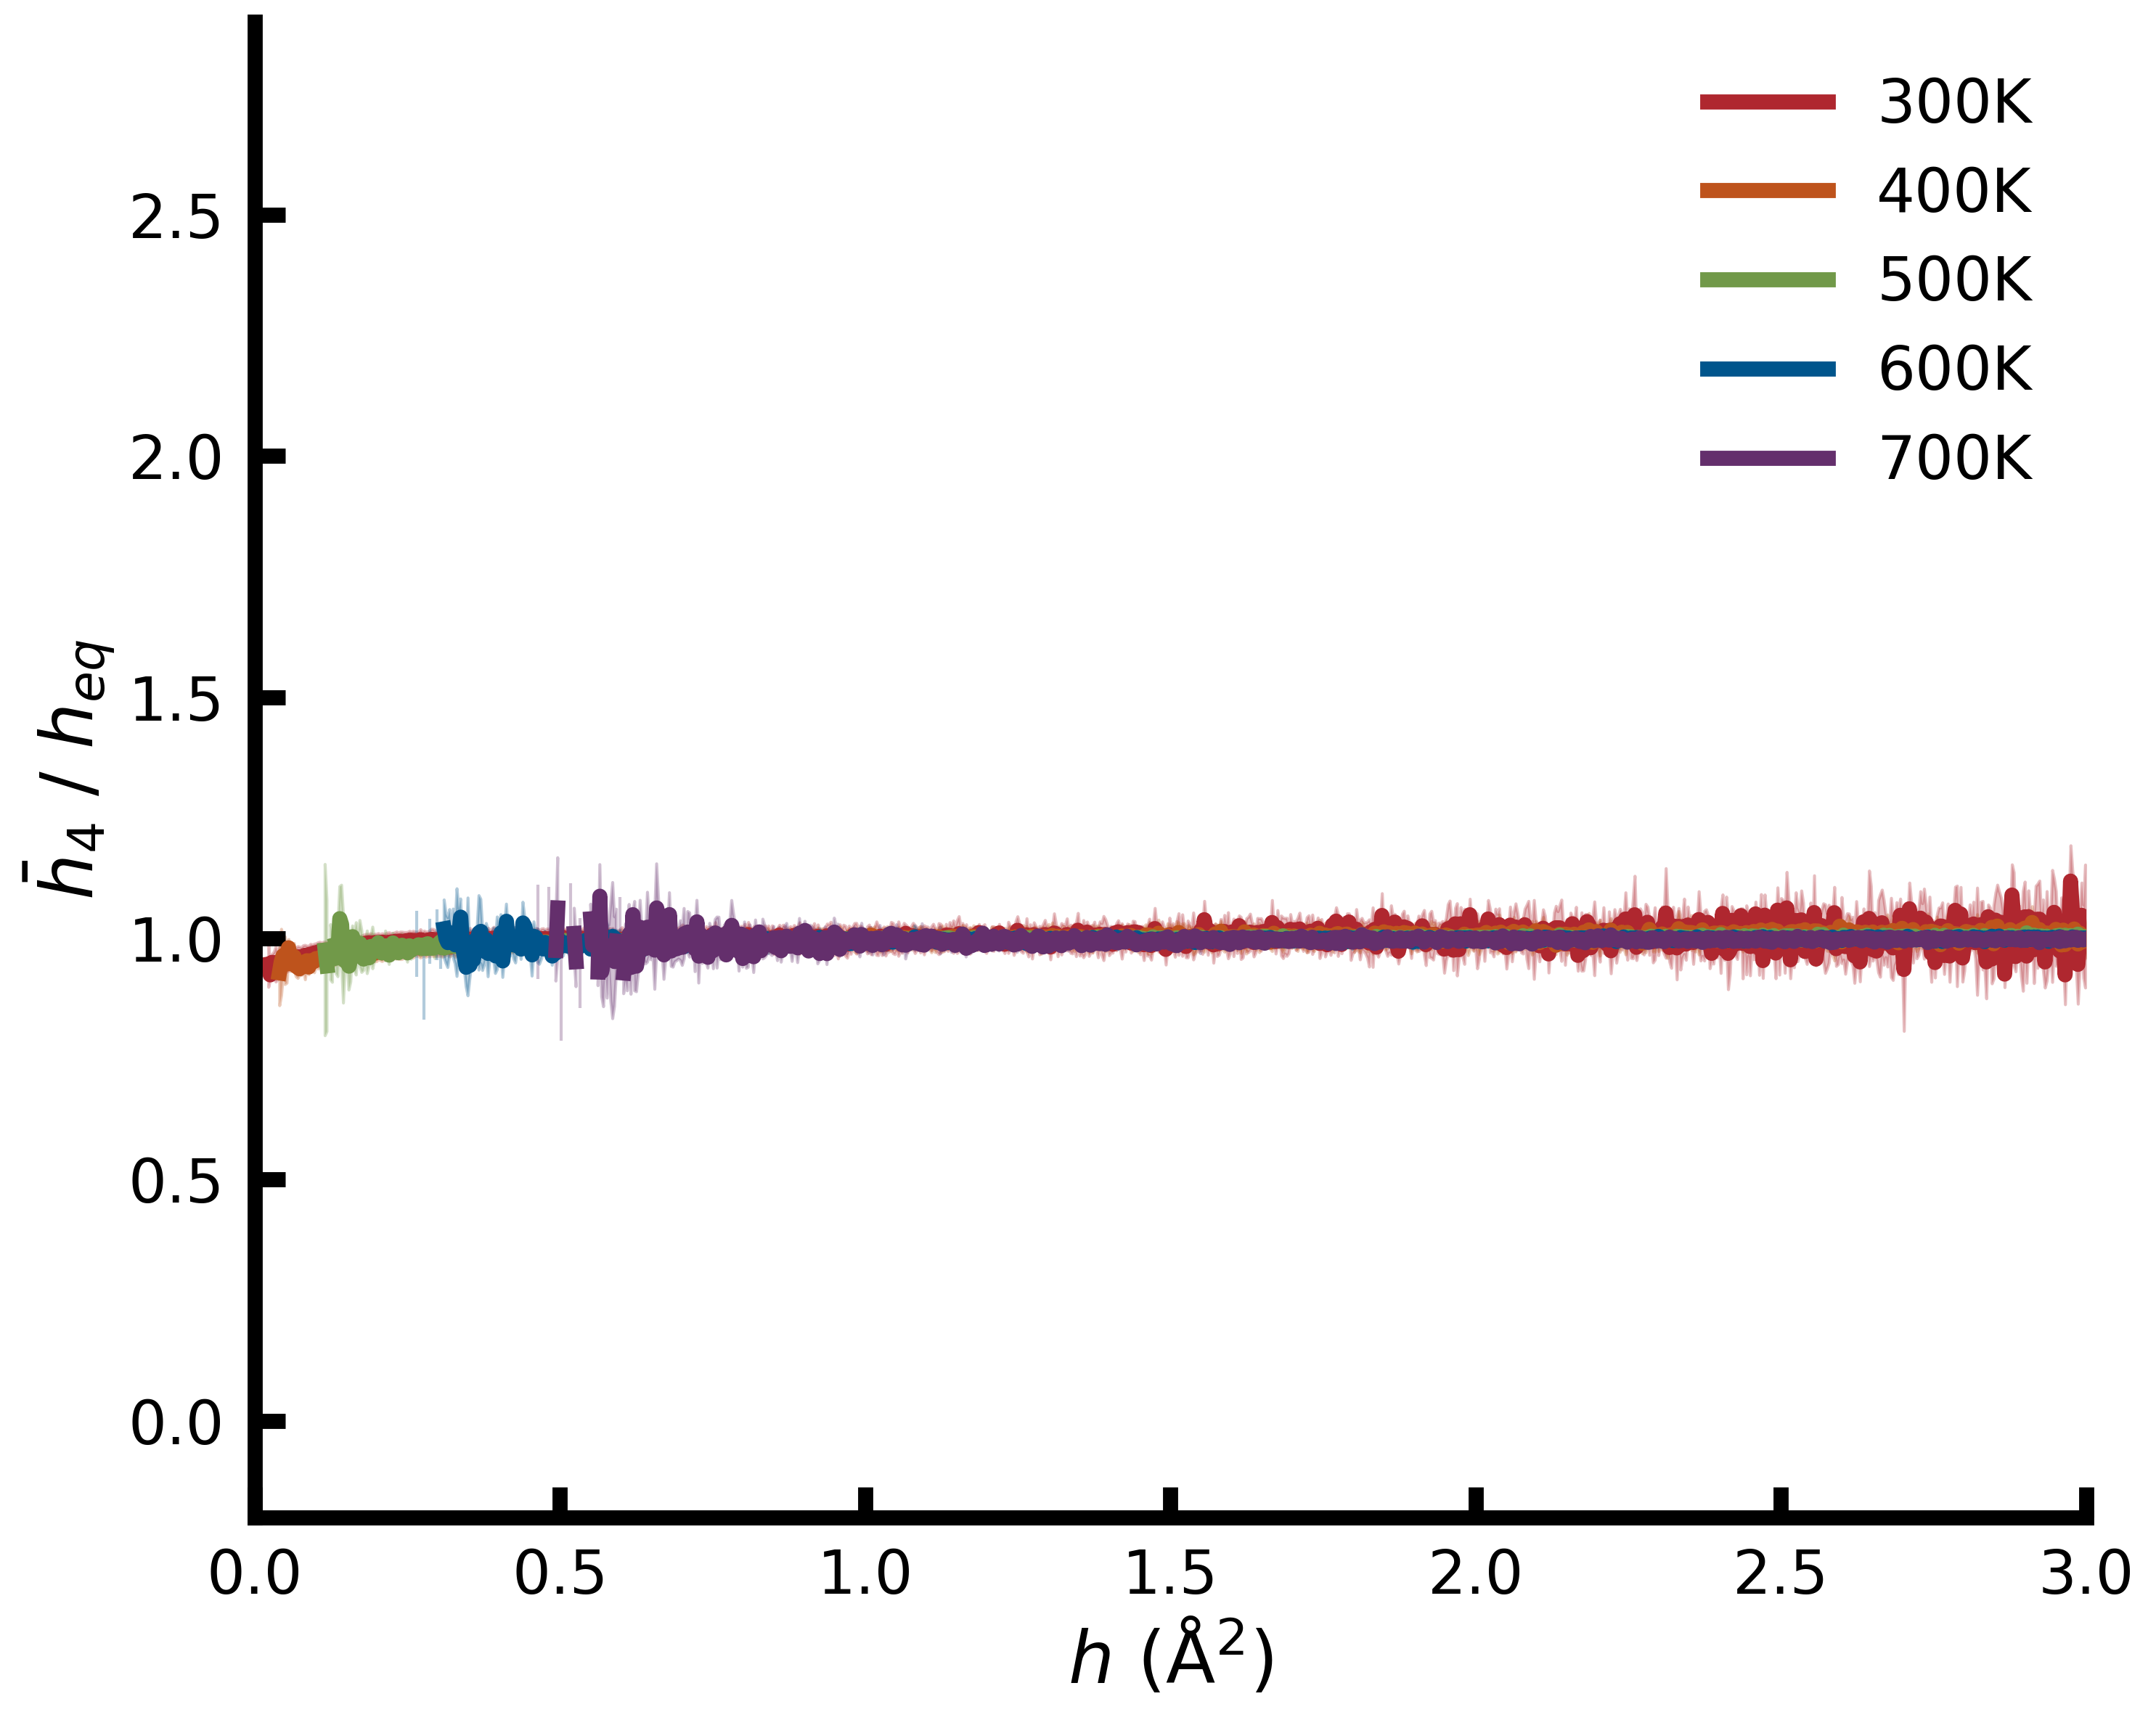

In [34]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 5,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$h$ (Å$^2$)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$\bar{h}_{4}$ / $h_{eq}$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/shell.out")
        data.append(temp)
        h.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/hop.out")[:,1:].mean())
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)
    heq = np.stack(h).mean()

    ax.plot(avg[:,0], avg[:,5] / heq, linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)
    ax.fill_between(avg[:,0], (avg[:,5] + std[:,5]) / heq, (avg[:,5] - std[:,5]) / heq, color = COLORMAP[list(COLORMAP.keys())[idx]], alpha = 0.3)

ax.set_xlim(0, 3)
ax.set_ylim(-0.2, 2.9)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("shell_hop_n4.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# Survival Probability

/tmp/ipykernel_974637/3775124532.py:13: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


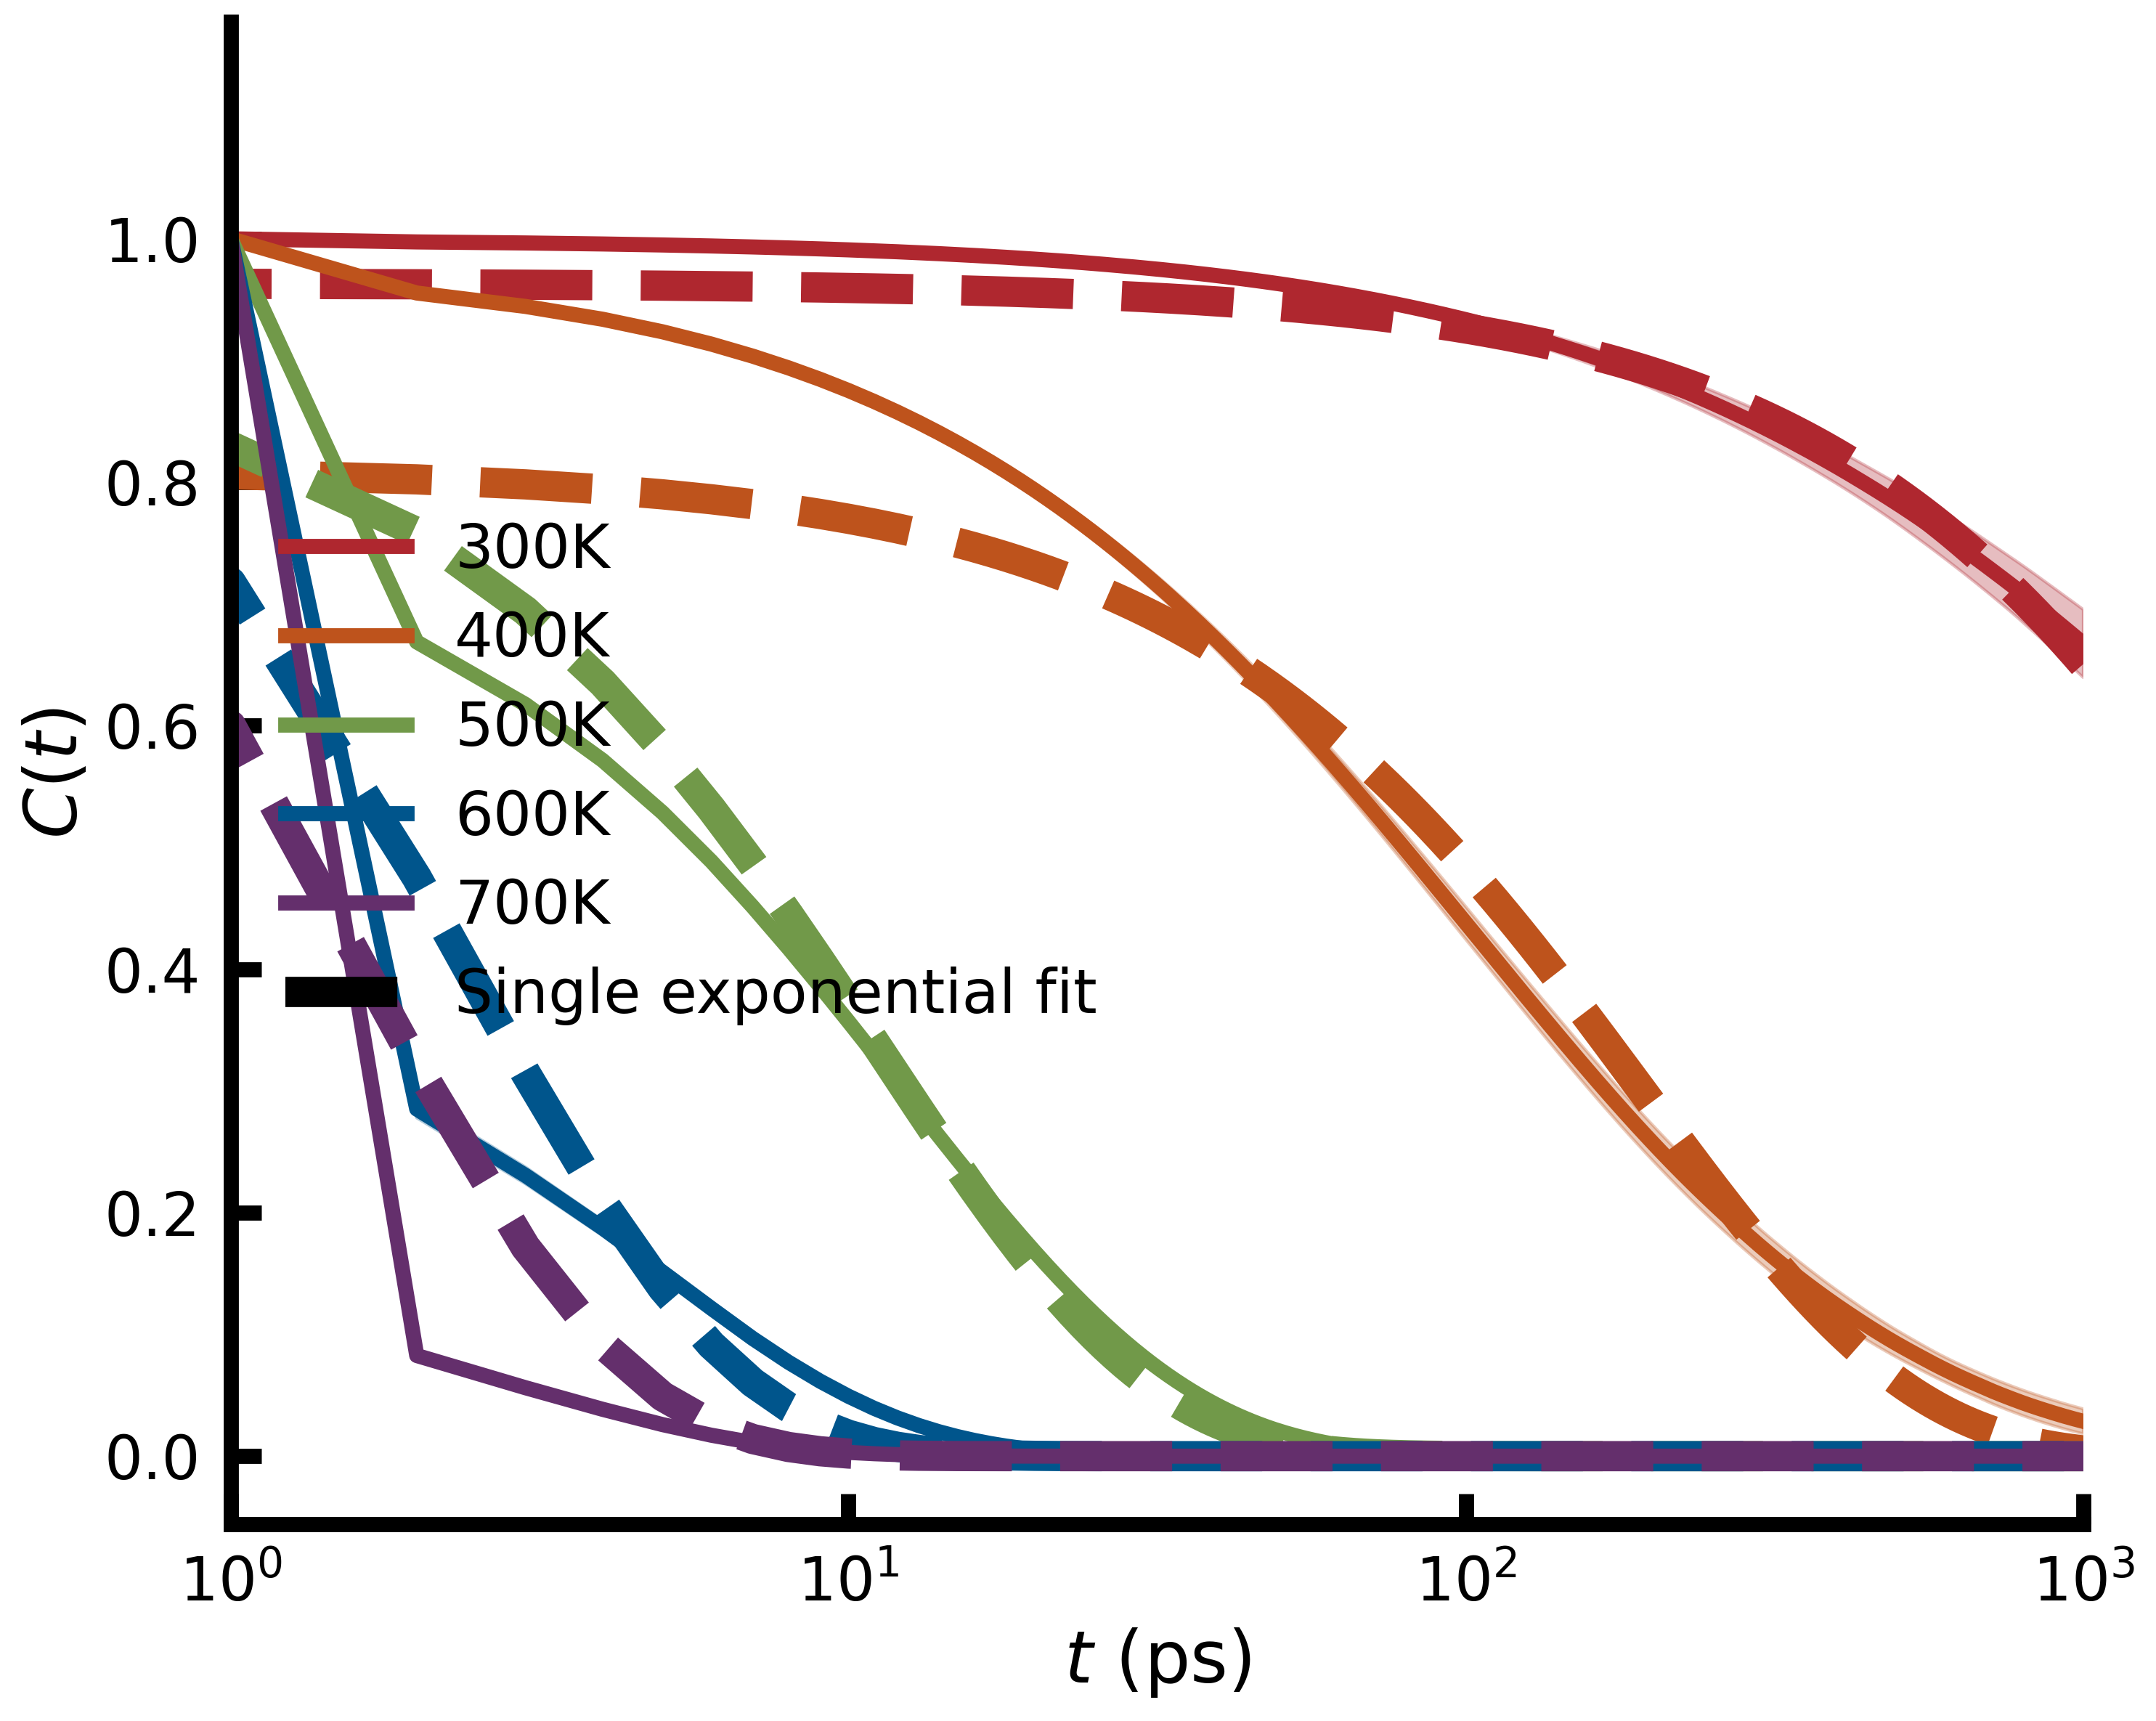

In [35]:
from scipy.optimize import curve_fit

params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 5,
}

def single_exponential(x, a, b):
    return a * np.exp(-b * x)

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$t$ (ps)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$C(t)$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/survival.out")
        data.append(temp)
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = COLORMAP[list(COLORMAP.keys())[idx]], alpha = 0.3)

    popt, pcov = curve_fit(single_exponential, avg[:,0], avg[:,1])
    ax.plot(avg[:,0], single_exponential(avg[:,0], *popt), linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[idx]], linewidth = params['linewidth'] * 2)

ax.set_xscale('log')
ax.set_xlim(1, 1E3)

ax.plot(0, 0, linestyle = '--', color = 'k', linewidth = 2 * params['linewidth'], label = "Single exponential fit")

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("survival_single.png", dpi = 300, bbox_inches = 'tight')
plt.show()

/tmp/ipykernel_974637/3861193273.py:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c * np.exp(-d * x)


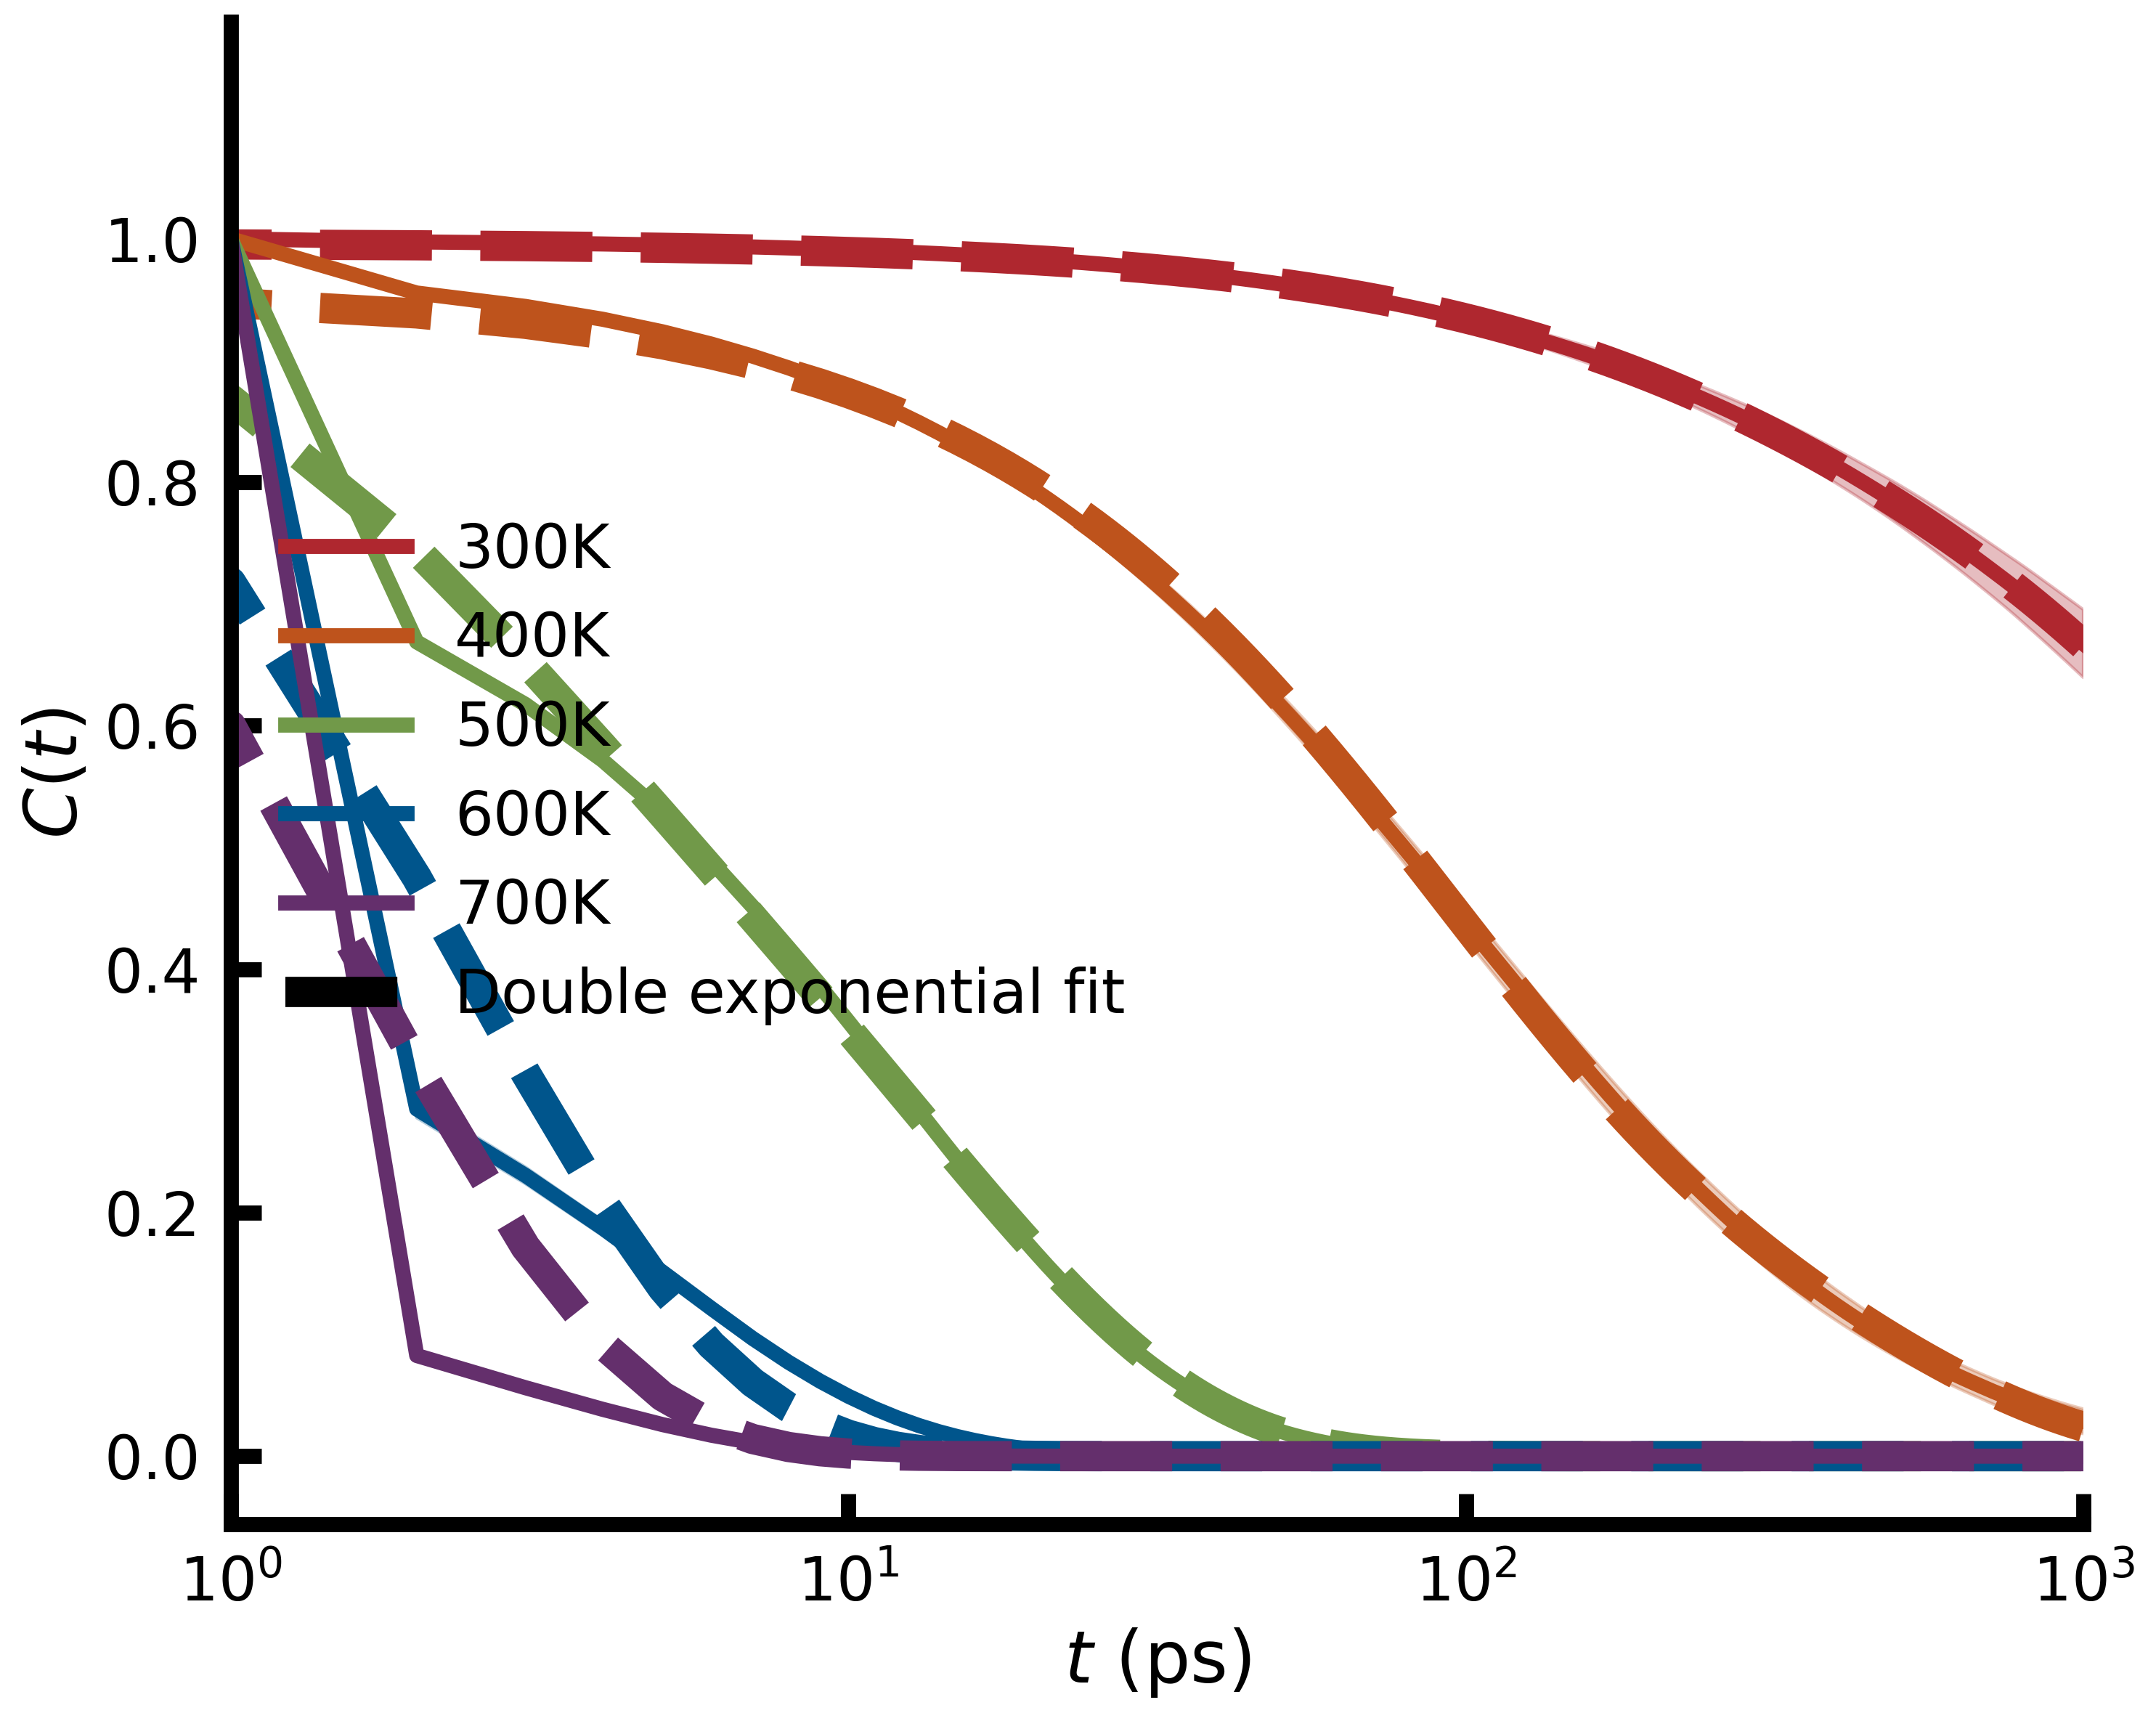

In [36]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 5,
}

def double_exponential(x, a, b, c, d):
    return a * np.exp(-b * x) + c * np.exp(-d * x)

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$t$ (ps)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$C(t)$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/survival.out")
        data.append(temp)
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[idx]], label = t)
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = COLORMAP[list(COLORMAP.keys())[idx]], alpha = 0.3)

    popt, pcov = curve_fit(double_exponential, avg[:,0], avg[:,1])
    ax.plot(avg[:,0], double_exponential(avg[:,0], *popt), linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[idx]], linewidth = params['linewidth'] * 2)

ax.set_xscale('log')
ax.set_xlim(1, 1E3)

ax.plot(0, 0, linestyle = '--', color = 'k', linewidth = 2 * params['linewidth'], label = "Double exponential fit")

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("survival_double.png", dpi = 300, bbox_inches = 'tight')
plt.show()

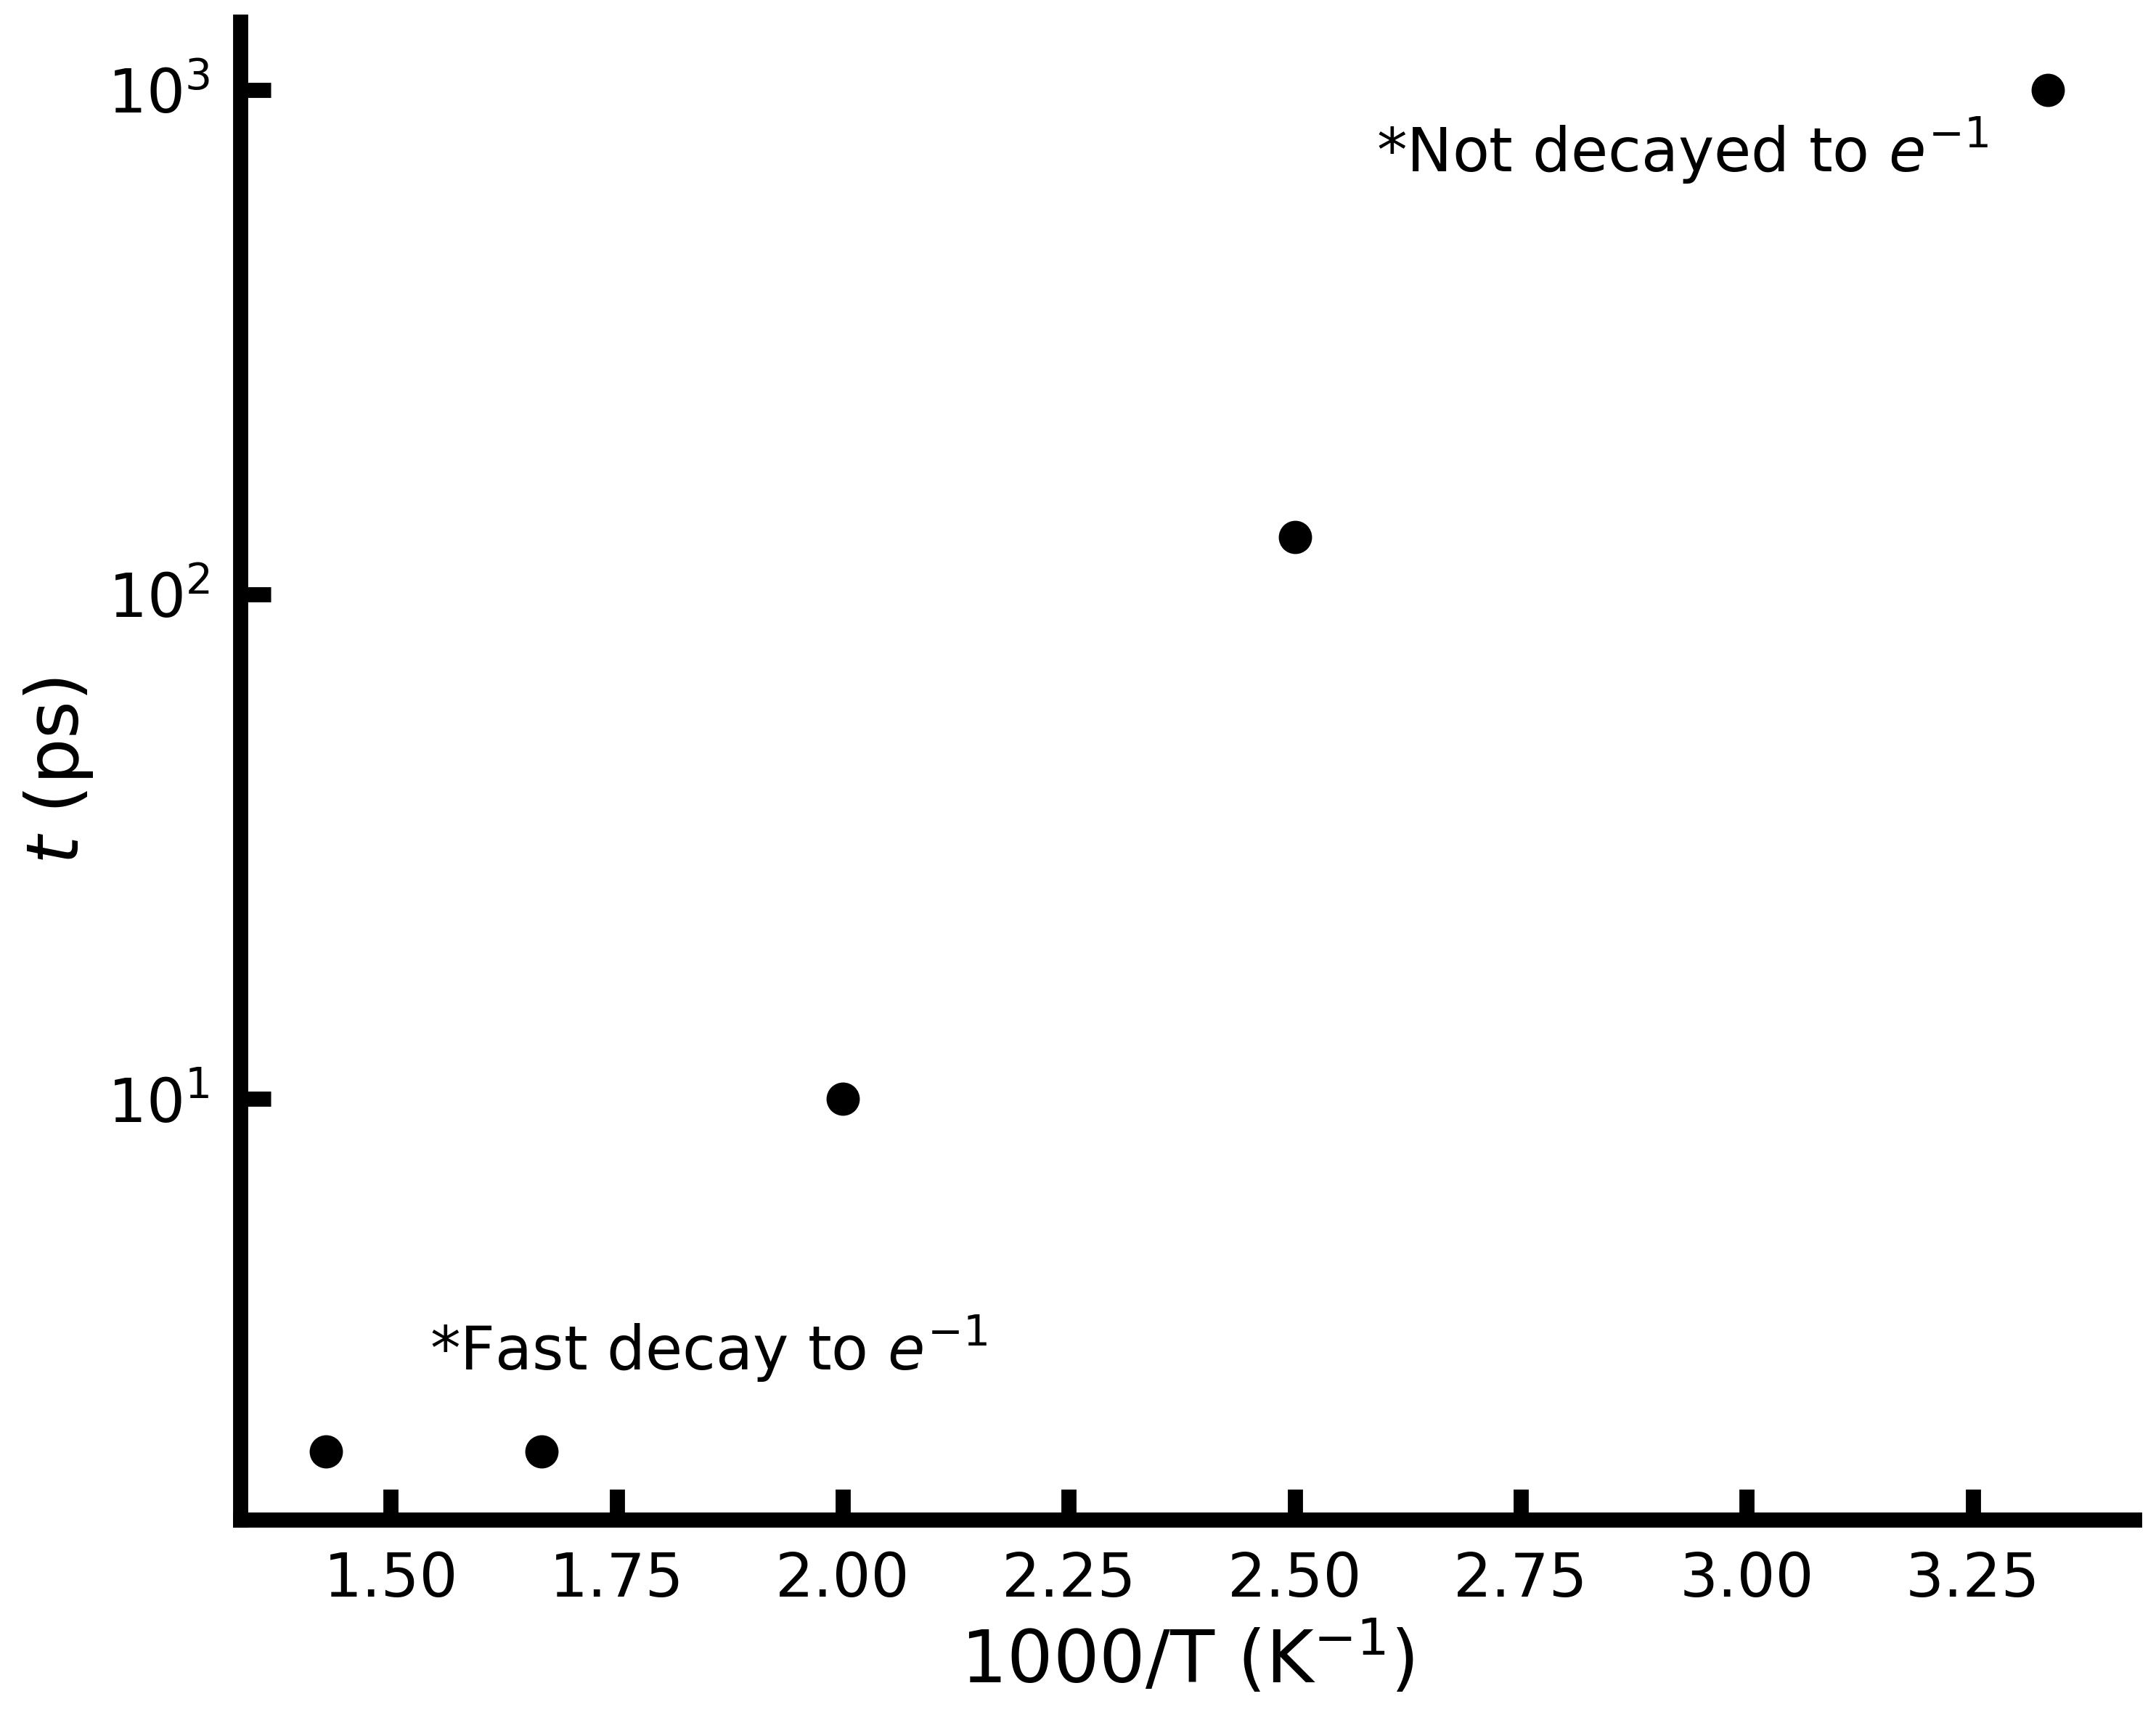

In [37]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 20,
    "axes_labelsize" : 24,
    "tick_padding" : 10,
    "markersize" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_ylabel("$t$ (ps)", fontsize = params['axes_labelsize'])
ax.set_xlabel(r"1000/T (K$^{-1}$)", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
critical = {
    'temp' : [], 'time' : [],
}
for idx, t in enumerate(["300K", "400K", "500K", "600K", "700K"]):
    data = []
    h = []
    for e in "00", "01", "02", "03":
        temp = np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/survival.out")
        data.append(temp)
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    critical['temp'].append(1000 / int(t[:-1]))
    critical['time'].append(avg[(np.abs(avg[:,1] - np.exp(-1))).argmin(),0])

ax.plot(critical['temp'], critical['time'], marker = 'o', markersize = params['markersize'], linestyle = 'None', color = 'k')
ax.annotate("*Not decayed to $e^{-1}$", xy = (0.6, 0.9), xycoords = 'axes fraction', fontsize = params['tick_labelsize'])
ax.annotate("*Fast decay to $e^{-1}$", xy = (0.1, 0.1), xycoords = 'axes fraction', fontsize = params['tick_labelsize'])

ax.set_yscale('log')
# legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
# legend.get_title().set_fontsize(params['axes_labelsize'])

plt.tight_layout()
plt.savefig("survival_temperature.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# Pair Distribution Function - Li

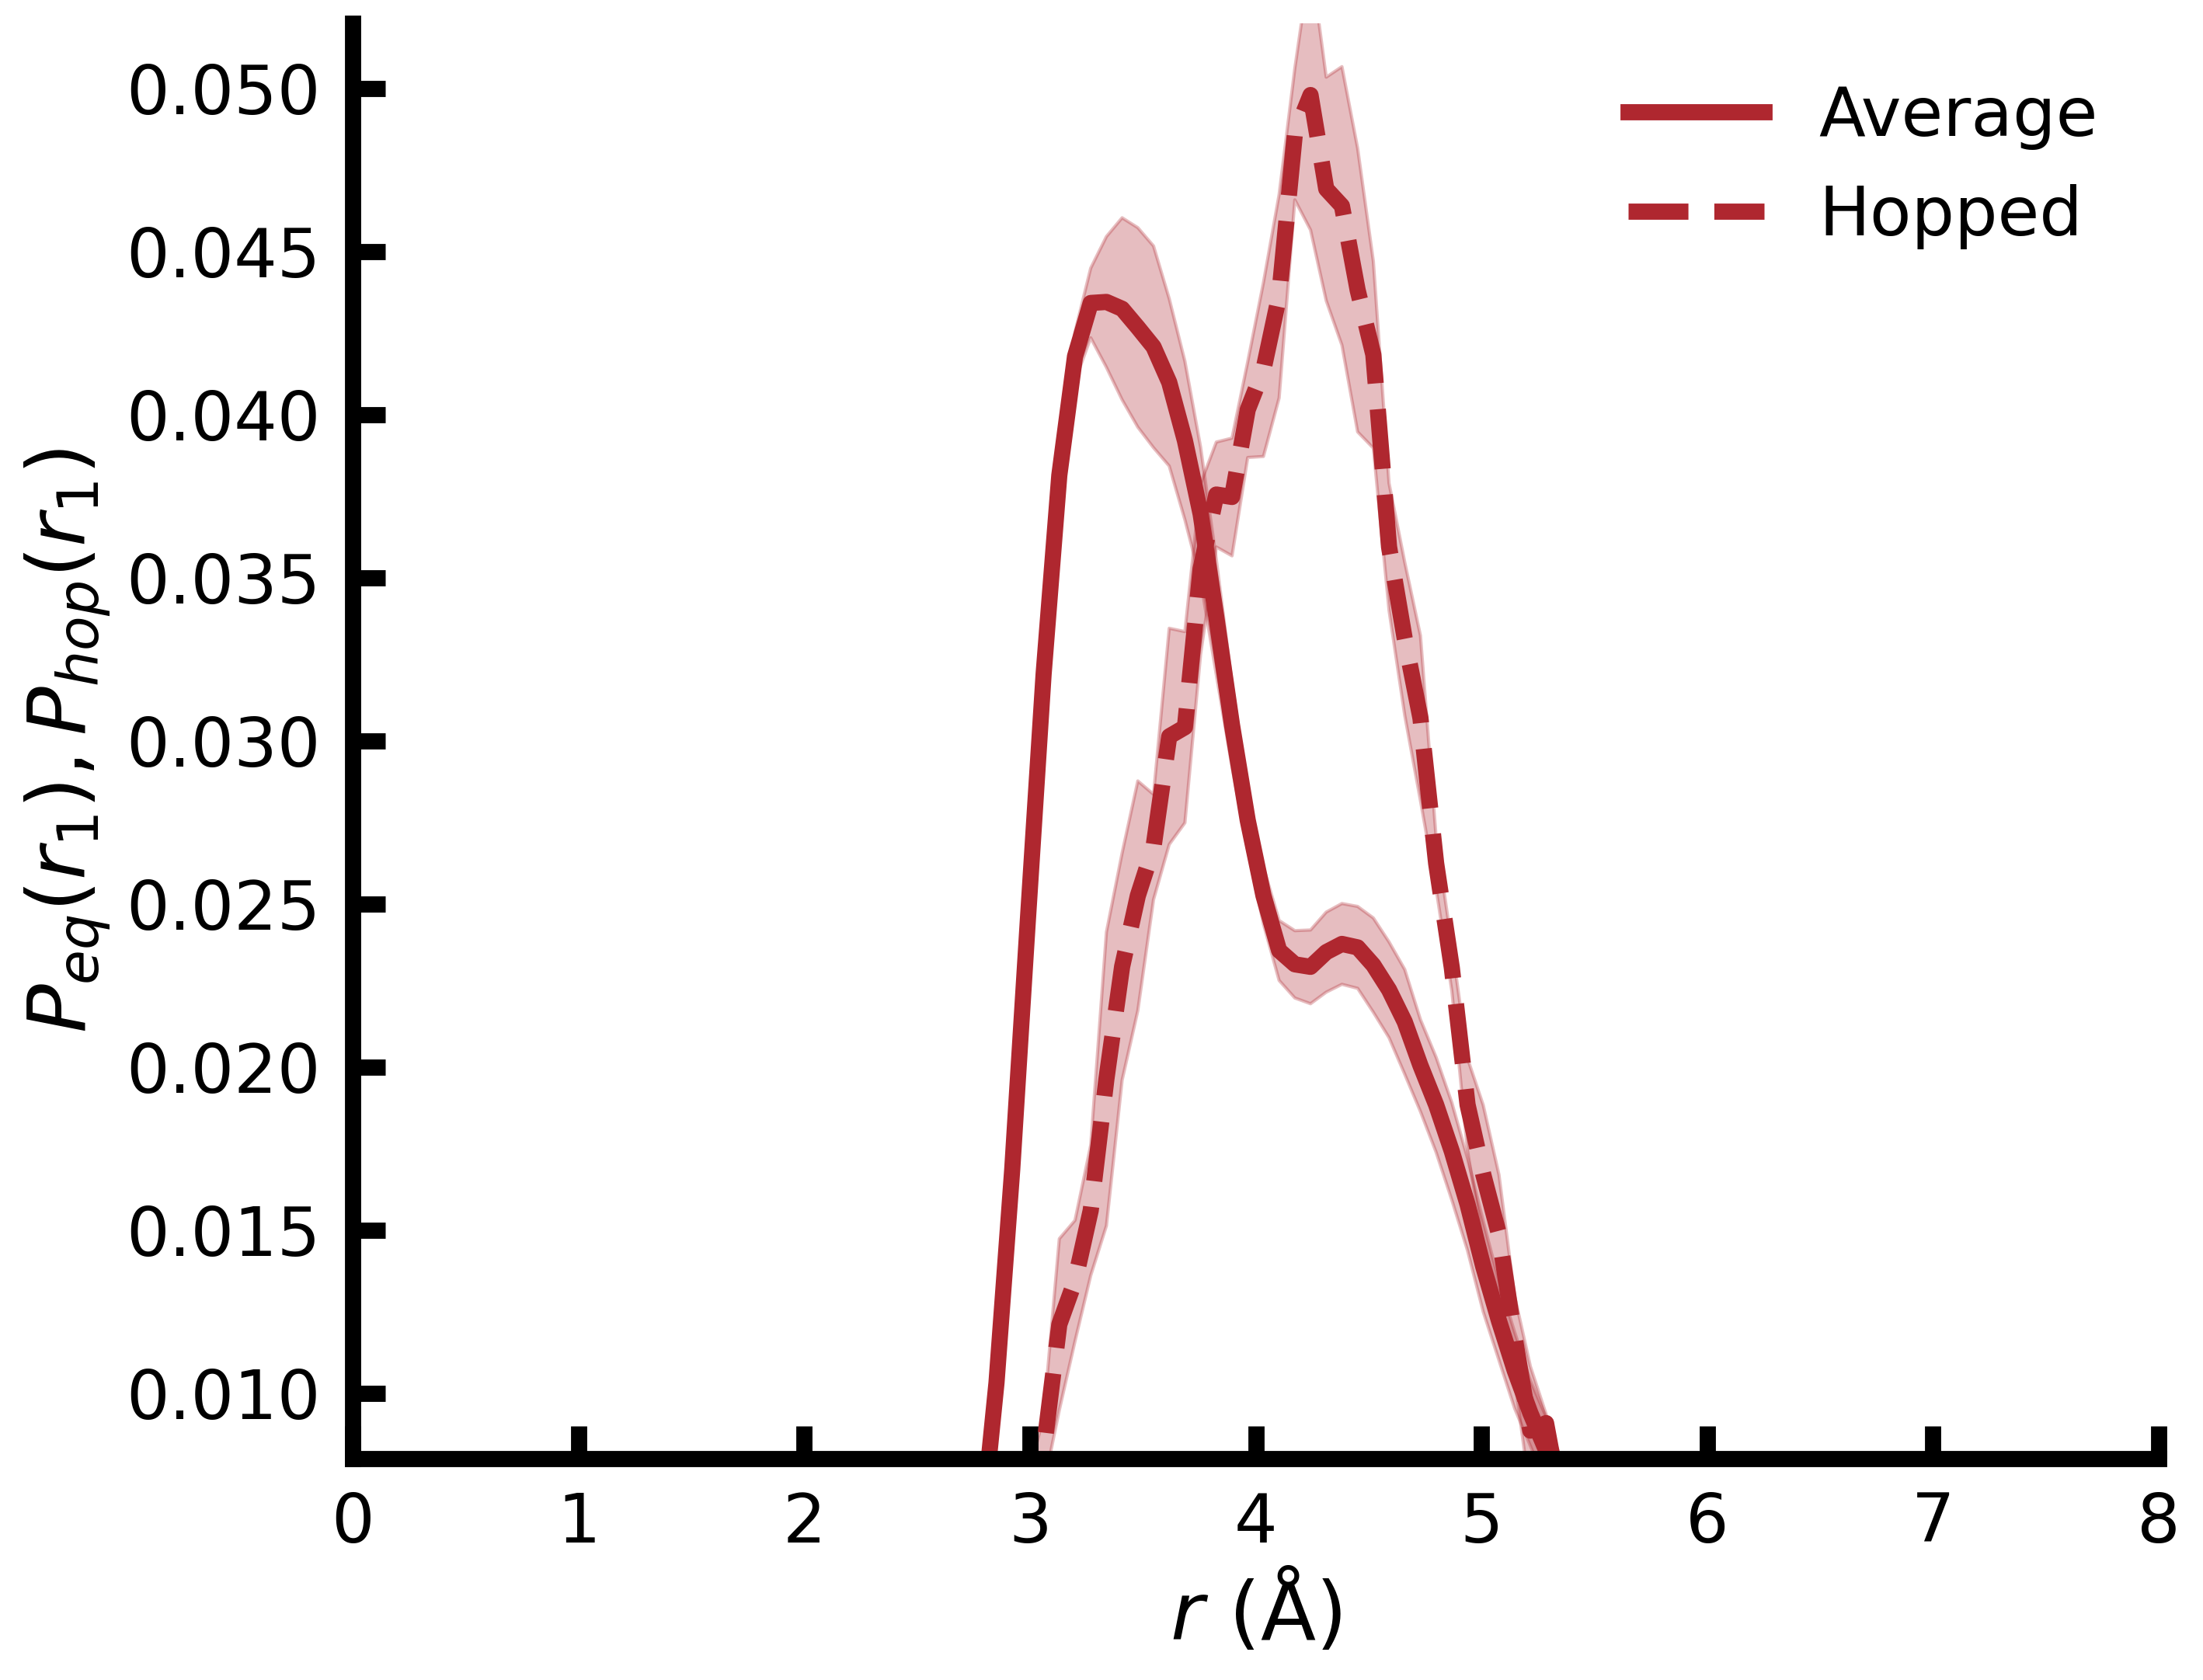

In [38]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 21,
    "axes_labelsize" : 25,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P_{eq}(r_{1}), P_{hop}(r_{1})$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/PDF_neighbor.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    """
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = 'k', label = "total")
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = 'k', alpha = 0.3)
    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], linestyle = '--', color = 'k')
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = 'k', alpha = 0.3)
    """

    ax.plot(avg[:,0], avg[:,3], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[0]], label = "Average")
    ax.fill_between(avg[:,0], avg[:,3] + std[:,3], avg[:,3] - std[:,3], color = COLORMAP[list(COLORMAP.keys())[0]], alpha = 0.3)
    ax.plot(avg[:,0], avg[:,4], linewidth = params['linewidth'], linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[0]], label = "Hopped")
    ax.fill_between(avg[:,0], avg[:,4] + std[:,4], avg[:,4] - std[:,4], color = COLORMAP[list(COLORMAP.keys())[0]], alpha = 0.3)

ax.set_xlim(0, 8)
ax.set_ylim(0.008, 0.052)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("PDF_neighbor_n1.png", dpi = 300, bbox_inches = 'tight')
plt.show()

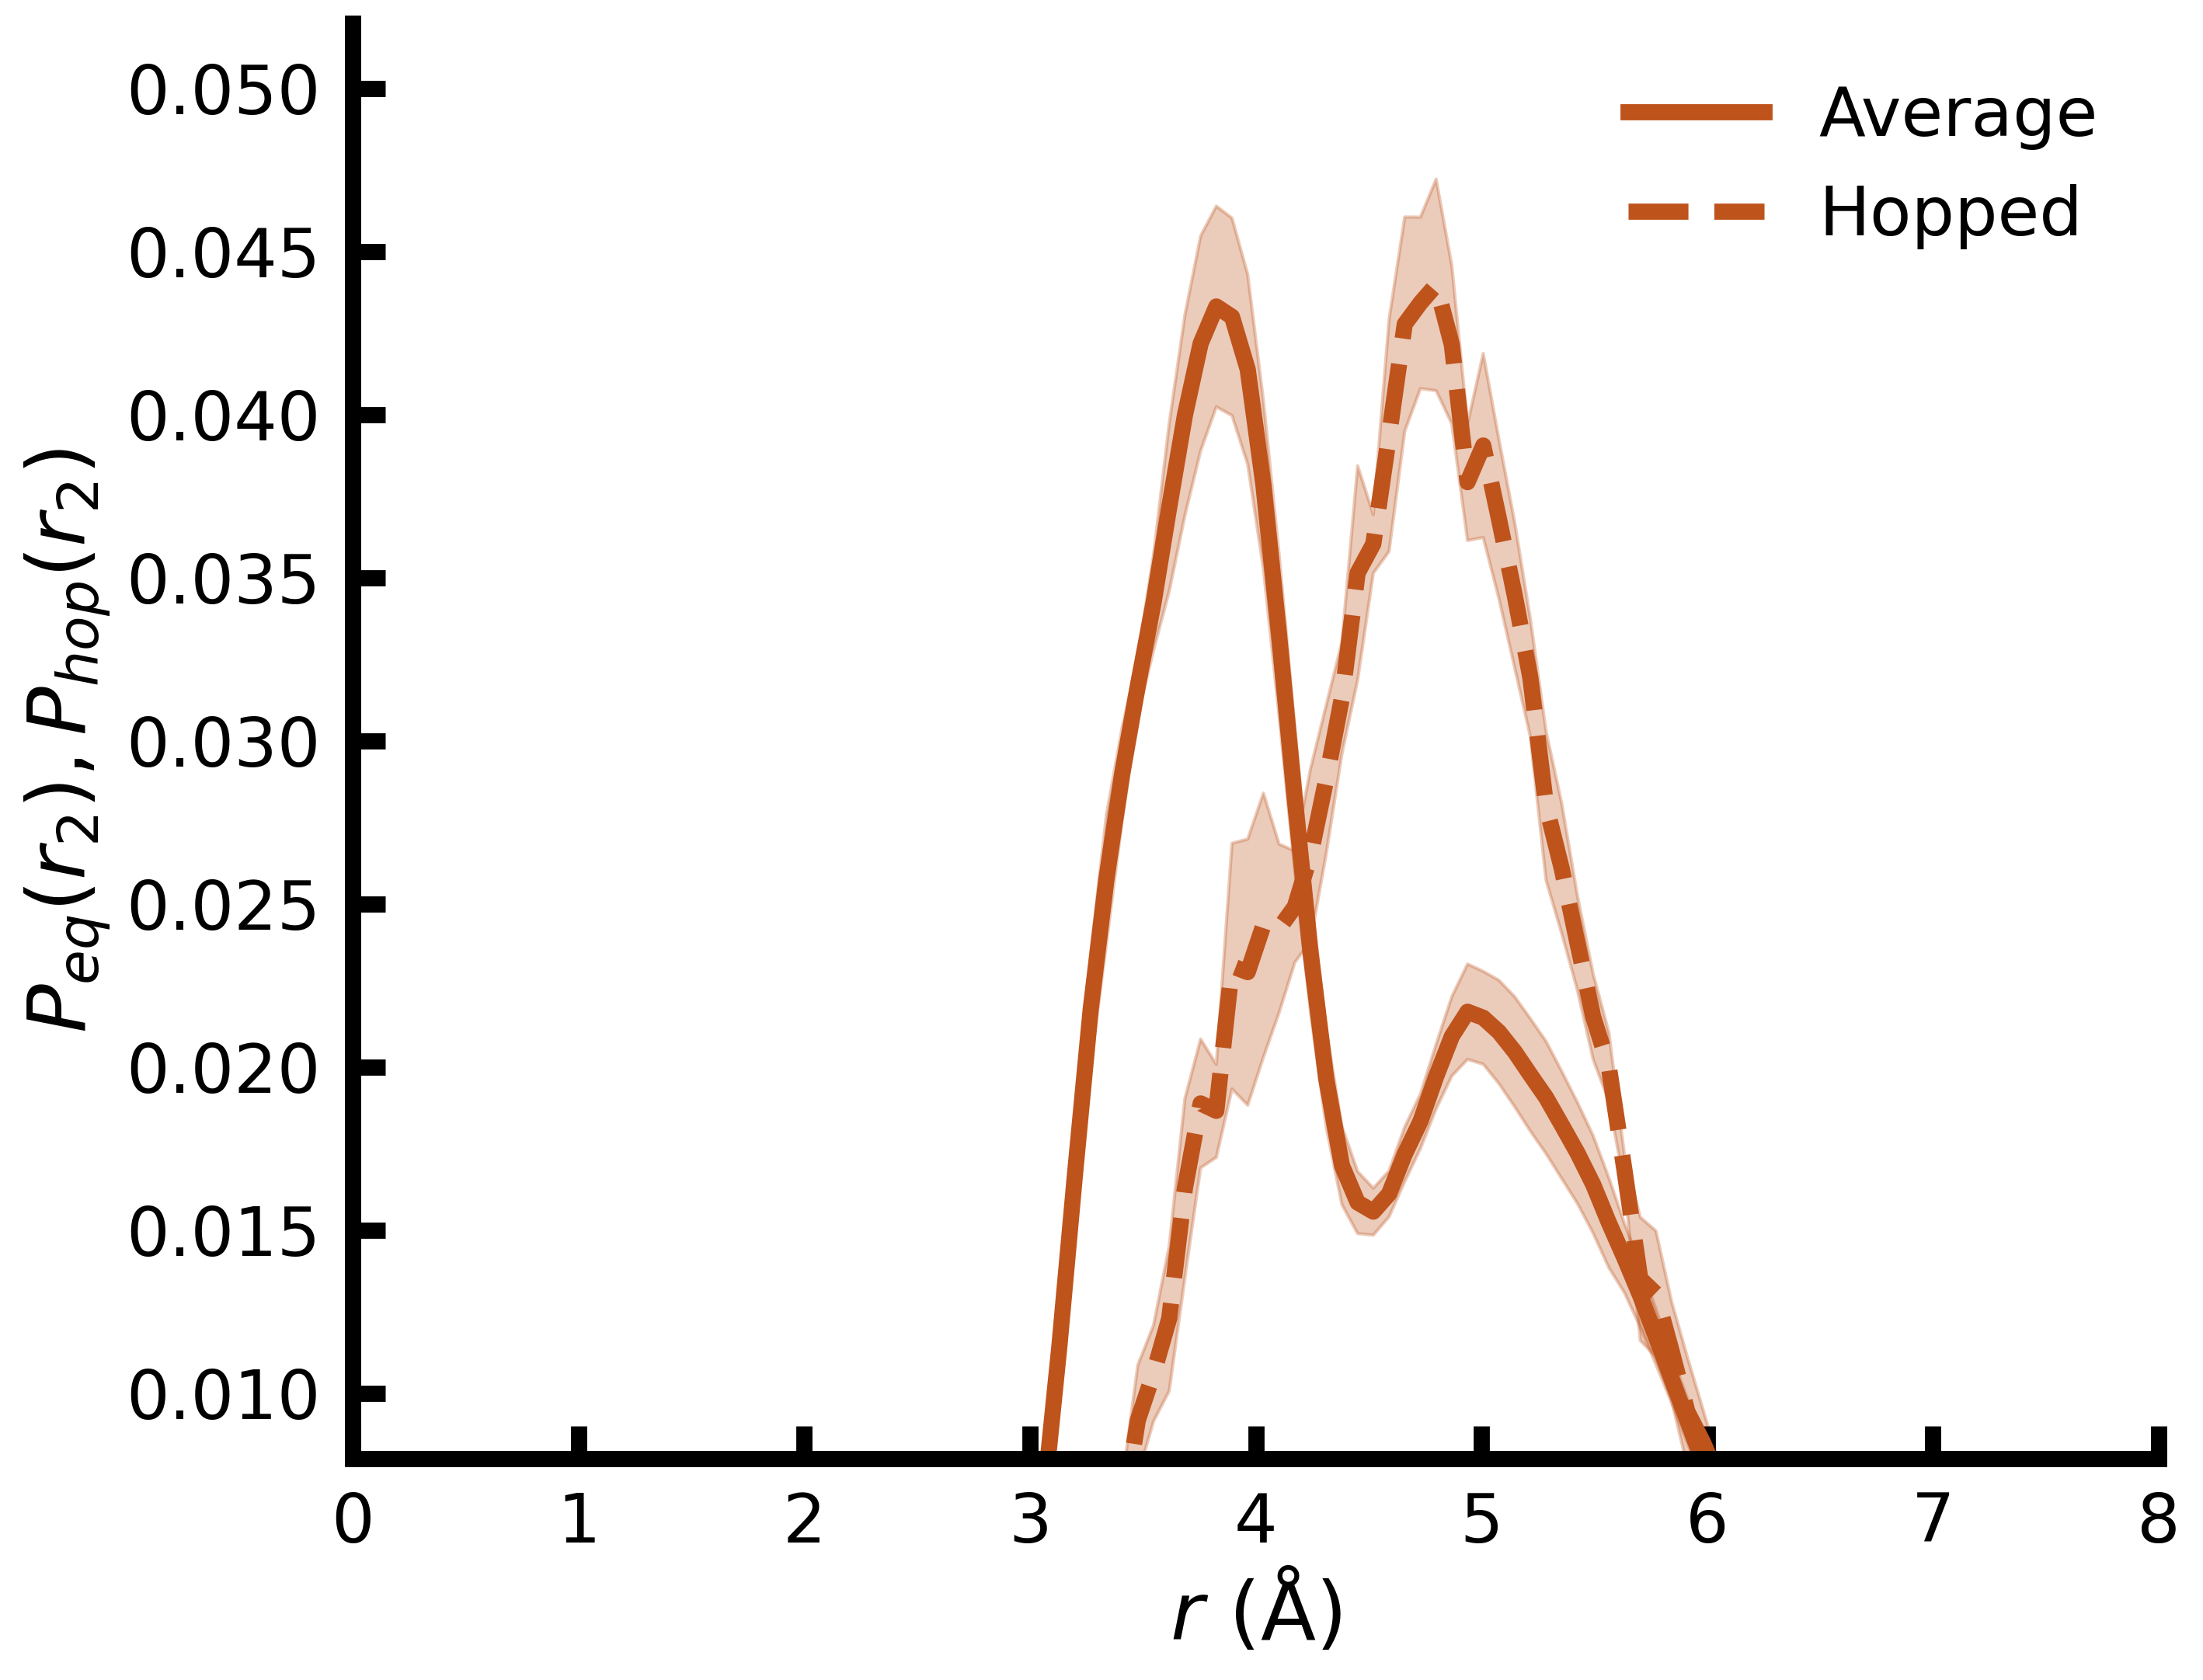

In [39]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 21,
    "axes_labelsize" : 25,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P_{eq}(r_{2}), P_{hop}(r_{2})$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/PDF_neighbor.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    """
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = 'k', label = "total")
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = 'k', alpha = 0.3)
    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], linestyle = '--', color = 'k')
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = 'k', alpha = 0.3)
    """

    ax.plot(avg[:,0], avg[:,5], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[1]], label = "Average")
    ax.fill_between(avg[:,0], avg[:,5] + std[:,5], avg[:,5] - std[:,5], color = COLORMAP[list(COLORMAP.keys())[1]], alpha = 0.3)
    ax.plot(avg[:,0], avg[:,6], linewidth = params['linewidth'], linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[1]], label = "Hopped")
    ax.fill_between(avg[:,0], avg[:,6] + std[:,6], avg[:,6] - std[:,6], color = COLORMAP[list(COLORMAP.keys())[1]], alpha = 0.3)

ax.set_xlim(0, 8)
ax.set_ylim(0.008, 0.052)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("PDF_neighbor_n2.png", dpi = 300, bbox_inches = 'tight')
plt.show()

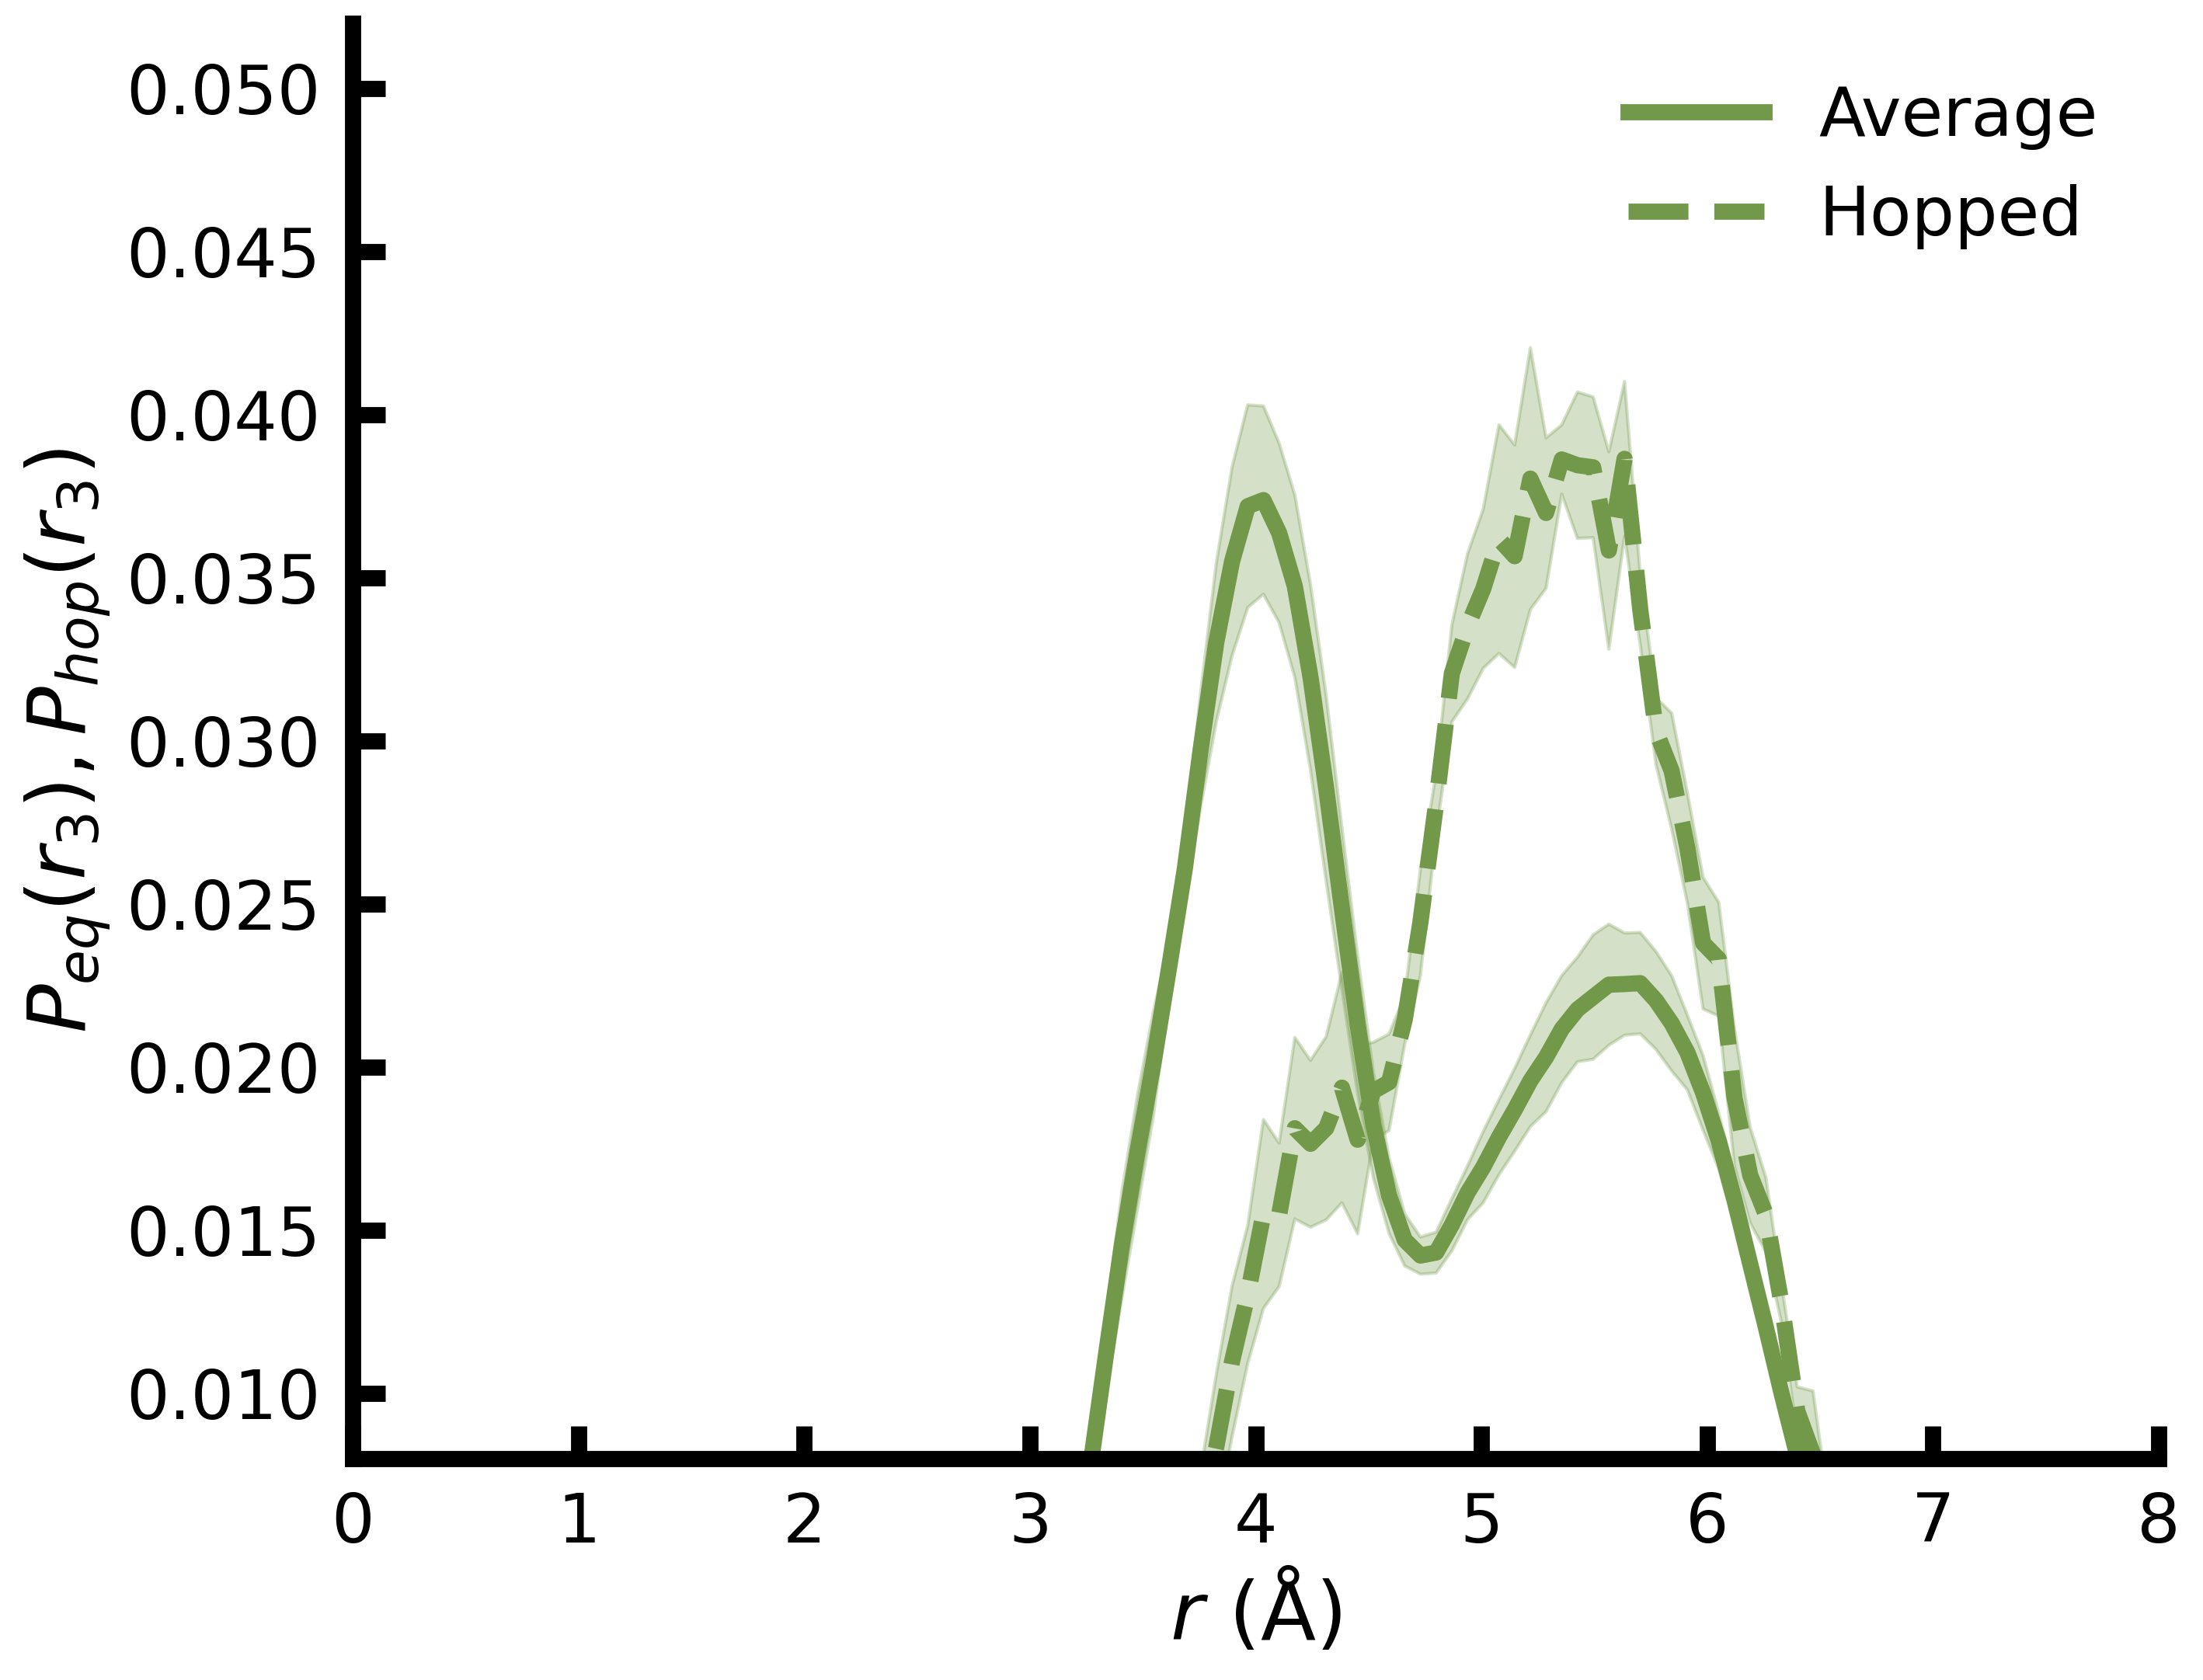

In [40]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 21,
    "axes_labelsize" : 25,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P_{eq}(r_{3}), P_{hop}(r_{3})$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/PDF_neighbor.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    """
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = 'k', label = "total")
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = 'k', alpha = 0.3)
    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], linestyle = '--', color = 'k')
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = 'k', alpha = 0.3)
    """

    ax.plot(avg[:,0], avg[:,7], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[2]], label = "Average")
    ax.fill_between(avg[:,0], avg[:,7] + std[:,7], avg[:,7] - std[:,7], color = COLORMAP[list(COLORMAP.keys())[2]], alpha = 0.3)
    ax.plot(avg[:,0], avg[:,8], linewidth = params['linewidth'], linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[2]], label = "Hopped")
    ax.fill_between(avg[:,0], avg[:,8] + std[:,8], avg[:,8] - std[:,8], color = COLORMAP[list(COLORMAP.keys())[2]], alpha = 0.3)

ax.set_xlim(0, 8)
ax.set_ylim(0.008, 0.052)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("PDF_neighbor_n3.png", dpi = 300, bbox_inches = 'tight')
plt.show()

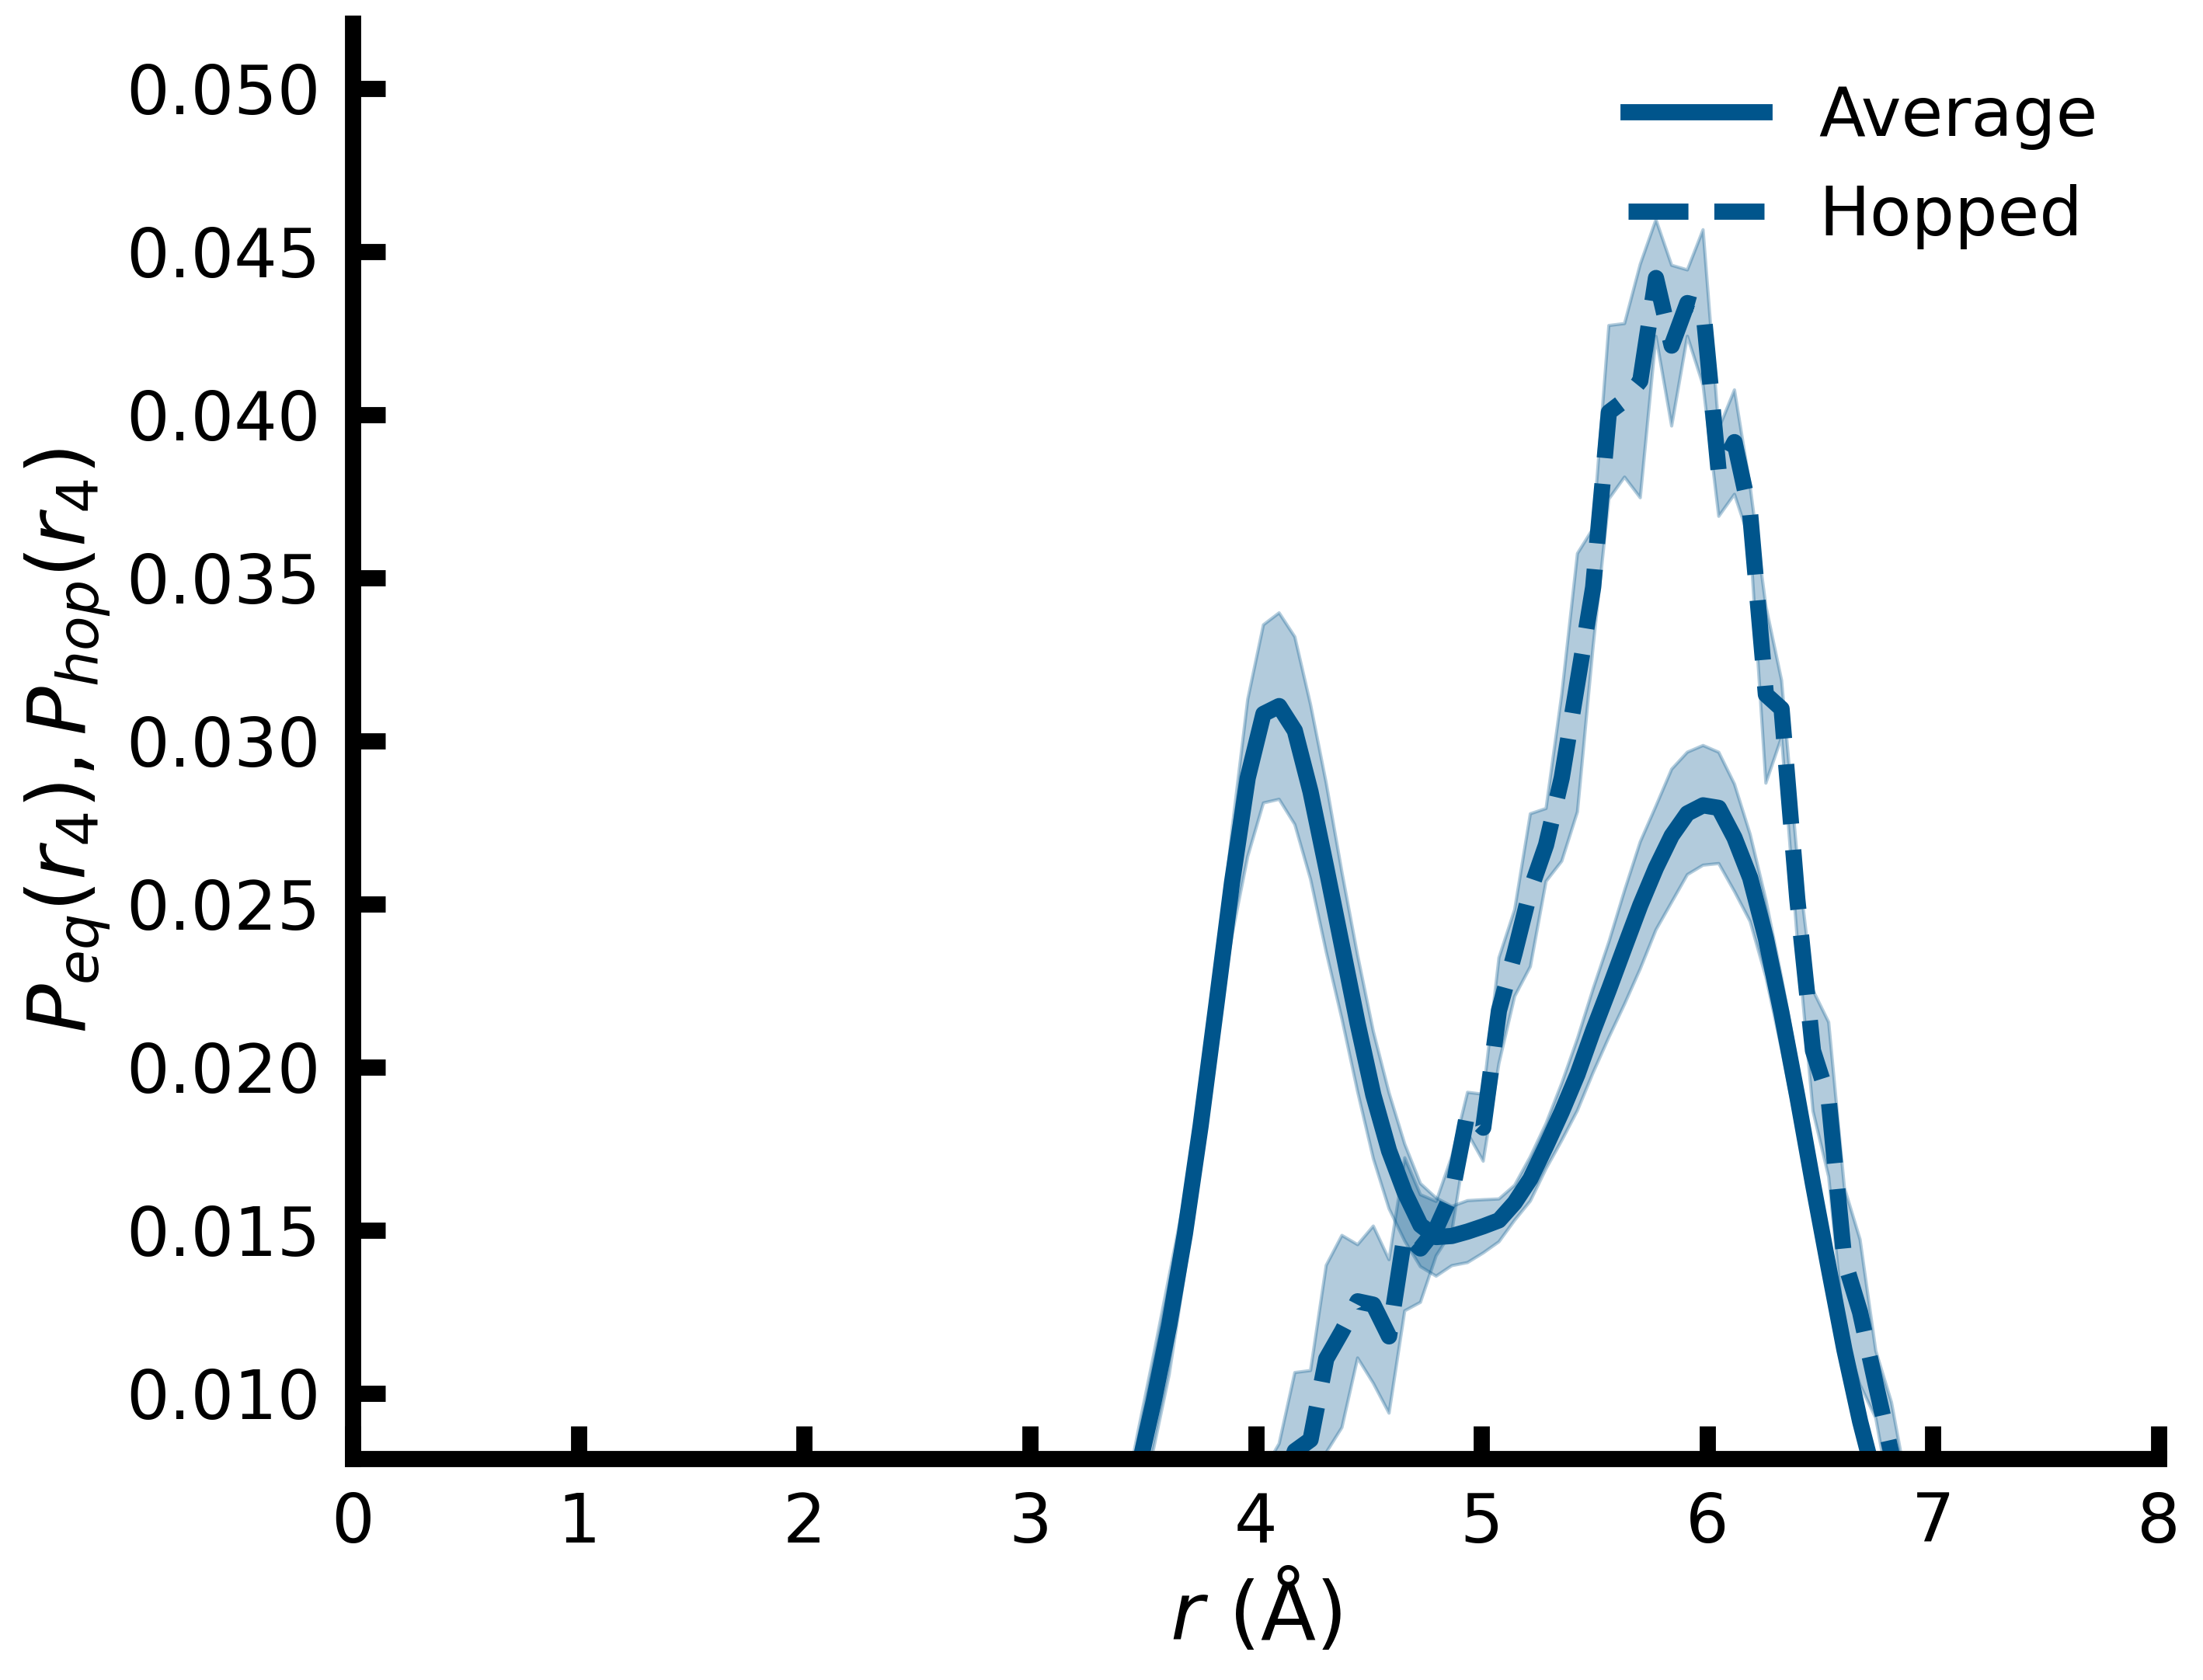

In [41]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 21,
    "axes_labelsize" : 25,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P_{eq}(r_{4}), P_{hop}(r_{4})$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/PDF_neighbor.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    """
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = 'k', label = "total")
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = 'k', alpha = 0.3)
    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], linestyle = '--', color = 'k')
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = 'k', alpha = 0.3)
    """

    ax.plot(avg[:,0], avg[:,9], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[3]], label = "Average")
    ax.fill_between(avg[:,0], avg[:,9] + std[:,9], avg[:,9] - std[:,9], color = COLORMAP[list(COLORMAP.keys())[3]], alpha = 0.3)
    ax.plot(avg[:,0], avg[:,10], linewidth = params['linewidth'], linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[3]], label = "Hopped")
    ax.fill_between(avg[:,0], avg[:,10] + std[:,10], avg[:,10] - std[:,10], color = COLORMAP[list(COLORMAP.keys())[3]], alpha = 0.3)

ax.set_xlim(0, 8)
ax.set_ylim(0.008, 0.052)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("PDF_neighbor_n4.png", dpi = 300, bbox_inches = 'tight')
plt.show()

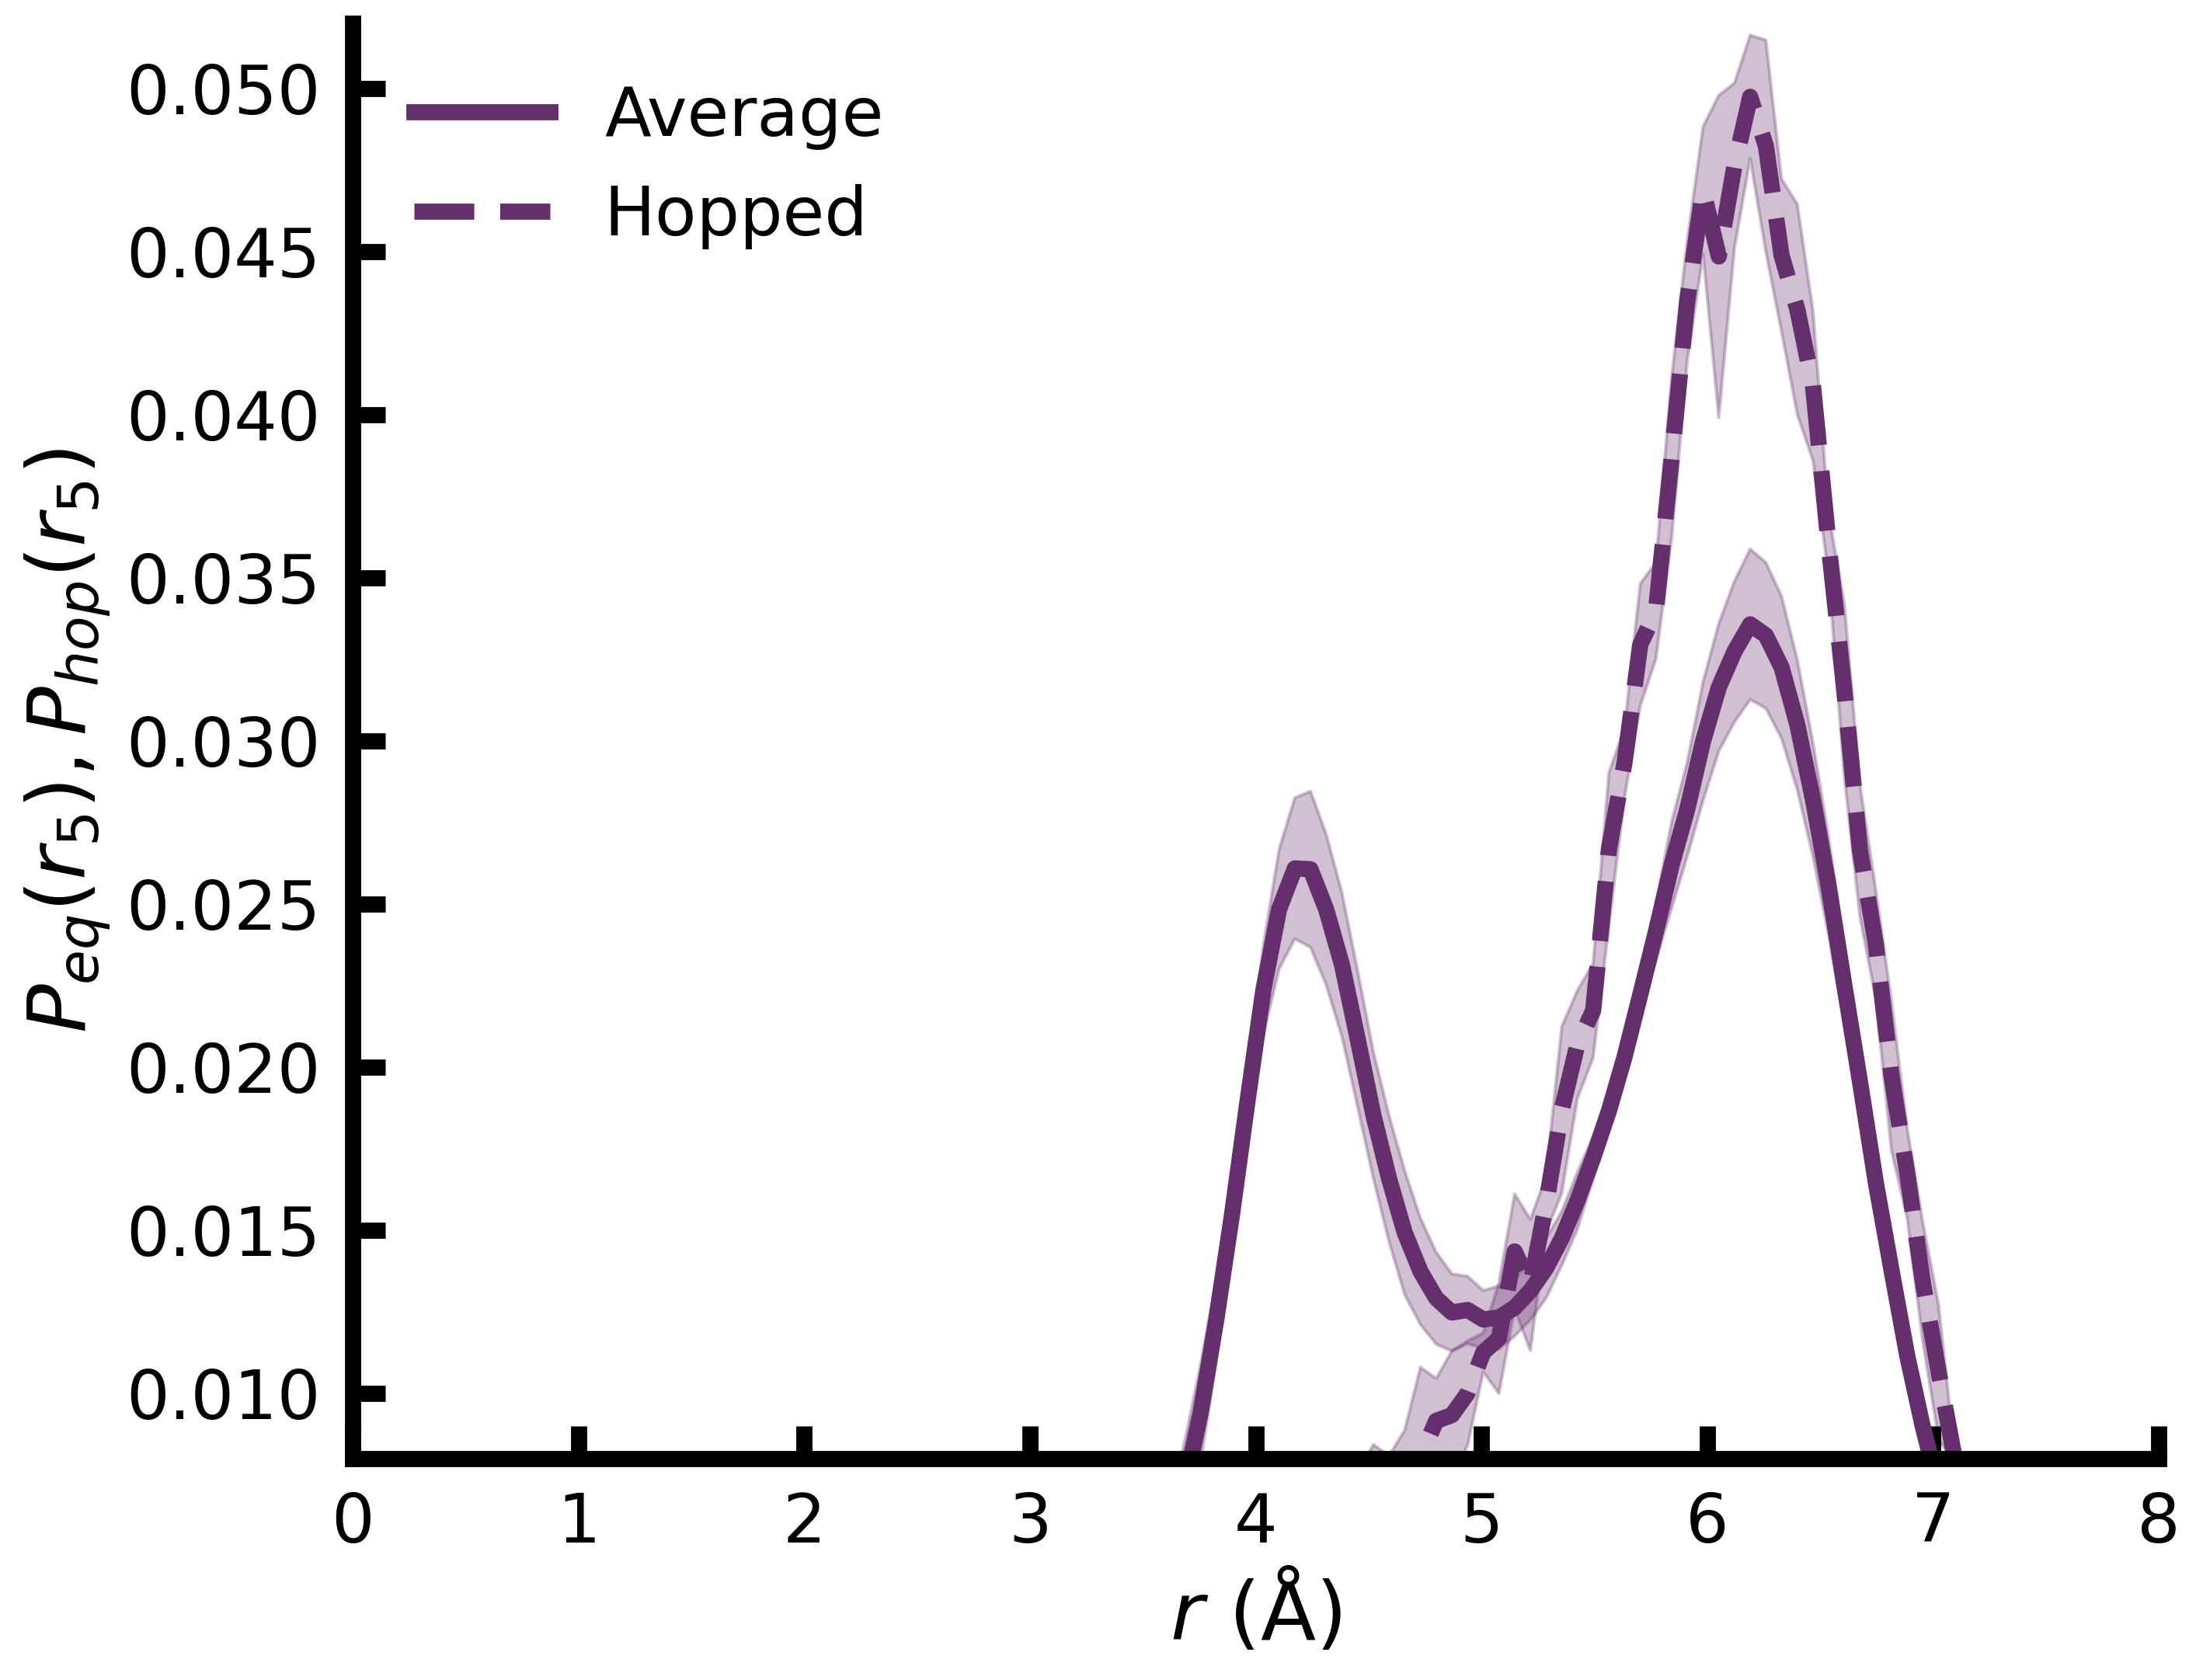

In [42]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 21,
    "axes_labelsize" : 25,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P_{eq}(r_{5}), P_{hop}(r_{5})$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/PDF_neighbor.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    """
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = 'k', label = "total")
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = 'k', alpha = 0.3)
    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], linestyle = '--', color = 'k')
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = 'k', alpha = 0.3)
    """

    ax.plot(avg[:,0], avg[:,11], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[4]], label = "Average")
    ax.fill_between(avg[:,0], avg[:,11] + std[:,11], avg[:,11] - std[:,11], color = COLORMAP[list(COLORMAP.keys())[4]], alpha = 0.3)
    ax.plot(avg[:,0], avg[:,12], linewidth = params['linewidth'], linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[4]], label = "Hopped")
    ax.fill_between(avg[:,0], avg[:,12] + std[:,12], avg[:,12] - std[:,12], color = COLORMAP[list(COLORMAP.keys())[4]], alpha = 0.3)

ax.set_xlim(0, 8)
ax.set_ylim(0.008, 0.052)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("PDF_neighbor_n5.png", dpi = 300, bbox_inches = 'tight')
plt.show()

# Pair Distribution Function - Cl

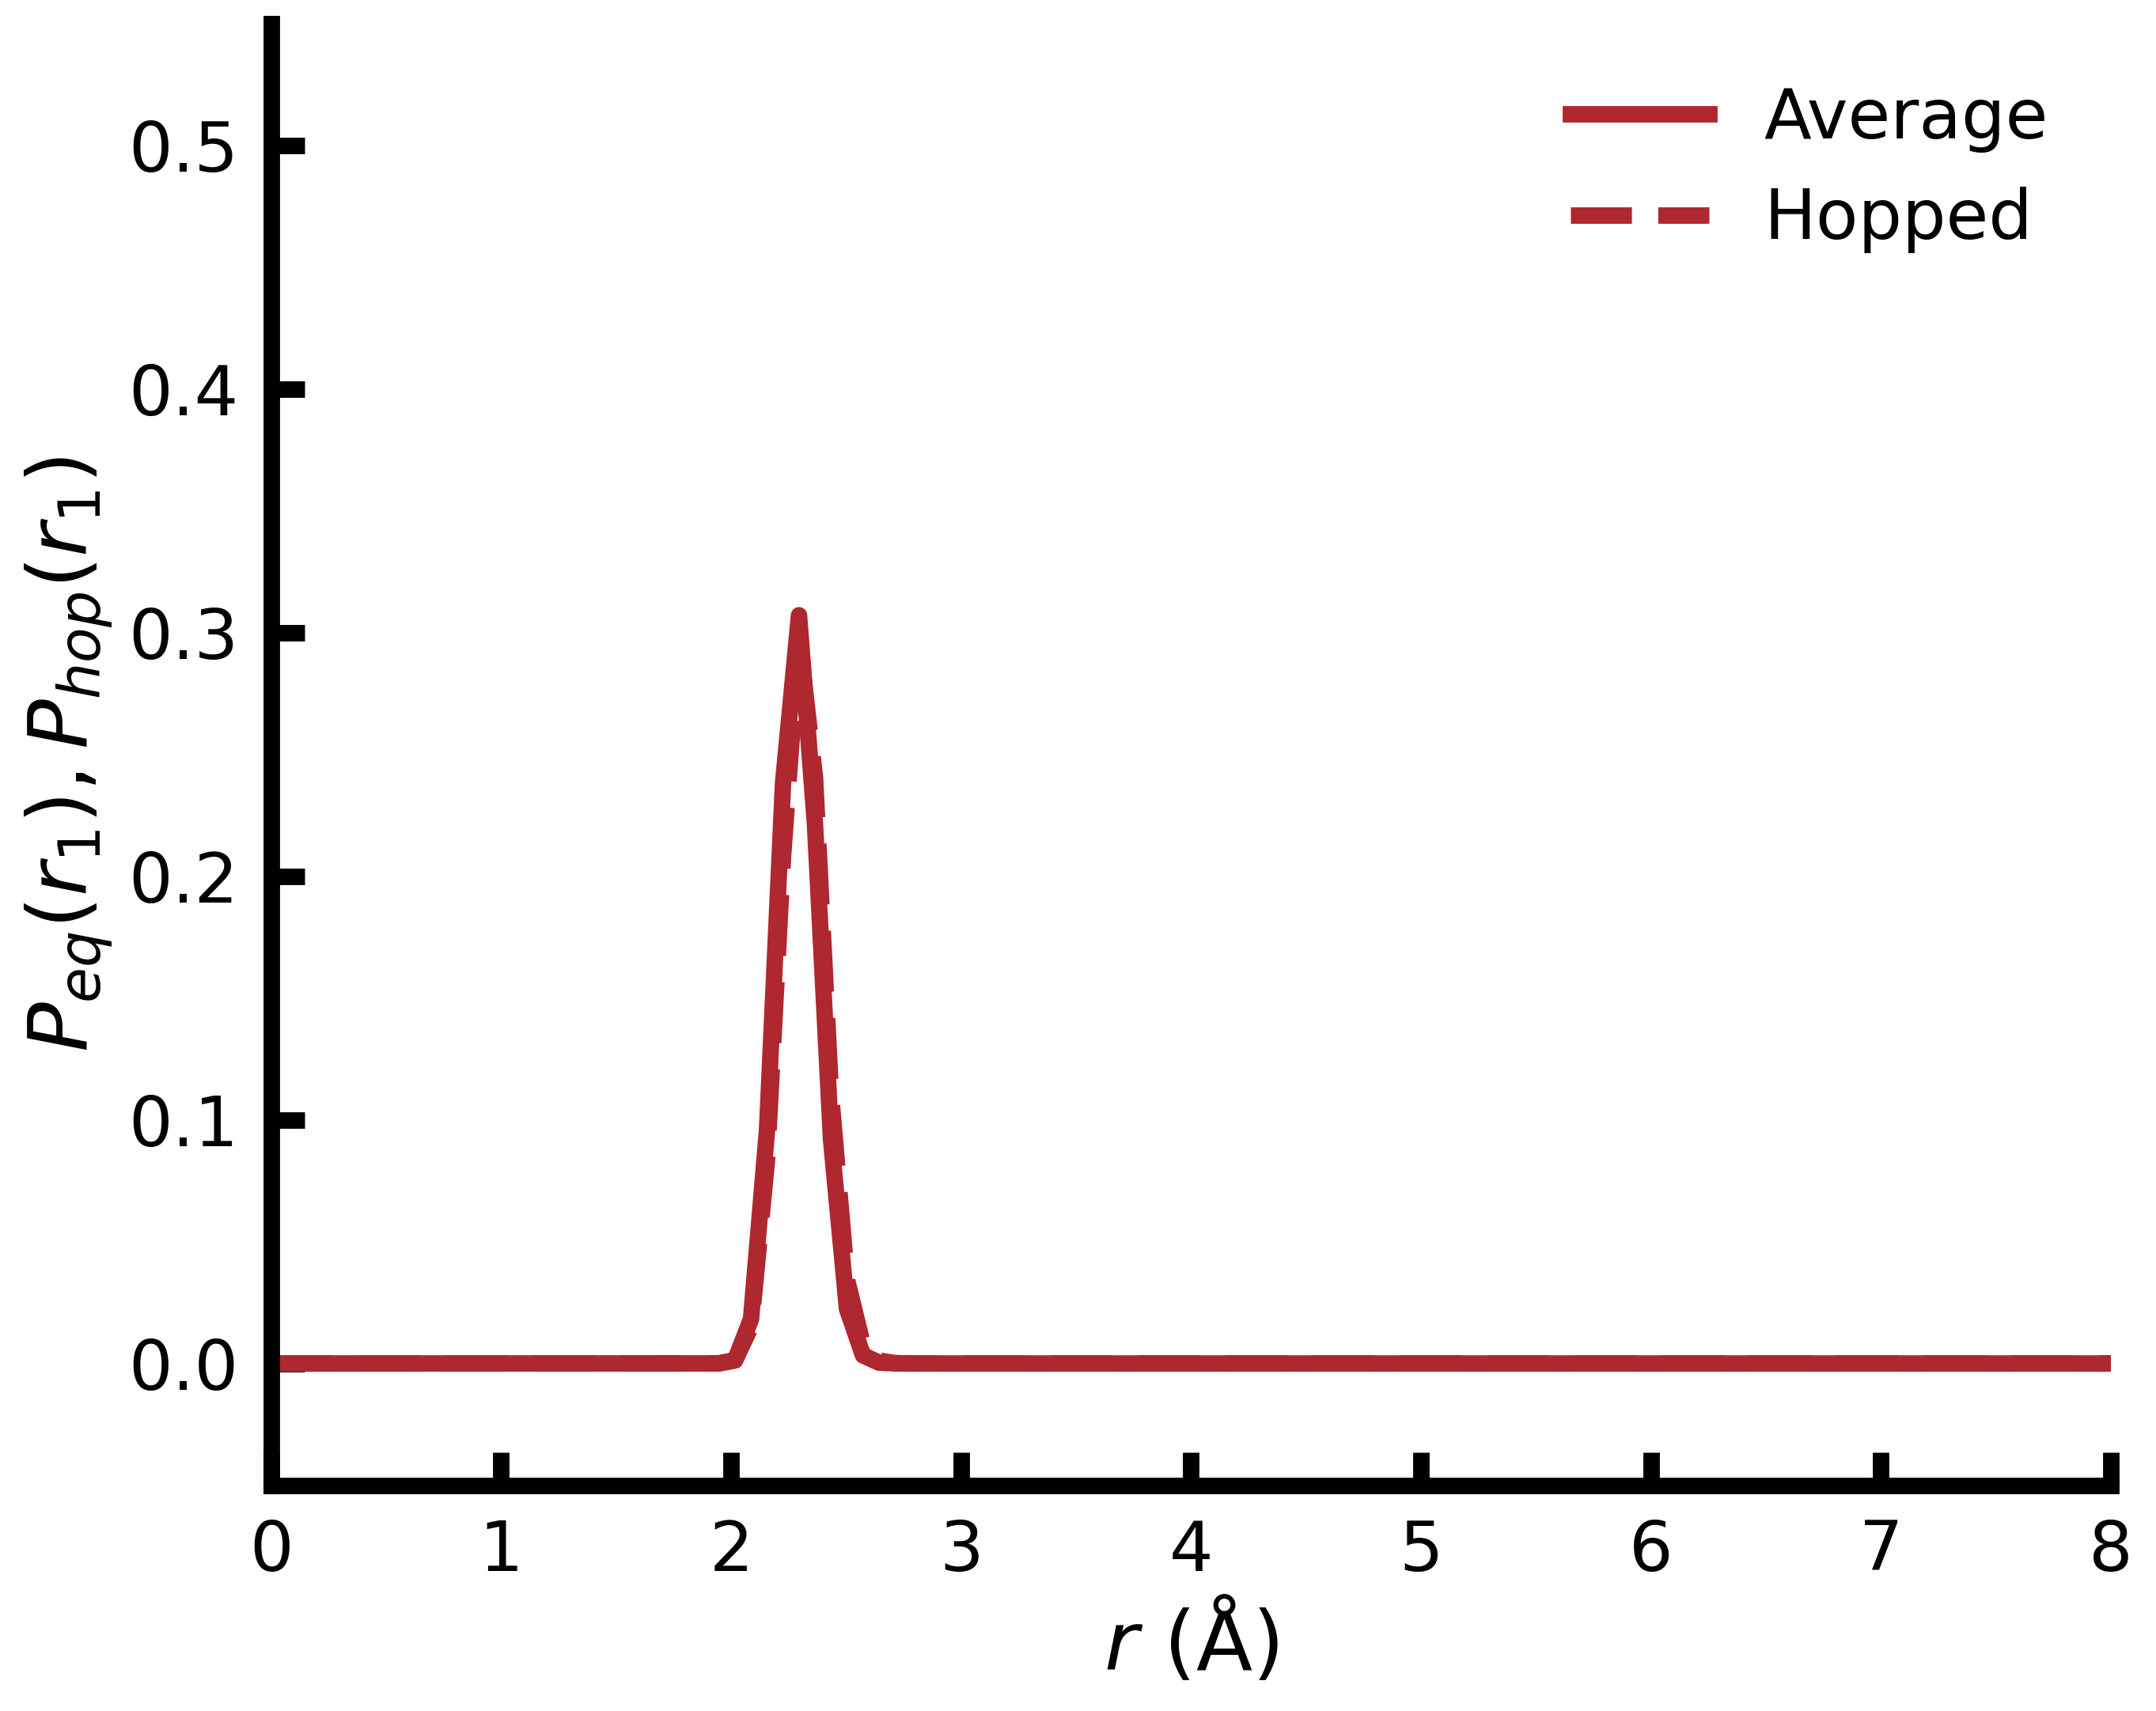

In [43]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 21,
    "axes_labelsize" : 25,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P_{eq}(r_{1}), P_{hop}(r_{1})$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/PDF_neighbor_Cl.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    """
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = 'k', label = "total")
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = 'k', alpha = 0.3)
    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], linestyle = '--', color = 'k')
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = 'k', alpha = 0.3)
    """

    ax.plot(avg[:,0], avg[:,3], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[0]], label = "Average")
    ax.fill_between(avg[:,0], avg[:,3] + std[:,3], avg[:,3] - std[:,3], color = COLORMAP[list(COLORMAP.keys())[0]], alpha = 0.3)
    ax.plot(avg[:,0], avg[:,4], linewidth = params['linewidth'], linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[0]], label = "Hopped")
    ax.fill_between(avg[:,0], avg[:,4] + std[:,4], avg[:,4] - std[:,4], color = COLORMAP[list(COLORMAP.keys())[0]], alpha = 0.3)

ax.set_xlim(0, 8)
ax.set_ylim(-0.05, 0.55)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("PDF_neighbor_Cl_n1.png", dpi = 300, bbox_inches = 'tight')
plt.show()

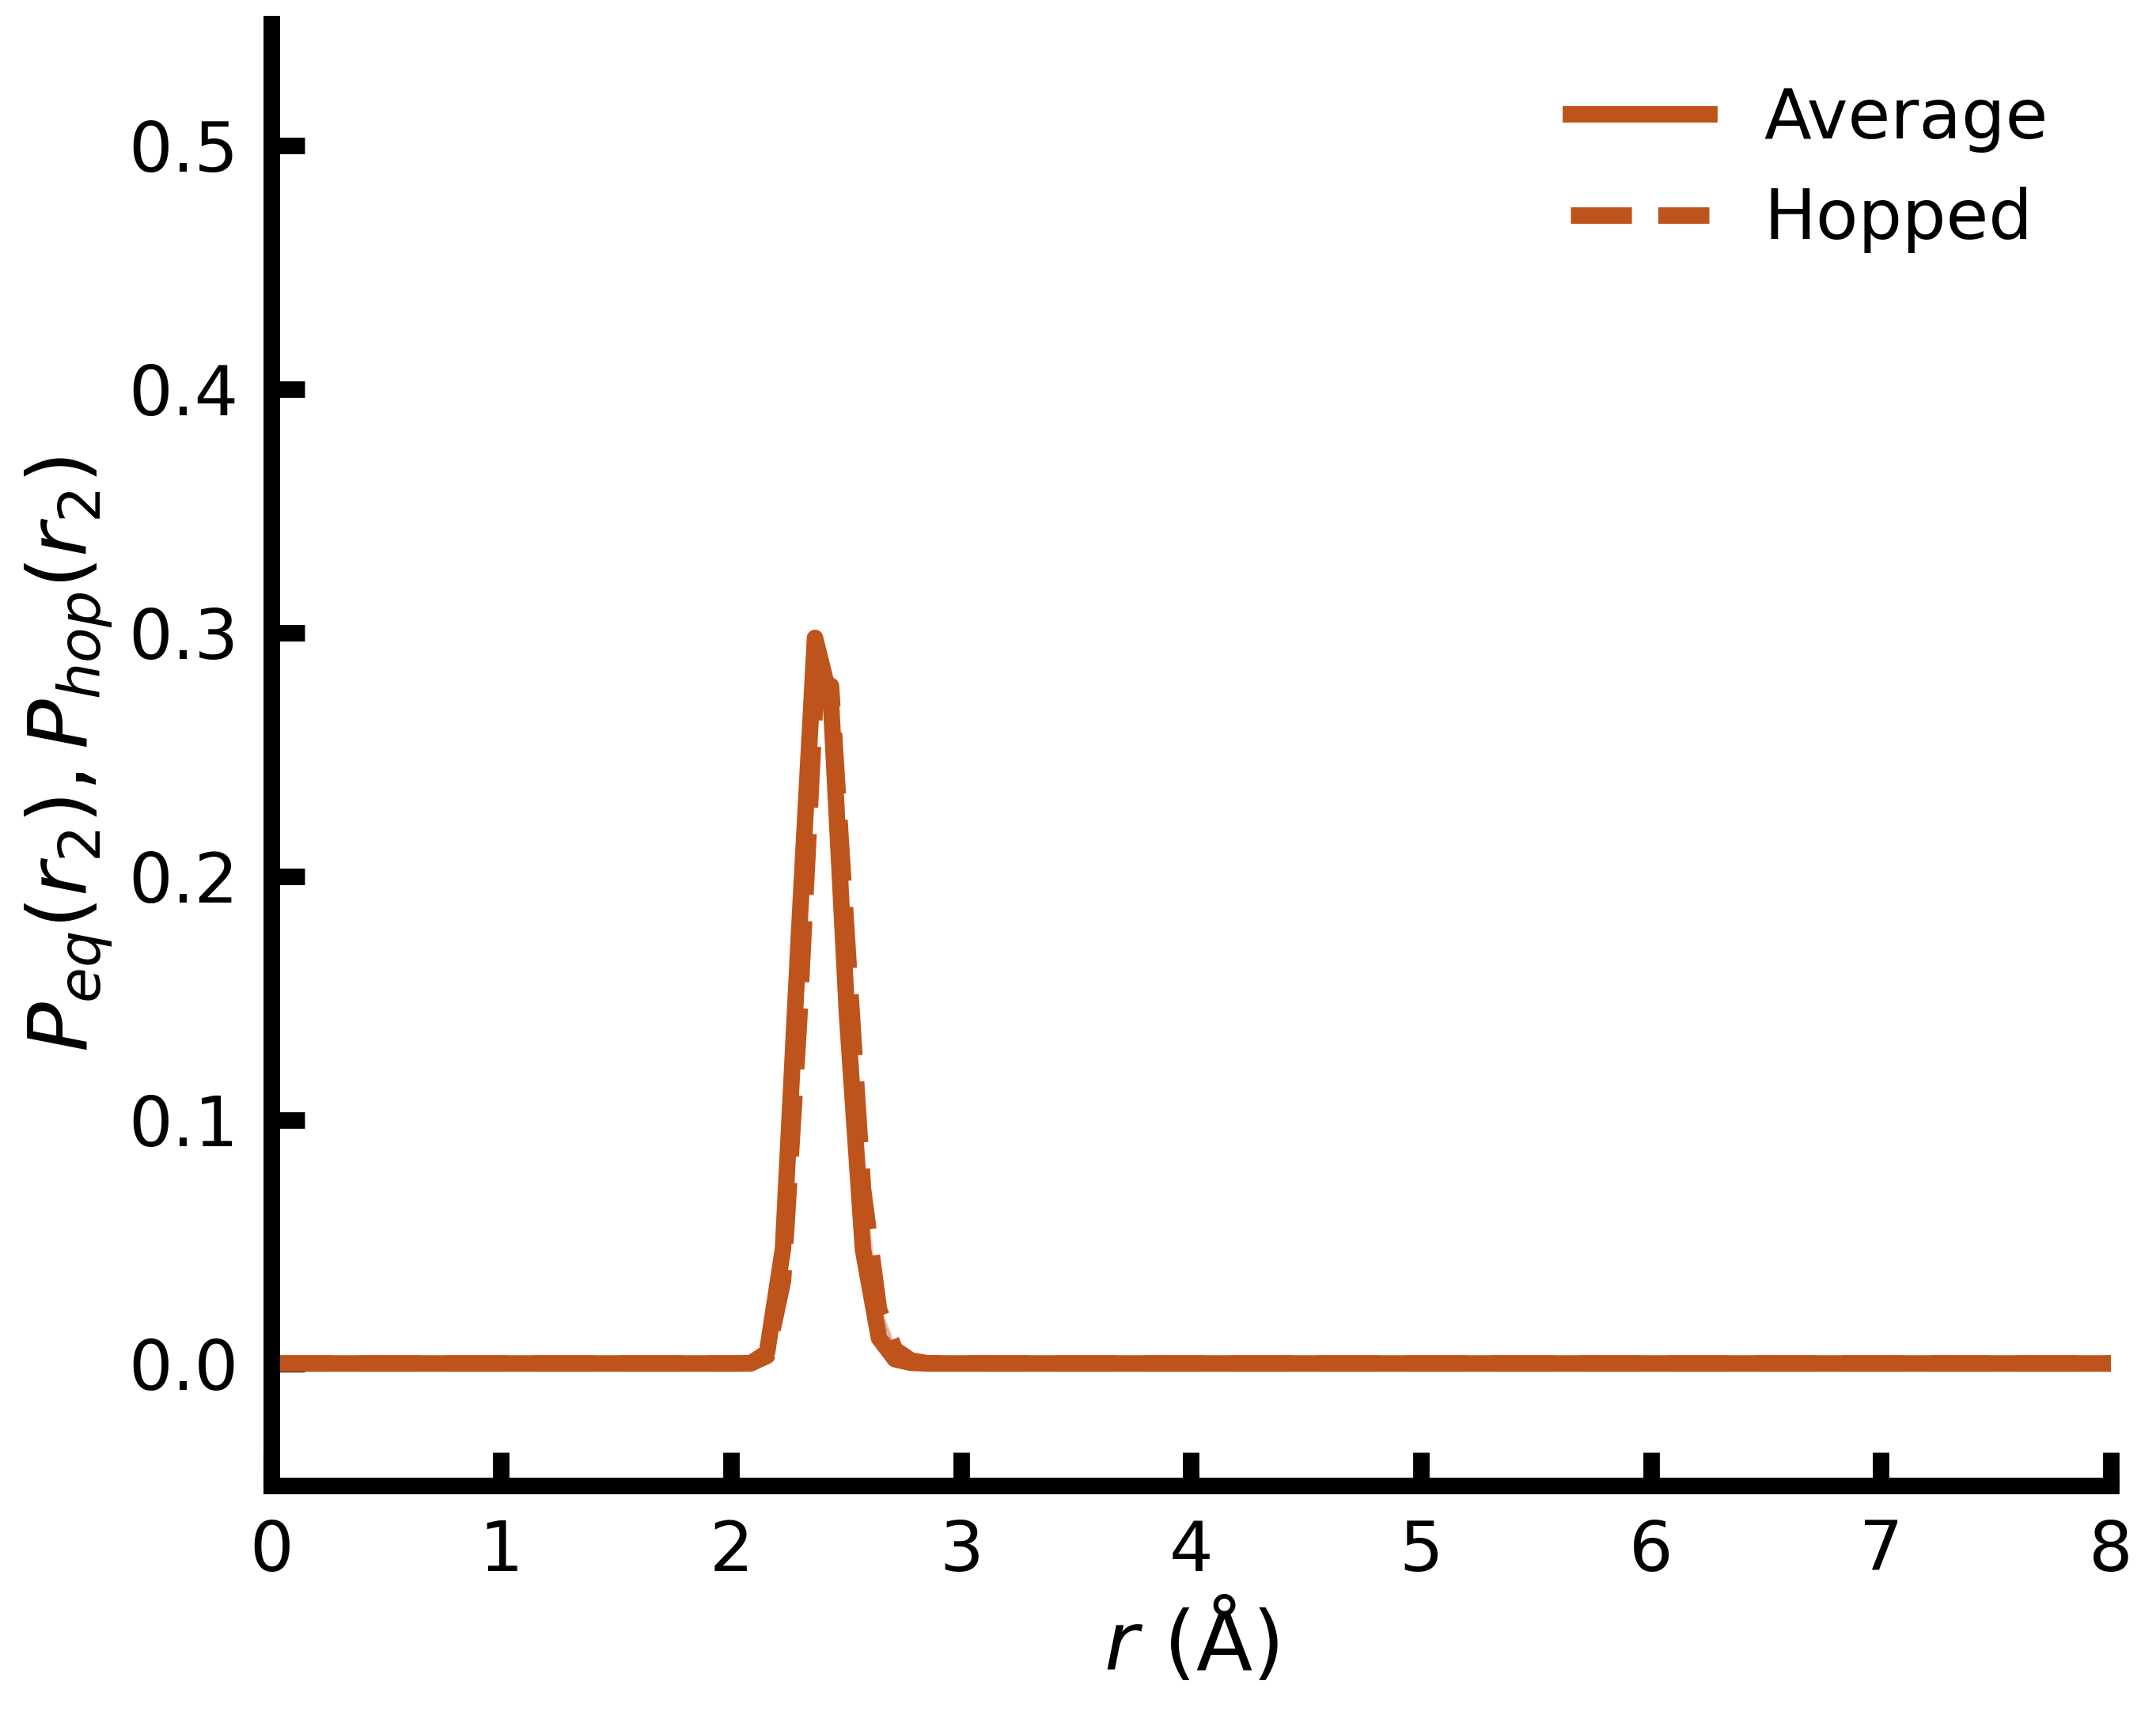

In [44]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 21,
    "axes_labelsize" : 25,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P_{eq}(r_{2}), P_{hop}(r_{2})$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/PDF_neighbor_Cl.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    """
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = 'k', label = "total")
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = 'k', alpha = 0.3)
    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], linestyle = '--', color = 'k')
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = 'k', alpha = 0.3)
    """

    ax.plot(avg[:,0], avg[:,5], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[1]], label = "Average")
    ax.fill_between(avg[:,0], avg[:,5] + std[:,5], avg[:,5] - std[:,5], color = COLORMAP[list(COLORMAP.keys())[1]], alpha = 0.3)
    ax.plot(avg[:,0], avg[:,6], linewidth = params['linewidth'], linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[1]], label = "Hopped")
    ax.fill_between(avg[:,0], avg[:,6] + std[:,6], avg[:,6] - std[:,6], color = COLORMAP[list(COLORMAP.keys())[1]], alpha = 0.3)

ax.set_xlim(0, 8)
ax.set_ylim(-0.05, 0.55)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("PDF_neighbor_Cl_n2.png", dpi = 300, bbox_inches = 'tight')
plt.show()

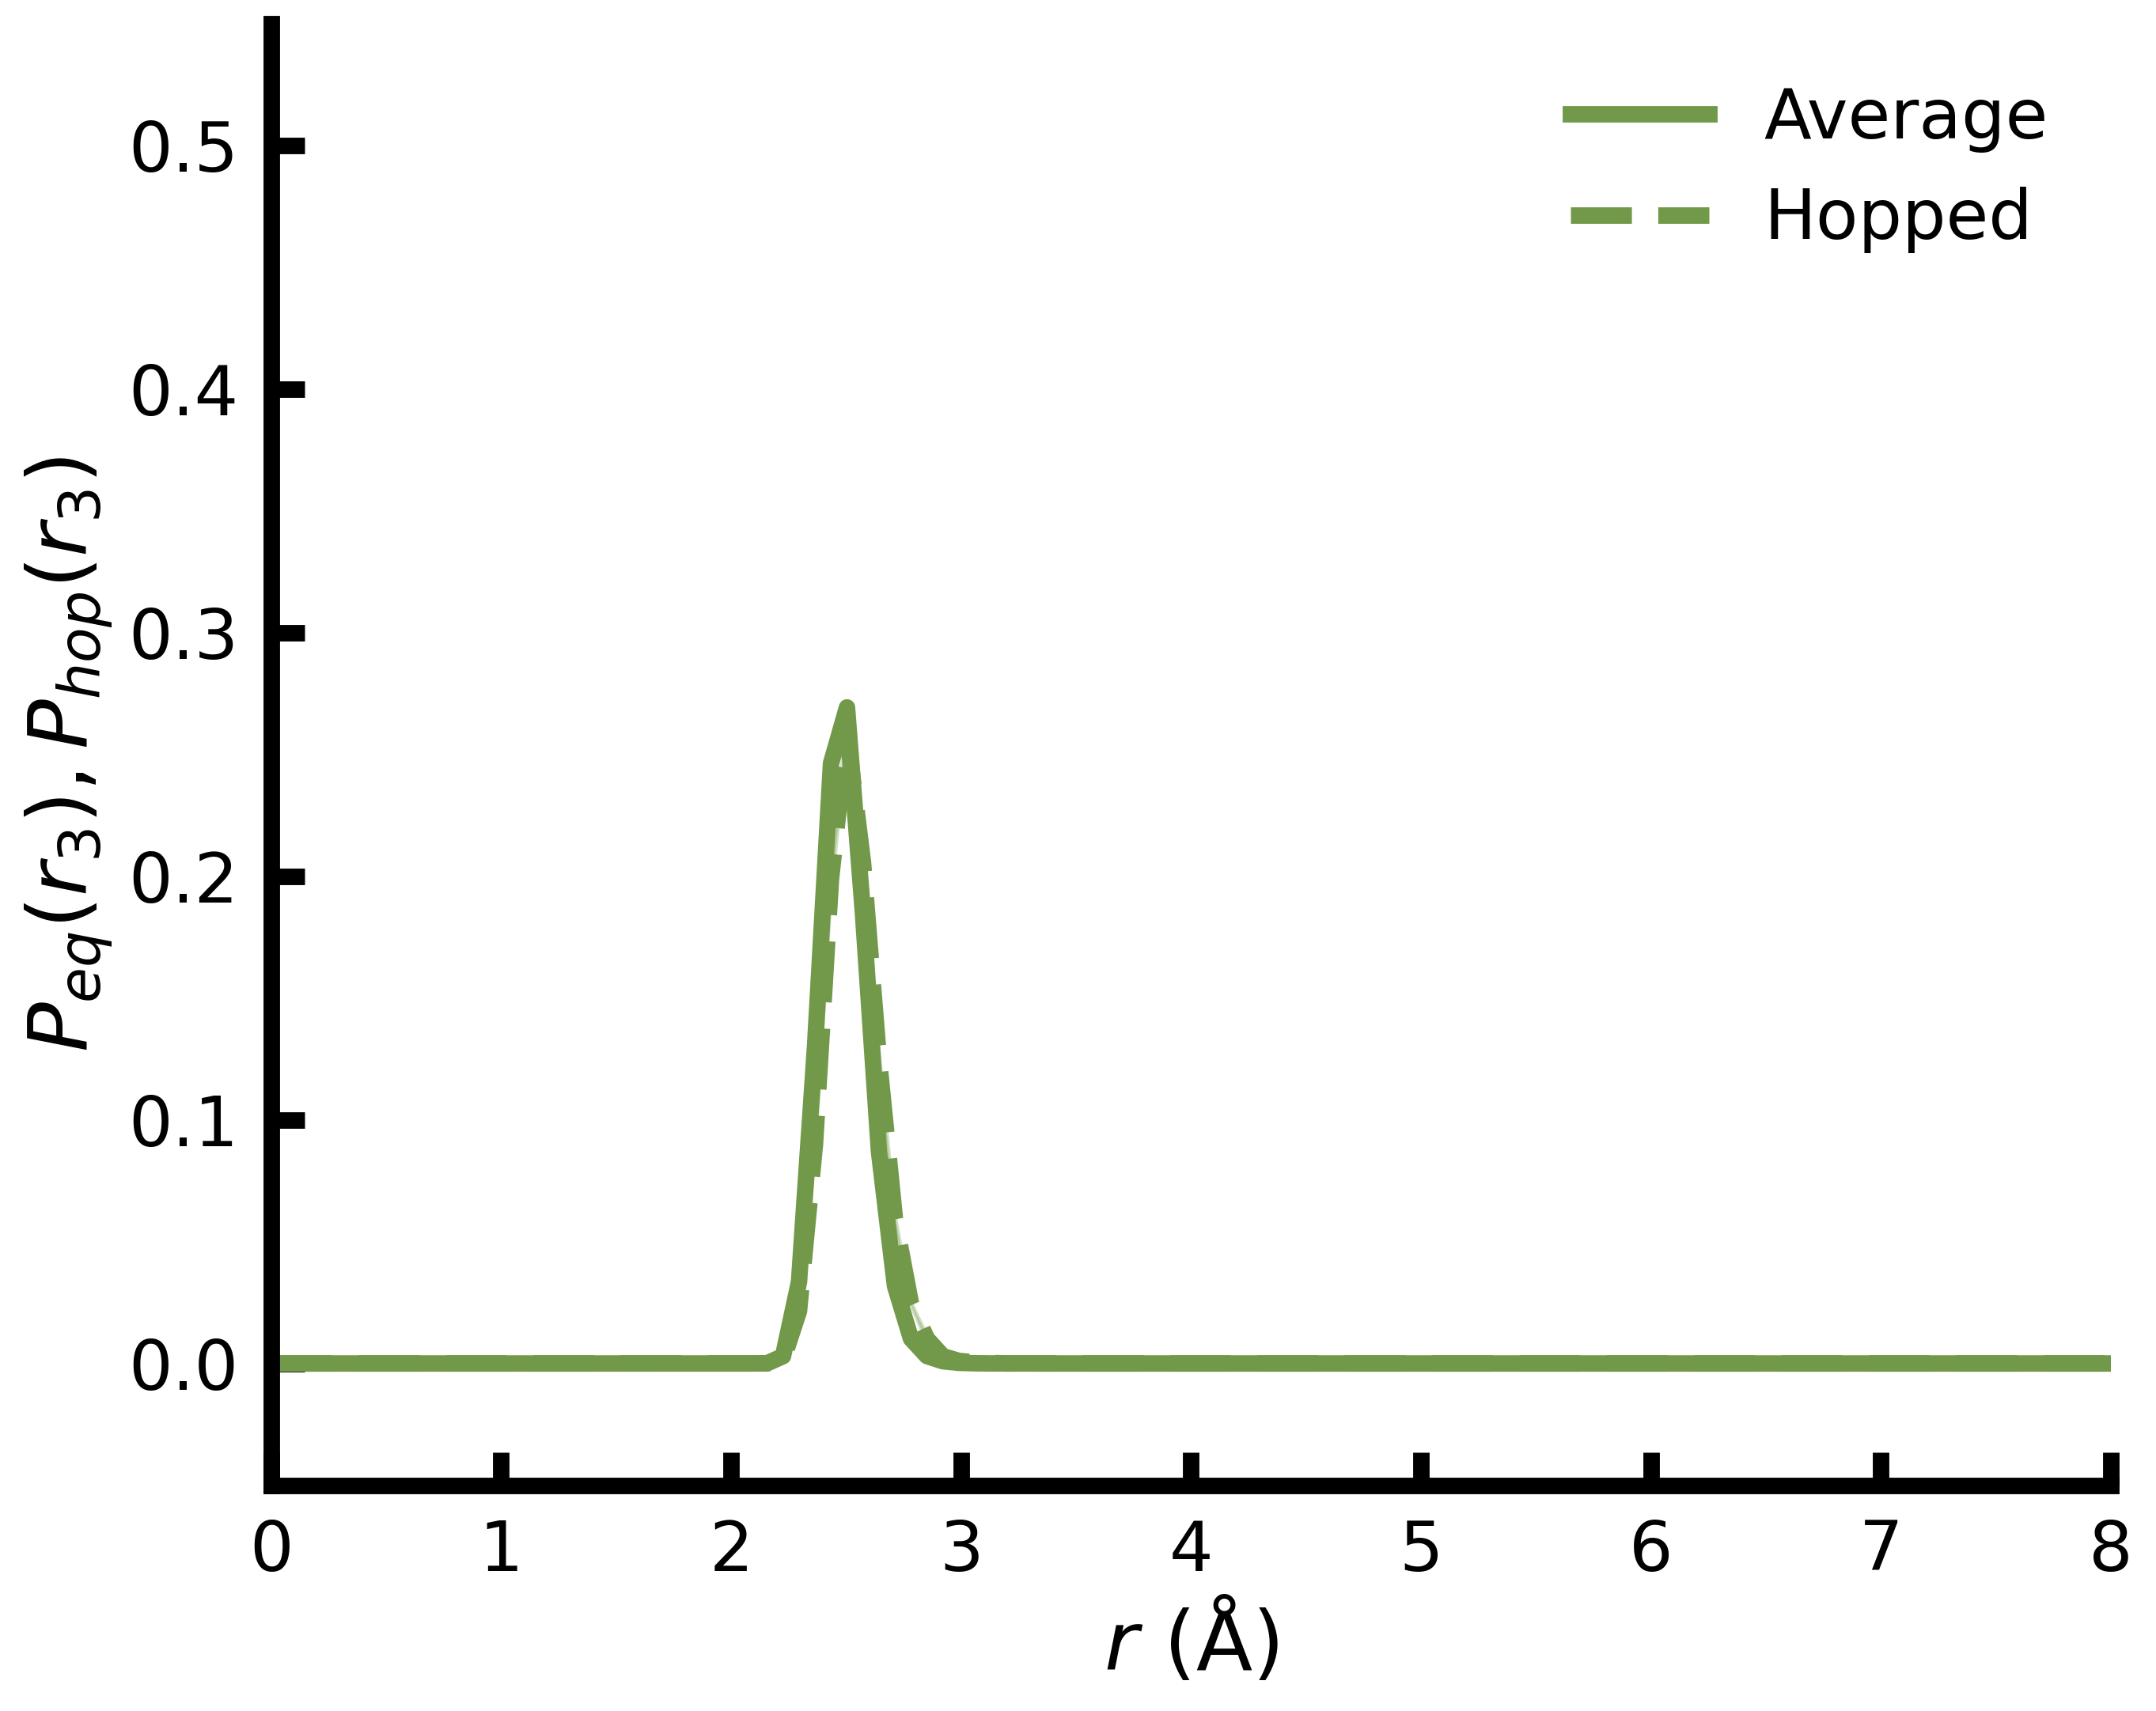

In [45]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 21,
    "axes_labelsize" : 25,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P_{eq}(r_{3}), P_{hop}(r_{3})$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/PDF_neighbor_Cl.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    """
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = 'k', label = "total")
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = 'k', alpha = 0.3)
    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], linestyle = '--', color = 'k')
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = 'k', alpha = 0.3)
    """

    ax.plot(avg[:,0], avg[:,7], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[2]], label = "Average")
    ax.fill_between(avg[:,0], avg[:,7] + std[:,7], avg[:,7] - std[:,7], color = COLORMAP[list(COLORMAP.keys())[2]], alpha = 0.3)
    ax.plot(avg[:,0], avg[:,8], linewidth = params['linewidth'], linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[2]], label = "Hopped")
    ax.fill_between(avg[:,0], avg[:,8] + std[:,8], avg[:,8] - std[:,8], color = COLORMAP[list(COLORMAP.keys())[2]], alpha = 0.3)

ax.set_xlim(0, 8)
ax.set_ylim(-0.05, 0.55)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("PDF_neighbor_Cl_n3.png", dpi = 300, bbox_inches = 'tight')
plt.show()

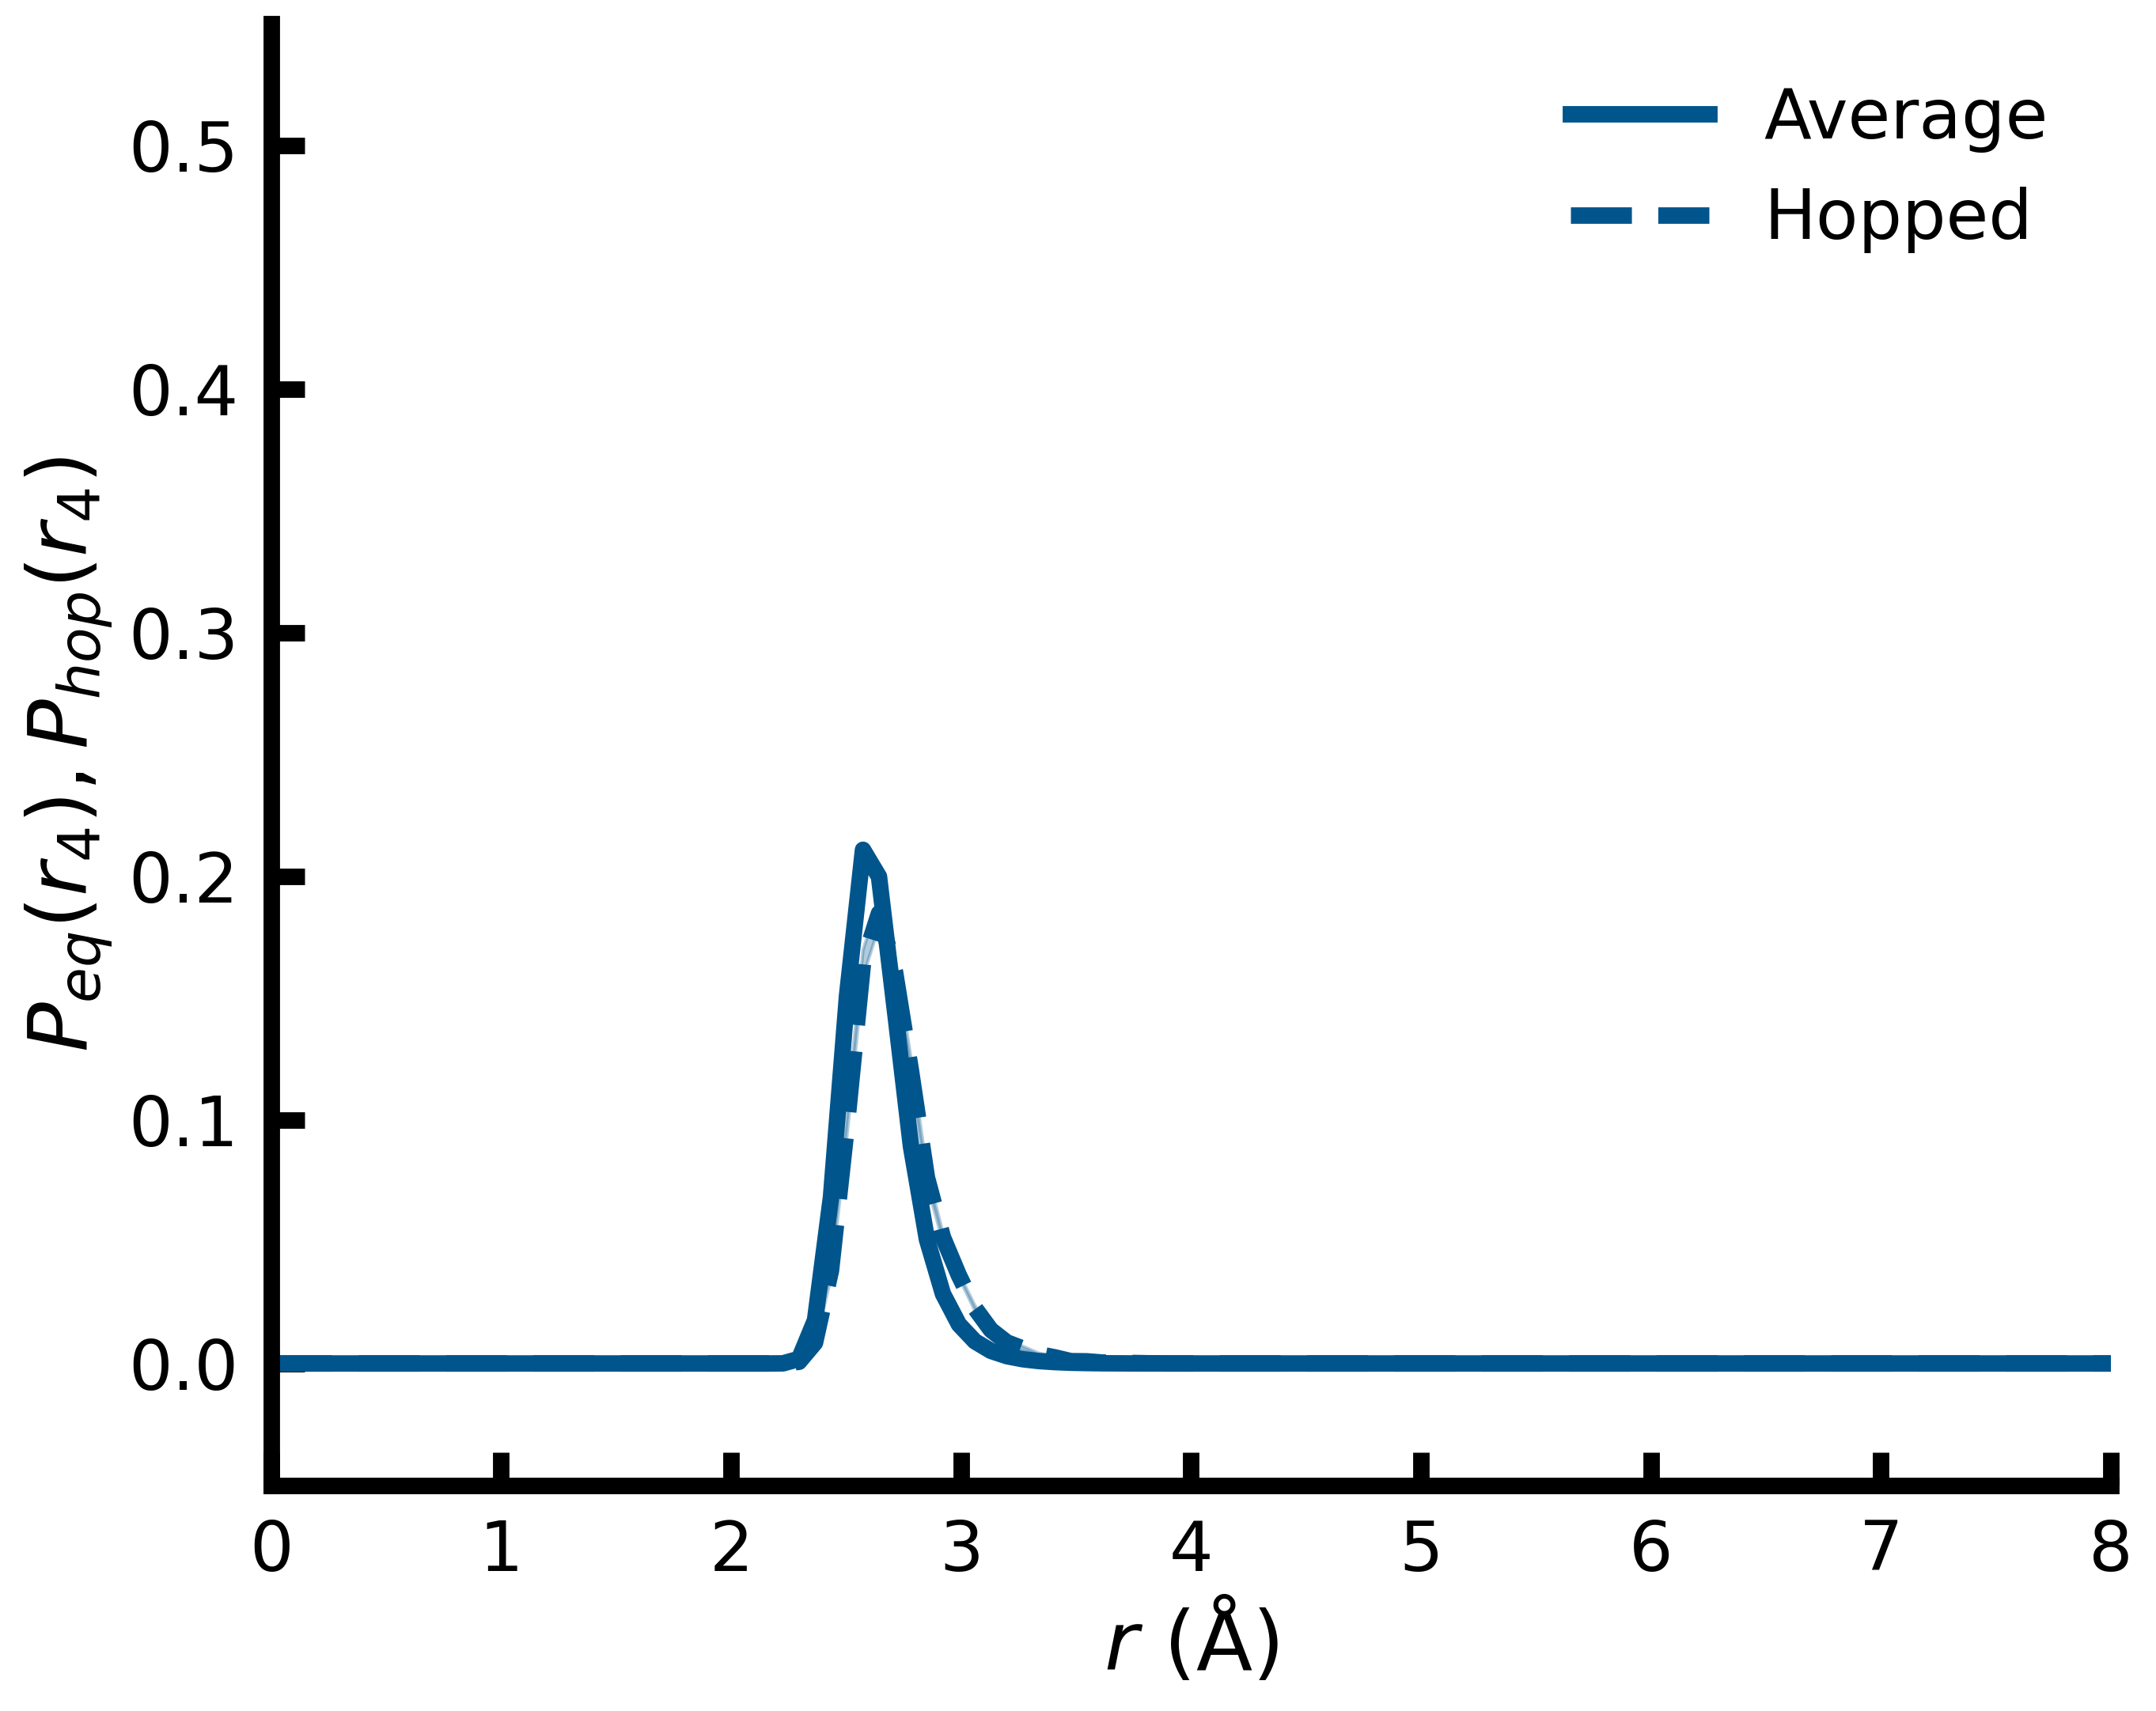

In [46]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 21,
    "axes_labelsize" : 25,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P_{eq}(r_{4}), P_{hop}(r_{4})$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/PDF_neighbor_Cl.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    """
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = 'k', label = "total")
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = 'k', alpha = 0.3)
    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], linestyle = '--', color = 'k')
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = 'k', alpha = 0.3)
    """

    ax.plot(avg[:,0], avg[:,9], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[3]], label = "Average")
    ax.fill_between(avg[:,0], avg[:,9] + std[:,9], avg[:,9] - std[:,9], color = COLORMAP[list(COLORMAP.keys())[3]], alpha = 0.3)
    ax.plot(avg[:,0], avg[:,10], linewidth = params['linewidth'], linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[3]], label = "Hopped")
    ax.fill_between(avg[:,0], avg[:,10] + std[:,10], avg[:,10] - std[:,10], color = COLORMAP[list(COLORMAP.keys())[3]], alpha = 0.3)

ax.set_xlim(0, 8)
ax.set_ylim(-0.05, 0.55)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("PDF_neighbor_Cl_n4.png", dpi = 300, bbox_inches = 'tight')
plt.show()

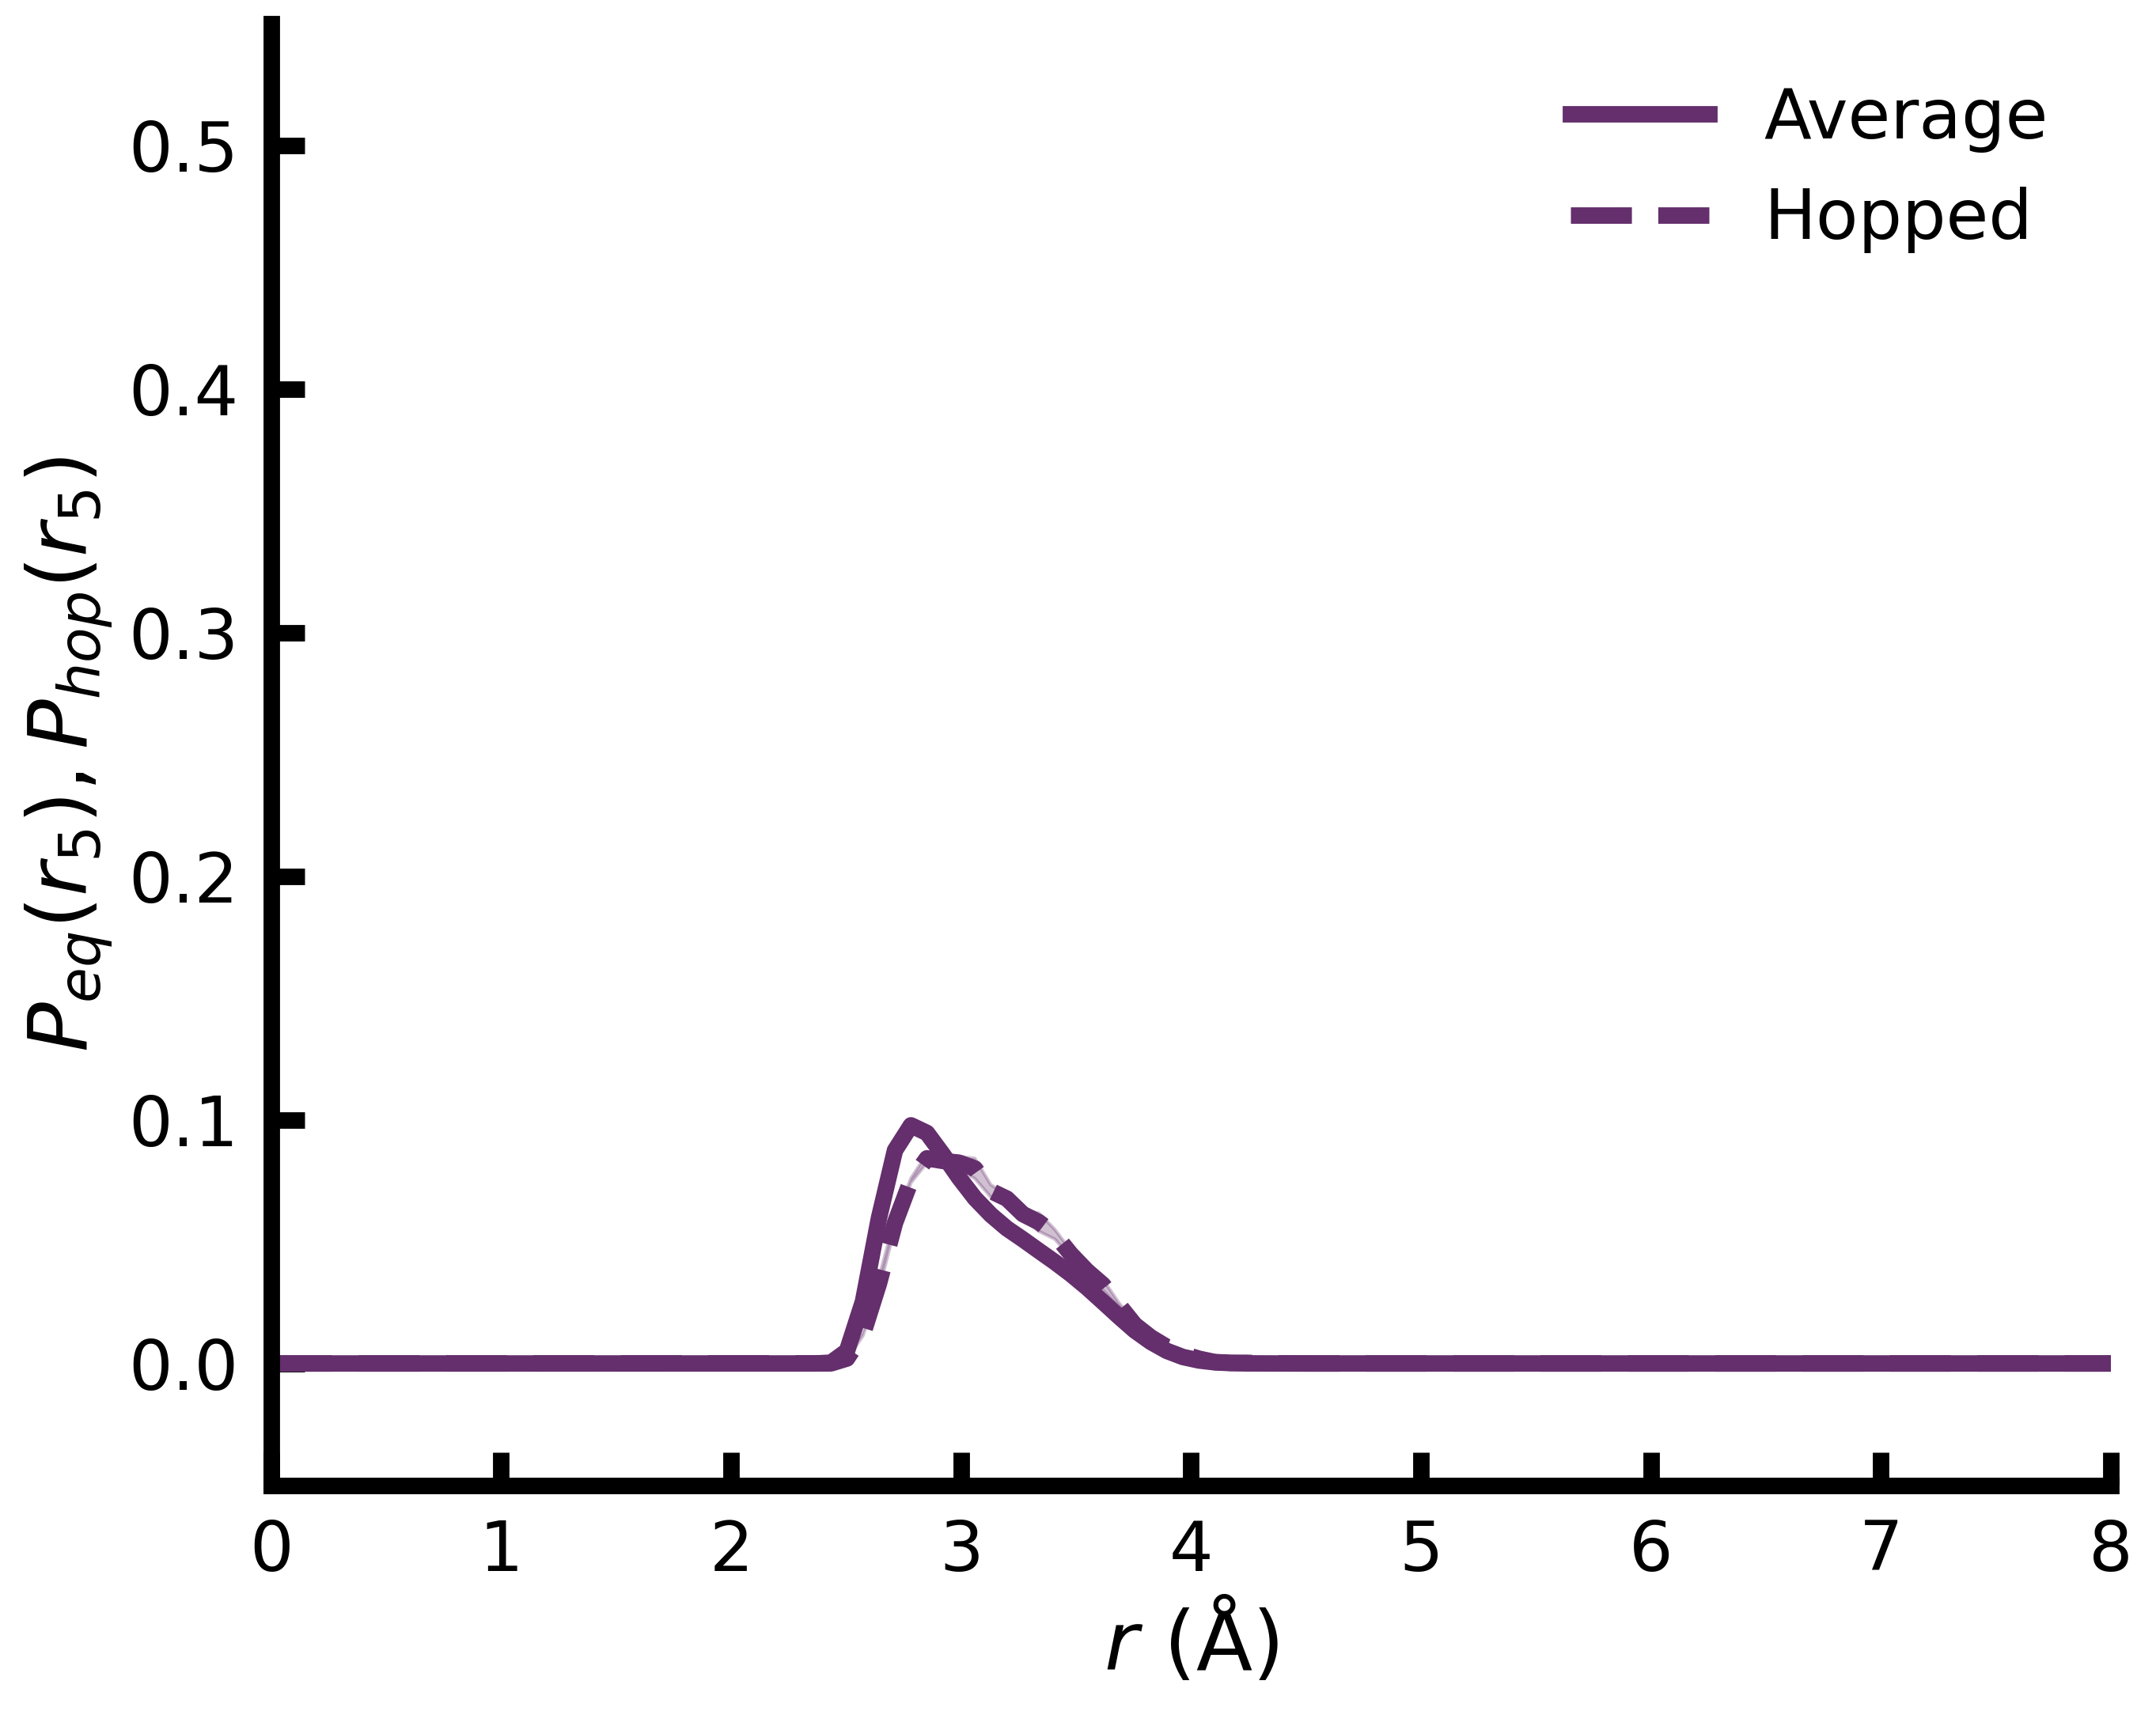

In [47]:
params = {
    "linewidth" : 5,
    "axeswidth" : 5,
    "tick_labelsize" : 21,
    "axes_labelsize" : 25,
    "tick_padding" : 10,
}

fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(params['axeswidth'])
ax.spines['bottom'].set_linewidth(params['axeswidth'])
ax.tick_params(labelsize = params['tick_labelsize'], pad = params['tick_padding'], length = params['axeswidth'] * 2, width = params['axeswidth'], direction = 'in')

ax.set_xlabel("$r$ (Å)", fontsize = params['axes_labelsize'])
ax.set_ylabel(r"$P_{eq}(r_{5}), P_{hop}(r_{5})$", fontsize = params['axes_labelsize'])

ROOT = "/mnt/CALC_SSD/bgkang/hopping_analysis/trajectories/"
for idx, t in enumerate(["300K"]):
    data = []
    for e in "00", "01", "02", "03":
        data.append(np.genfromtxt(f"{ROOT}/temperature/{t}/ensemble{e}/PDF_neighbor_Cl.out"))
    avg = np.stack(data).mean(axis = 0)
    std = np.stack(data).std(axis = 0)

    """
    ax.plot(avg[:,0], avg[:,1], linewidth = params['linewidth'], color = 'k', label = "total")
    ax.fill_between(avg[:,0], avg[:,1] + std[:,1], avg[:,1] - std[:,1], color = 'k', alpha = 0.3)
    ax.plot(avg[:,0], avg[:,2], linewidth = params['linewidth'], linestyle = '--', color = 'k')
    ax.fill_between(avg[:,0], avg[:,2] + std[:,2], avg[:,2] - std[:,2], color = 'k', alpha = 0.3)
    """

    ax.plot(avg[:,0], avg[:,11], linewidth = params['linewidth'], color = COLORMAP[list(COLORMAP.keys())[4]], label = "Average")
    ax.fill_between(avg[:,0], avg[:,11] + std[:,11], avg[:,11] - std[:,11], color = COLORMAP[list(COLORMAP.keys())[4]], alpha = 0.3)
    ax.plot(avg[:,0], avg[:,12], linewidth = params['linewidth'], linestyle = '--', color = COLORMAP[list(COLORMAP.keys())[4]], label = "Hopped")
    ax.fill_between(avg[:,0], avg[:,12] + std[:,12], avg[:,12] - std[:,12], color = COLORMAP[list(COLORMAP.keys())[4]], alpha = 0.3)

ax.set_xlim(0, 8)
ax.set_ylim(-0.05, 0.55)

legend = ax.legend(fontsize = params['tick_labelsize'], frameon = False)
legend.get_title().set_fontsize(params['axes_labelsize'])

plt.savefig("PDF_neighbor_Cl_n5.png", dpi = 300, bbox_inches = 'tight')
plt.show()